In [1]:
import sys
sys.path.append('C:\\projects\\UTNCE\\src\\utnce')

In [2]:
from simplify import *
from prepare import *
from routing import *
from percolation_plot import *
from generate import *
from transfer import *

In [3]:
osm_path = "C:\\projects\\UTNCE\\data\\Amsterdam.large.pbf"

# Tram-Amsterdam

## Generate tram networks

In [4]:
city_tram_stations, edges, nodes, city_tram_routes = prepare_tram(osm_path)

topology: 100%|██████████████████████████████████████████████████████████████████| 2204/2204 [00:00<00:00, 7735.47it/s]


Calculate_degree possibly unhappy


In [5]:
city_tram_routes

,osm_id,route,to,name,ref,network,service,geometry
17,31398,tram,"Amsterdam, De Boelelaan/VU",Tram 24: Amsterdam Centraal Station => Amsterd...,24,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.89406 52.37387, 4.89361 52..."
18,31530,tram,"Amsterdam, Oudenaardeplantsoen",Tram 2: Amsterdam Centraal Station => Amsterda...,2,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.81102 52.34641, 4.81118 52..."
19,31794,tram,"Amsterdam, Drentepark",Tram 4: Amsterdam Centraal Station => Amsterda...,4,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.89406 52.37387, 4.89361 52..."
22,32579,tram,"Amsterdam, Osdorp Dijkgraafsplein",Tram 17: Amsterdam Centraal Station => Amsterd...,17,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.89915 52.37828, 4.89919 52..."
23,32615,tram,"Amsterdam, IJburg",Tram 26: Amsterdam Centraal Station => Amsterd...,26,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.90035 52.37793, 4.90035 52..."
24,32867,tram,"Amsterdam, Lambertus Zijlplein",Tram 13: Amsterdam Centraal Station => Amsterd...,13,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.89922 52.37830, 4.89926 52..."
390,4494870,tram,"Amsterdam, Centraal Station",Tram 4: Amsterdam Station RAI => Amsterdam Cen...,4,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.88956 52.33608, 4.88962 52..."
391,4497721,tram,"Amsterdam, Centraal Station",Tram 2: Amsterdam Nieuw Sloten => Amsterdam Ce...,2,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.80985 52.34614, 4.81032 52..."
392,4512710,tram,Amsterdam Centraal Station,Tram 13: Amsterdam Geuzenveld => Amsterdam Cen...,13,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.80291 52.37726, 4.80320 52..."
393,4513899,tram,"Amsterdam, Centraal Station",Tram 24: Amsterdam VUmc => Amsterdam Centraal ...,24,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.86582 52.33525, 4.86638 52..."


In [6]:
city_tram_routes = city_tram_routes.loc[city_tram_routes.ref != 'EMA']

In [7]:
city_tram_routes, check_name = check_tram_routes(city_tram_stations, city_tram_routes)

In [8]:
replacement_dict = {
    ',': '',
    'Diemen': '',
    'Amsterdam': '',
    'Sloterdijk': 'Station Sloterdijk',
    'Osdorp Dijkgraafsplein': 'Dijkgraafplein',
    'Osdorp De Aker': 'Matterhorn'
}

city_tram_stations, city_tram_routes, check_name = recheck_tram_routes(replacement_dict, city_tram_stations, city_tram_routes)

In [9]:
replacement_dict = {
    'Amstelveen Westwijk': 'Westwijk'
}

city_tram_stations, city_tram_routes, check_name = recheck_tram_routes(replacement_dict, city_tram_stations, city_tram_routes)

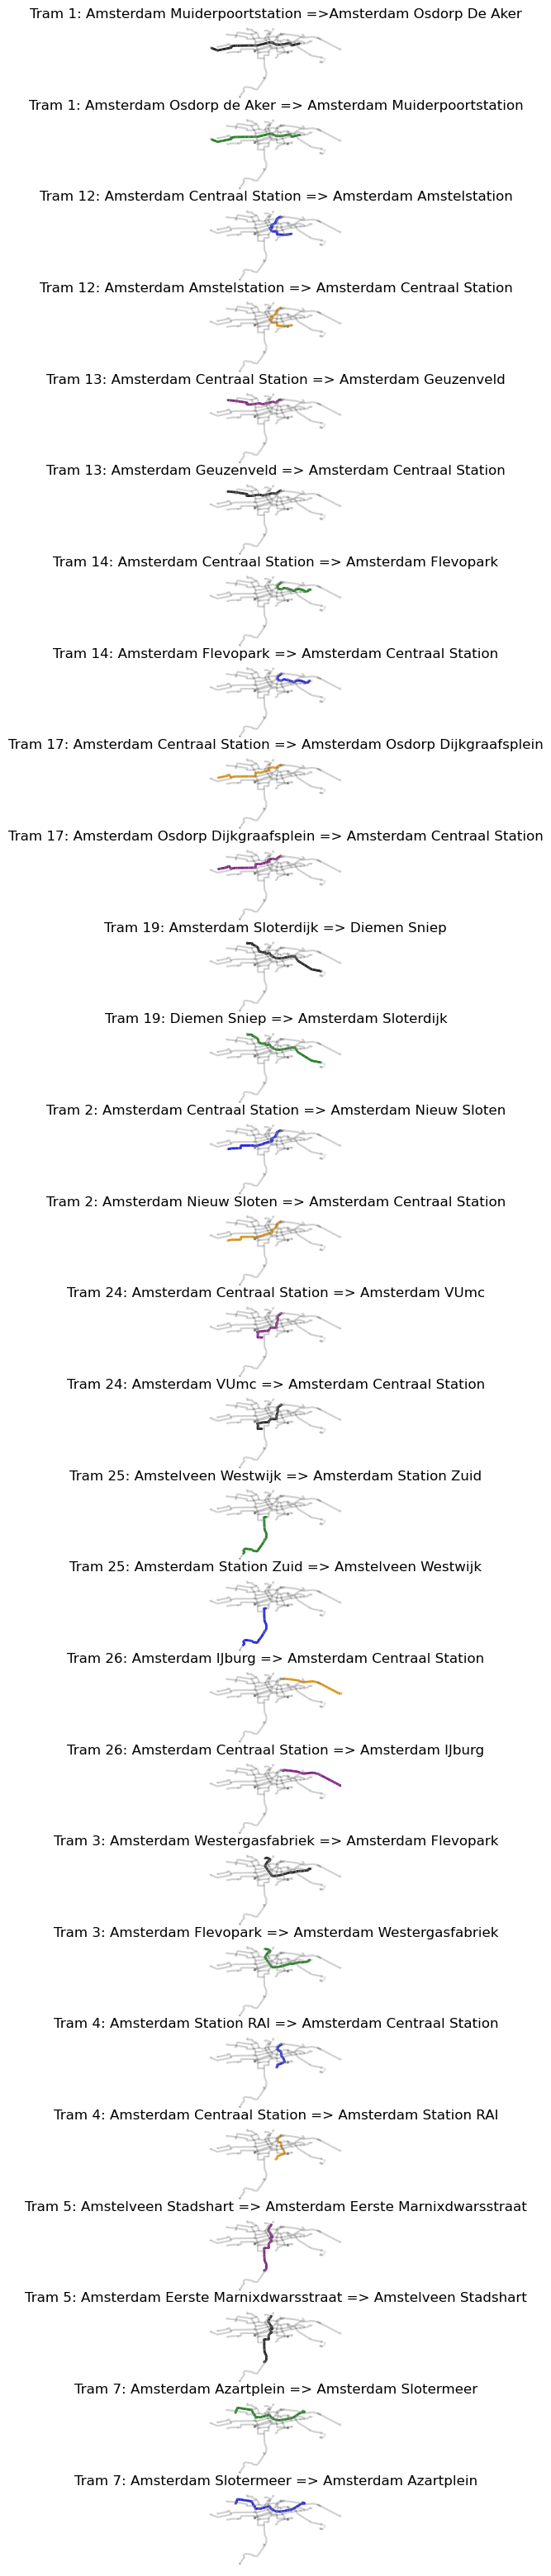

In [10]:
city_tram_order_route_dict, city_tram_shortest_path_pairs, city_tram_shortest_path_edges, tram_edges = tram(city_tram_stations, edges, nodes, city_tram_routes, city='Amsterdam')

## Add columns to nodes

In [11]:
city_tram_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(city_tram_order_route_dict, city_tram_routes)

In [12]:
city_tram_order_route_dict

{'Tram 1: Amsterdam Muiderpoortstation =>Amsterdam Osdorp De Aker':     id                              name                      geometry  \
 0   21                Muiderpoortstation  POINT (4.9326128 52.3607965)   
 1    0                      Dapperstraat  POINT (4.9289422 52.3609314)   
 2    6                    Linnaeusstraat  POINT (4.9257029 52.3601162)   
 3    7                         Beukenweg  POINT (4.9167422 52.3590732)   
 4    4         Korte 's-Gravesandestraat  POINT (4.9135923 52.3623479)   
 5    3                      Weesperplein  POINT (4.9071213 52.3610021)   
 6   22                    Frederiksplein  POINT (4.8978483 52.3594109)   
 7    5                      Vijzelgracht  POINT (4.8921024 52.3595051)   
 8    1                       Rijksmuseum   POINT (4.887104 52.3609734)   
 9   23                       Leidseplein  POINT (4.8810698 52.3632085)   
 10  13  Eerste Constantijn Huygensstraat  POINT (4.8747145 52.3626163)   
 11  24            Jan Pieter Hei

In [13]:
city_tram_new_nodes = add_columns_to_nodes(city_tram_order_route_dict, nodes)

In [14]:
city_tram_new_nodes

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
0,POINT (4.93261 52.36080),2,1341,Muiderpoortstation,4.932613,52.360796,"(4.9326128, 52.3607965)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
1,POINT (4.92894 52.36093),2,1503,Dapperstraat,4.928942,52.360931,"(4.9289422, 52.3609314)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
2,POINT (4.92570 52.36012),2,1606,Linnaeusstraat,4.925703,52.360116,"(4.9257029, 52.3601162)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
3,POINT (4.91674 52.35907),2,1612,Beukenweg,4.916742,52.359073,"(4.9167422, 52.3590732)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
4,POINT (4.91359 52.36235),2,1598,Korte 's-Gravesandestraat,4.913592,52.362348,"(4.9135923, 52.3623479)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 19, 7","1, 19, 7"
...,...,...,...,...,...,...,...,...,...,...,...
413,POINT (4.92630 52.36814),2,1559,Eerste Coehoornstraat,4.926300,52.368143,"(4.9263002, 52.3681426)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,7,None
414,POINT (4.92960 52.37020),2,1808,Eerste Leeghwaterstraat,4.929600,52.370198,"(4.9295997, 52.3701978)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,7,None
415,POINT (4.93483 52.37301),2,1515,Rietlandpark,4.934833,52.373011,"(4.9348327, 52.3730107)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,"26, 7","26, 7"
416,POINT (4.93817 52.37346),2,1751,C. van Eesterenlaan,4.938170,52.373460,"(4.9381702, 52.3734596)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,7,None


In [15]:
city_tram_new_nodes.to_excel('./city_tram_new_nodes8.xlsx',header = True, index = False)

### retrive all transfer stations on each route

In [16]:
city_tram_transfer_stations_df = all_transfer_stations_df(city_tram_new_nodes)

In [17]:
city_tram_transfer_stations_df

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
0,POINT (4.93261 52.36080),2,1341,Muiderpoortstation,4.932613,52.360796,"(4.9326128, 52.3607965)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
1,POINT (4.92894 52.36093),2,1503,Dapperstraat,4.928942,52.360931,"(4.9289422, 52.3609314)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
2,POINT (4.92570 52.36012),2,1606,Linnaeusstraat,4.925703,52.360116,"(4.9257029, 52.3601162)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
3,POINT (4.91674 52.35907),2,1612,Beukenweg,4.916742,52.359073,"(4.9167422, 52.3590732)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 3","1, 3"
4,POINT (4.91359 52.36235),2,1598,Korte 's-Gravesandestraat,4.913592,52.362348,"(4.9135923, 52.3623479)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 19, 7","1, 19, 7"
...,...,...,...,...,...,...,...,...,...,...,...
393,POINT (4.84859 52.37333),2,1642,Jan van Galenstraat,4.848589,52.373332,"(4.8485891, 52.3733319)",Tram 7: Amsterdam Azartplein => Amsterdam Slot...,tram,"13, 19, 7","13, 19, 7"
408,POINT (4.84872 52.37298),2,1802,Jan van Galenstraat,4.848724,52.372983,"(4.8487242, 52.3729826)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,"13, 19, 7","13, 19, 7"
409,POINT (4.85007 52.37041),2,1888,Mercatorplein,4.850068,52.370406,"(4.8500681, 52.3704058)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,"13, 7","13, 7"
411,POINT (4.91857 52.36337),2,1803,Alexanderplein,4.918568,52.363371,"(4.9185684, 52.3633708)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,"14, 19, 7","14, 19, 7"


In [18]:
len(city_tram_transfer_stations_df)

183

In [19]:
city_tram_transfer_stations_df.to_excel('./city_tram_transfer_stations_df8.xlsx',header = True, index = False)

## Add columns to edges

In [20]:
city_tram_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(city_tram_shortest_path_edges, city_tram_routes)

In [21]:
city_tram_shortest_path_edges

{'Tram 1: Amsterdam Muiderpoortstation =>Amsterdam Osdorp De Aker':        osm_id                                           geometry railway  \
 0     7045610  LINESTRING (4.9324018 52.3610615, 4.932387 52....    tram   
 1   770429442  LINESTRING (4.9326128 52.3607965, 4.9325204 52...    tram   
 2   770429442  LINESTRING (4.9325122 52.3609243, 4.9324018 52...    tram   
 3   770438581  LINESTRING (4.9321097 52.361227, 4.9305569 52....    tram   
 4   770438581  LINESTRING (4.9289422 52.3609314, 4.9288413 52...    tram   
 ..        ...                                                ...     ...   
 91   26594761  LINESTRING (4.785218 52.3495798, 4.7849725 52....    tram   
 92  322841907  LINESTRING (4.7881565 52.3496994, 4.7880725 52...    tram   
 93  322841927  LINESTRING (4.7849725 52.3496771, 4.7836582 52...    tram   
 94  322841927  LINESTRING (4.7836582 52.3501979, 4.7833776 52...    tram   
 95  322841927  LINESTRING (4.7770976 52.352828, 4.7768625 52....    tram   
 
    ser

In [22]:
city_tram_new_edges = add_columns_to_edges(city_tram_shortest_path_edges,edges)

In [23]:
city_tram_new_edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight,route_name_list,route,ref
0,7045610,"LINESTRING (4.9324018 52.3610615, 4.932387 52....",tram,None,0,0,1,28.561299,0.002040,28,"(0, 1)","(1, 0)",1.0,Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,1
1,7045616,"LINESTRING (4.934085 52.3609657, 4.9340765 52....",tram,None,1,2,3,146.082551,0.010434,146,"(2, 3)","(3, 2)",NaN,NaN,NaN,NaN
2,7045675,"LINESTRING (4.9337809 52.3611734, 4.9339017 52...",tram,None,2,4,5,390.987463,0.027928,390,"(4, 5)","(5, 4)",1.0,Tram 3: Amsterdam Westergasfabriek => Amsterda...,tram,3
3,7045689,"LINESTRING (4.9394 52.361617, 4.9385742 52.361...",tram,None,3,6,7,345.247175,0.024661,345,"(6, 7)","(7, 6)",1.0,Tram 3: Amsterdam Flevopark => Amsterdam Weste...,tram,3
4,7045994,"LINESTRING (4.9157261 52.365067, 4.9157046 52....",tram,None,4,8,1730,35.152166,0.002511,35,"(8, 1730)","(1730, 8)",1.0,Tram 14: Amsterdam Flevopark => Amsterdam Cent...,tram,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2199,1185084715,"LINESTRING (4.8520736 52.3479443, 4.8521852 52...",tram,None,2199,1496,594,11.280287,0.000806,11,"(1496, 594)","(594, 1496)",NaN,NaN,NaN,NaN
2200,1185084716,"LINESTRING (4.852325 52.3480075, 4.852489 52.3...",tram,None,2200,562,1072,12.010525,0.000858,12,"(562, 1072)","(1072, 562)",NaN,NaN,NaN,NaN
2201,1185084717,"LINESTRING (4.8516012 52.3470208, 4.8519064 52...",tram,None,2201,1497,561,81.765515,0.005840,81,"(1497, 561)","(561, 1497)",NaN,NaN,NaN,NaN
2202,1185084718,"LINESTRING (4.8522982 52.348033, 4.8524709 52....",tram,None,2202,566,1079,12.587379,0.000899,12,"(566, 1079)","(1079, 566)",NaN,NaN,NaN,NaN


## Test 10: Amsterdam 10 -- s-no transfer, e-transfer, s_e has no same route, need to find transfer station

### Change coordinates dictionary of s_e points into two Dataframes of s_e nodes

In [24]:
s_e_coordinates_t10 = {
    's_coordinates_x': 4.8115177735527075,
    's_coordinates_y': 52.34475724321188, 
    'e_coordinates_x': 4.9108857184322074, 
    'e_coordinates_y': 52.34706351681445
} 

In [25]:
start_node, end_node = s_e_node_df(s_e_coordinates_t10, city_tram_new_nodes)

In [26]:
start_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
221,POINT (4.81105 52.34639),2,1528,Centrum Nieuw Sloten,4.811047,52.346386,"(4.8110474, 52.3463857)",Tram 2: Amsterdam Centraal Station => Amsterda...,tram,2,None


In [27]:
end_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
68,POINT (4.91100 52.34711),2,1584,Amsteldijk,4.910999,52.347111,"(4.9109989, 52.3471106)",Tram 12: Amsterdam Amstelstation => Amsterdam ...,tram,12,None


In [28]:
end_node.iloc[0,9]

'12'

### Find the route which the s_e nodes are on----compare with new_edges instead of routes dataframe, should compare with routes dataframe

In [29]:
s_on_route_ref,e_on_route_ref = s_e_on_route_ref(start_node, end_node)

In [30]:
s_on_route_ref

,ref
0,2


In [31]:
e_on_route_ref

,ref
0,12


### Make judgement of s_e_on_route_ref

In [32]:
s_on_route_ref, e_on_route_ref = judge_on_route(s_on_route_ref, e_on_route_ref)

s_node and e_node are on two different routes 

The next step is to find transfer stations of e_on_route and s_on_route----using function 'transfer_station'


### Find transfer stations----transfer_station_one_mode

In [33]:
t_station_node = transfer_station_one_mode(city_tram_routes, start_node, end_node, city_tram_new_nodes, city_tram_order_route_dict)

In [34]:
t_station_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
57,POINT (4.88060 52.35871),2,1901,Museumplein,4.880604,52.358714,"(4.8806042, 52.3587143)",Tram 12: Amsterdam Centraal Station => Amsterd...,tram,"12, 2, 5","12, 2, 5"


### Get all stations between s_e nodes and transfer nodes

In [35]:
s_on_route_ref,t_on_route_ref = s_e_on_route_ref(start_node, t_station_node)

In [36]:
s_t_same_routes_df = s_e_same_routes(s_on_route_ref,t_on_route_ref)
s_t_same_routes_df

s_node and e_node are on same route/routes:  ref
0   2



,ref
0,2


In [37]:
all_stations_on_matched_routes_dfs_s_t = all_stations_on_matched_routes(s_t_same_routes_df,city_tram_routes,start_node,t_station_node,city_tram_order_route_dict)
all_stations_on_matched_routes_dfs_s_t

[    id                   name                      geometry     geo_x  \
 0   17       Centraal Station  POINT (4.8993575 52.3783416)  4.899357   
 1    9       Nieuwezijds Kolk  POINT (4.8930014 52.3758615)  4.893001   
 2    6                    Dam   POINT (4.8908314 52.373751)  4.890831   
 3   20           Paleisstraat   POINT (4.890644 52.3719008)  4.890644   
 4   18           Koningsplein  POINT (4.8893427 52.3677188)  4.889343   
 5    5          Keizersgracht  POINT (4.8863435 52.3659309)  4.886343   
 6    4          Prinsengracht  POINT (4.8843839 52.3650035)  4.884384   
 7   16            Leidseplein  POINT (4.8810698 52.3632085)   4.88107   
 8   19            Museumplein  POINT (4.8806042 52.3587143)  4.880604   
 9   14  Cornelis Schuytstraat  POINT (4.8705851 52.3559987)  4.870585   
 10  13          Valeriusplein  POINT (4.8637678 52.3533499)  4.863768   
 11   8        Amstelveenseweg  POINT (4.8569254 52.3516105)  4.856925   
 12   0         Hoofddorpplein  POINT 

In [38]:
btw_stations_each_way_list_s_t = btw_stations_each_way_list(start_node,t_station_node,all_stations_on_matched_routes_dfs_s_t)
btw_stations_each_way_list_s_t

[    id                   name                      geometry     geo_x  \
 19   2   Centrum Nieuw Sloten  POINT (4.8110474 52.3463857)  4.811047   
 18  32    Laan van Vlaanderen   POINT (4.816387 52.3464822)  4.816387   
 17   1              Louwesweg  POINT (4.8242594 52.3466865)  4.824259   
 16   7     Johan Huizingalaan   POINT (4.8274406 52.349218)  4.827441   
 15  10        Heemstedestraat  POINT (4.8337504 52.3515095)   4.83375   
 14  12           Delflandlaan     POINT (4.83976 52.351558)   4.83976   
 13  15         Westlandgracht  POINT (4.8450157 52.3515947)  4.845016   
 12   0         Hoofddorpplein  POINT (4.8501741 52.3515256)  4.850174   
 11   8        Amstelveenseweg  POINT (4.8569254 52.3516105)  4.856925   
 10  13          Valeriusplein  POINT (4.8637678 52.3533499)  4.863768   
 9   14  Cornelis Schuytstraat  POINT (4.8705851 52.3559987)  4.870585   
 8   19            Museumplein  POINT (4.8806042 52.3587143)  4.880604   
 
         geo_y                      

In [39]:
t_on_route_ref,e_on_route_ref = s_e_on_route_ref( t_station_node,end_node)

In [40]:
t_e_same_routes_df = s_e_same_routes(t_on_route_ref,e_on_route_ref)
t_e_same_routes_df

s_node and e_node are on same route/routes:  ref
0  12



,ref
0,12


In [41]:
all_stations_on_matched_routes_dfs_t_e = all_stations_on_matched_routes(t_e_same_routes_df,city_tram_routes,t_station_node,end_node,city_tram_order_route_dict)
all_stations_on_matched_routes_dfs_t_e

[    id                 name                      geometry     geo_x  \
 0   13        Amstelstation   POINT (4.9178945 52.347445)  4.917895   
 1    2           Amsteldijk  POINT (4.9109989 52.3471106)  4.910999   
 2    6        Victorieplein  POINT (4.9056743 52.3463657)  4.905674   
 3    3           Waalstraat  POINT (4.9003351 52.3468171)  4.900335   
 4   14           Maasstraat  POINT (4.8954127 52.3470662)  4.895413   
 5    4        Scheldestraat  POINT (4.8915256 52.3472646)  4.891526   
 6   18  v. Hilligaertstraat  POINT (4.8914549 52.3494092)  4.891455   
 7   12              De Pijp  POINT (4.8901771 52.3526769)  4.890177   
 8   17     Roelof Hartplein  POINT (4.8828562 52.3527563)  4.882856   
 9    0        Concertgebouw  POINT (4.8796377 52.3566951)  4.879638   
 10   1          Museumplein   POINT (4.8812446 52.358854)  4.881245   
 11  10          Leidseplein  POINT (4.8829633 52.3642229)  4.882963   
 12  11        Prinsengracht  POINT (4.8845404 52.3650457)   4.8

In [42]:
btw_stations_each_way_list_t_e = btw_stations_each_way_list(t_station_node,end_node,all_stations_on_matched_routes_dfs_t_e)
btw_stations_each_way_list_t_e

[    id                 name                      geometry     geo_x  \
 10   1          Museumplein   POINT (4.8812446 52.358854)  4.881245   
 9    0        Concertgebouw  POINT (4.8796377 52.3566951)  4.879638   
 8   17     Roelof Hartplein  POINT (4.8828562 52.3527563)  4.882856   
 7   12              De Pijp  POINT (4.8901771 52.3526769)  4.890177   
 6   18  v. Hilligaertstraat  POINT (4.8914549 52.3494092)  4.891455   
 5    4        Scheldestraat  POINT (4.8915256 52.3472646)  4.891526   
 4   14           Maasstraat  POINT (4.8954127 52.3470662)  4.895413   
 3    3           Waalstraat  POINT (4.9003351 52.3468171)  4.900335   
 2    6        Victorieplein  POINT (4.9056743 52.3463657)  4.905674   
 1    2           Amsteldijk  POINT (4.9109989 52.3471106)  4.910999   
 
         geo_y                                    route_name_list ref route  \
 10  52.358854  Tram 12: Amsterdam Amstelstation => Amsterdam ...  12  tram   
 9   52.356695  Tram 12: Amsterdam Amstelstation

### Get all nodes and id_pairs of nodes between s_e nodes

In [43]:
btw_all_id_pairs_list_s_t = btw_all_ids_pairs(btw_stations_each_way_list_s_t,city_tram_new_nodes)
btw_all_id_pairs_list_s_t

[    s_id  e_id
 0   1901  1787
 1   1787  1707
 2   1707  1677
 3   1677  1516
 4   1516  1838
 5   1838  1699
 6   1699  1683
 7   1683  1657
 8   1657  1522
 9   1522  1685
 10  1685  1528]

In [44]:
btw_all_id_pairs_list_t_e = btw_all_ids_pairs(btw_stations_each_way_list_t_e,city_tram_new_nodes)
btw_all_id_pairs_list_t_e

[   s_id  e_id
 0  1584  1688
 1  1688  1585
 2  1585  1884
 3  1884  1587
 4  1587  1906
 5  1906  1854
 6  1854  1896
 7  1896  1505
 8  1505  1539]

### Calculate shortest path and plot

In [45]:
btw_all_id_pairs_list_unique_s_t = drop_df_in_list(btw_all_id_pairs_list_s_t)

All dataframes in the list are the same


In [46]:
btw_all_id_pairs_list_unique_t_e = drop_df_in_list(btw_all_id_pairs_list_t_e)

All dataframes in the list are the same


In [47]:
btw_all_id_pairs_list_unique_s_t[0]

,s_id,e_id
0,1901,1787
1,1787,1707
2,1707,1677
3,1677,1516
4,1516,1838
5,1838,1699
6,1699,1683
7,1683,1657
8,1657,1522
9,1522,1685


In [48]:
btw_all_id_pairs_list_unique_t_e[0]

,s_id,e_id
0,1584,1688
1,1688,1585
2,1585,1884
3,1884,1587
4,1587,1906
5,1906,1854
6,1854,1896
7,1896,1505
8,1505,1539


In [49]:
G = create_ground_graph(edges, nodes)

In [50]:
shortest_path_pairs_way_s_t = all_shortest_paths(G, btw_all_id_pairs_list_unique_s_t[0], edges)

In [51]:
shortest_path_pairs_way_s_t

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
831,322759706,"LINESTRING (4.8782519 52.3580805, 4.8778561 52...",tram,None,831,457,832,563.206226,0.040229,563,"(457, 832)","(832, 457)"
1457,583788316,"LINESTRING (4.8706933 52.3560286, 4.8705851 52...",tram,None,1457,832,1787,8.086269,0.000578,8,"(832, 1787)","(1787, 832)"
1764,740524809,"LINESTRING (4.8788779 52.3582478, 4.8788448 52...",tram,None,1764,135,457,46.533536,0.003324,46,"(135, 457)","(457, 135)"
1830,760844674,"LINESTRING (4.8806042 52.3587143, 4.8803106 52...",tram,None,1830,1901,135,128.533391,0.009181,128,"(1901, 135)","(135, 1901)"
617,187080471,"LINESTRING (4.8656347 52.3539034, 4.8652156 52...",tram,None,617,627,1707,144.403772,0.010315,144,"(627, 1707)","(1707, 627)"
1458,583788316,"LINESTRING (4.8705851 52.3559987, 4.8704984 52...",tram,None,1458,1787,627,440.801741,0.031486,440,"(1787, 627)","(627, 1787)"
618,187080471,"LINESTRING (4.8637678 52.3533499, 4.8637136 52...",tram,None,618,1707,1677,509.110908,0.036365,509,"(1707, 1677)","(1677, 1707)"
619,187080471,"LINESTRING (4.8569254 52.3516105, 4.8568683 52...",tram,None,619,1677,446,7.150676,0.000511,7,"(1677, 446)","(446, 1677)"
863,322879031,"LINESTRING (4.856829 52.3515851, 4.8567719 52....",tram,None,863,446,850,41.185236,0.002942,41,"(446, 850)","(850, 446)"
867,322879045,"LINESTRING (4.8524629 52.3509595, 4.8522901 52...",tram,None,867,855,856,11.988892,0.000856,11,"(855, 856)","(856, 855)"


In [52]:
duplicate_row_count_way_s_t, shortest_path_edges_way_s_t, edges_way_s_t = edges_with_count_weight(shortest_path_pairs_way_s_t, edges)

In [53]:
shortest_path_edges_way_s_t

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight
0,322759706,"LINESTRING (4.8782519 52.3580805, 4.8778561 52...",tram,None,831,457,832,563.206226,0.040229,563,"(457, 832)","(832, 457)",1.0
1,583788316,"LINESTRING (4.8706933 52.3560286, 4.8705851 52...",tram,None,1457,832,1787,8.086269,0.000578,8,"(832, 1787)","(1787, 832)",1.0
2,740524809,"LINESTRING (4.8788779 52.3582478, 4.8788448 52...",tram,None,1764,135,457,46.533536,0.003324,46,"(135, 457)","(457, 135)",1.0
3,760844674,"LINESTRING (4.8806042 52.3587143, 4.8803106 52...",tram,None,1830,1901,135,128.533391,0.009181,128,"(1901, 135)","(135, 1901)",1.0
4,187080471,"LINESTRING (4.8656347 52.3539034, 4.8652156 52...",tram,None,617,627,1707,144.403772,0.010315,144,"(627, 1707)","(1707, 627)",1.0
5,583788316,"LINESTRING (4.8705851 52.3559987, 4.8704984 52...",tram,None,1458,1787,627,440.801741,0.031486,440,"(1787, 627)","(627, 1787)",1.0
6,187080471,"LINESTRING (4.8637678 52.3533499, 4.8637136 52...",tram,None,618,1707,1677,509.110908,0.036365,509,"(1707, 1677)","(1677, 1707)",1.0
7,187080471,"LINESTRING (4.8569254 52.3516105, 4.8568683 52...",tram,None,619,1677,446,7.150676,0.000511,7,"(1677, 446)","(446, 1677)",1.0
8,322879031,"LINESTRING (4.856829 52.3515851, 4.8567719 52....",tram,None,863,446,850,41.185236,0.002942,41,"(446, 850)","(850, 446)",1.0
9,322879045,"LINESTRING (4.8524629 52.3509595, 4.8522901 52...",tram,None,867,855,856,11.988892,0.000856,11,"(855, 856)","(856, 855)",1.0


In [54]:
shortest_path_pairs_way_t_e = all_shortest_paths(G, btw_all_id_pairs_list_unique_t_e[0], edges)

In [55]:
shortest_path_pairs_way_t_e

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
1289,424502848,"LINESTRING (4.9109989 52.3471106, 4.9102131 52...",tram,None,1289,1584,1688,372.126640,0.026580,372,"(1584, 1688)","(1688, 1584)"
14,7369276,"LINESTRING (4.9042485 52.346165, 4.9041201 52....",tram,None,14,23,1585,283.009667,0.020215,283,"(23, 1585)","(1585, 23)"
132,26411280,"LINESTRING (4.904896 52.3462559, 4.9048609 52....",tram,None,132,174,23,45.260989,0.003233,45,"(174, 23)","(23, 174)"
1290,424502848,"LINESTRING (4.9056743 52.3463657, 4.9055844 52...",tram,None,1290,1688,1135,8.453791,0.000604,8,"(1688, 1135)","(1135, 1688)"
1651,708661933,"LINESTRING (4.9055534 52.3463487, 4.9054884 52...",tram,None,1651,1135,1295,42.938457,0.003067,42,"(1135, 1295)","(1295, 1135)"
1652,708661933,"LINESTRING (4.9049394 52.3462618, 4.904896 52....",tram,None,1652,1295,174,3.028978,0.000216,3,"(1295, 174)","(174, 1295)"
15,7369276,"LINESTRING (4.9003351 52.3468171, 4.9002321 52...",tram,None,15,1585,1884,336.525533,0.024038,336,"(1585, 1884)","(1884, 1585)"
16,7369276,"LINESTRING (4.8954127 52.3470662, 4.8953291 52...",tram,None,16,1884,1587,265.758294,0.018983,265,"(1884, 1587)","(1587, 1884)"
17,7369276,"LINESTRING (4.8915256 52.3472646, 4.8914656 52...",tram,None,17,1587,24,18.638045,0.001331,18,"(1587, 24)","(24, 1587)"
616,187025610,"LINESTRING (4.8912882 52.348161, 4.8913027 52....",tram,None,616,625,626,12.066860,0.000862,12,"(625, 626)","(626, 625)"


In [56]:
duplicate_row_count_way_t_e, shortest_path_edges_way_t_e, edges_way_t_e = edges_with_count_weight(shortest_path_pairs_way_t_e, edges)

In [57]:
shortest_path_edges_way_t_e

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight
0,424502848,"LINESTRING (4.9109989 52.3471106, 4.9102131 52...",tram,None,1289,1584,1688,372.126640,0.026580,372,"(1584, 1688)","(1688, 1584)",1.0
1,7369276,"LINESTRING (4.9042485 52.346165, 4.9041201 52....",tram,None,14,23,1585,283.009667,0.020215,283,"(23, 1585)","(1585, 23)",1.0
2,26411280,"LINESTRING (4.904896 52.3462559, 4.9048609 52....",tram,None,132,174,23,45.260989,0.003233,45,"(174, 23)","(23, 174)",1.0
3,424502848,"LINESTRING (4.9056743 52.3463657, 4.9055844 52...",tram,None,1290,1688,1135,8.453791,0.000604,8,"(1688, 1135)","(1135, 1688)",1.0
4,708661933,"LINESTRING (4.9055534 52.3463487, 4.9054884 52...",tram,None,1651,1135,1295,42.938457,0.003067,42,"(1135, 1295)","(1295, 1135)",1.0
5,708661933,"LINESTRING (4.9049394 52.3462618, 4.904896 52....",tram,None,1652,1295,174,3.028978,0.000216,3,"(1295, 174)","(174, 1295)",1.0
6,7369276,"LINESTRING (4.9003351 52.3468171, 4.9002321 52...",tram,None,15,1585,1884,336.525533,0.024038,336,"(1585, 1884)","(1884, 1585)",1.0
7,7369276,"LINESTRING (4.8954127 52.3470662, 4.8953291 52...",tram,None,16,1884,1587,265.758294,0.018983,265,"(1884, 1587)","(1587, 1884)",1.0
8,7369276,"LINESTRING (4.8915256 52.3472646, 4.8914656 52...",tram,None,17,1587,24,18.638045,0.001331,18,"(1587, 24)","(24, 1587)",1.0
9,187025610,"LINESTRING (4.8912882 52.348161, 4.8913027 52....",tram,None,616,625,626,12.066860,0.000862,12,"(625, 626)","(626, 625)",1.0


In [58]:
shortest_path_edges_way = pd.concat([shortest_path_edges_way_s_t,shortest_path_edges_way_t_e])
shortest_path_edges_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight
0,322759706,"LINESTRING (4.8782519 52.3580805, 4.8778561 52...",tram,None,831,457,832,563.206226,0.040229,563,"(457, 832)","(832, 457)",1.0
1,583788316,"LINESTRING (4.8706933 52.3560286, 4.8705851 52...",tram,None,1457,832,1787,8.086269,0.000578,8,"(832, 1787)","(1787, 832)",1.0
2,740524809,"LINESTRING (4.8788779 52.3582478, 4.8788448 52...",tram,None,1764,135,457,46.533536,0.003324,46,"(135, 457)","(457, 135)",1.0
3,760844674,"LINESTRING (4.8806042 52.3587143, 4.8803106 52...",tram,None,1830,1901,135,128.533391,0.009181,128,"(1901, 135)","(135, 1901)",1.0
4,187080471,"LINESTRING (4.8656347 52.3539034, 4.8652156 52...",tram,None,617,627,1707,144.403772,0.010315,144,"(627, 1707)","(1707, 627)",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,493217883,"LINESTRING (4.8827786 52.3527845, 4.8827516 52...",tram,None,1398,148,137,57.537159,0.004110,57,"(148, 137)","(137, 148)",1.0
25,773895237,"LINESTRING (4.8799108 52.3563, 4.8798949 52.35...",tram,None,1918,139,1505,47.739060,0.003410,47,"(139, 1505)","(1505, 139)",1.0
26,322759699,"LINESTRING (4.8787385 52.3579373, 4.8787365 52...",tram,None,824,827,828,39.585526,0.002828,39,"(827, 828)","(828, 827)",1.0
27,760844675,"LINESTRING (4.878935 52.3582371, 4.8803285 52....",tram,None,1831,828,1539,171.636117,0.012260,171,"(828, 1539)","(1539, 828)",1.0


<Axes: >

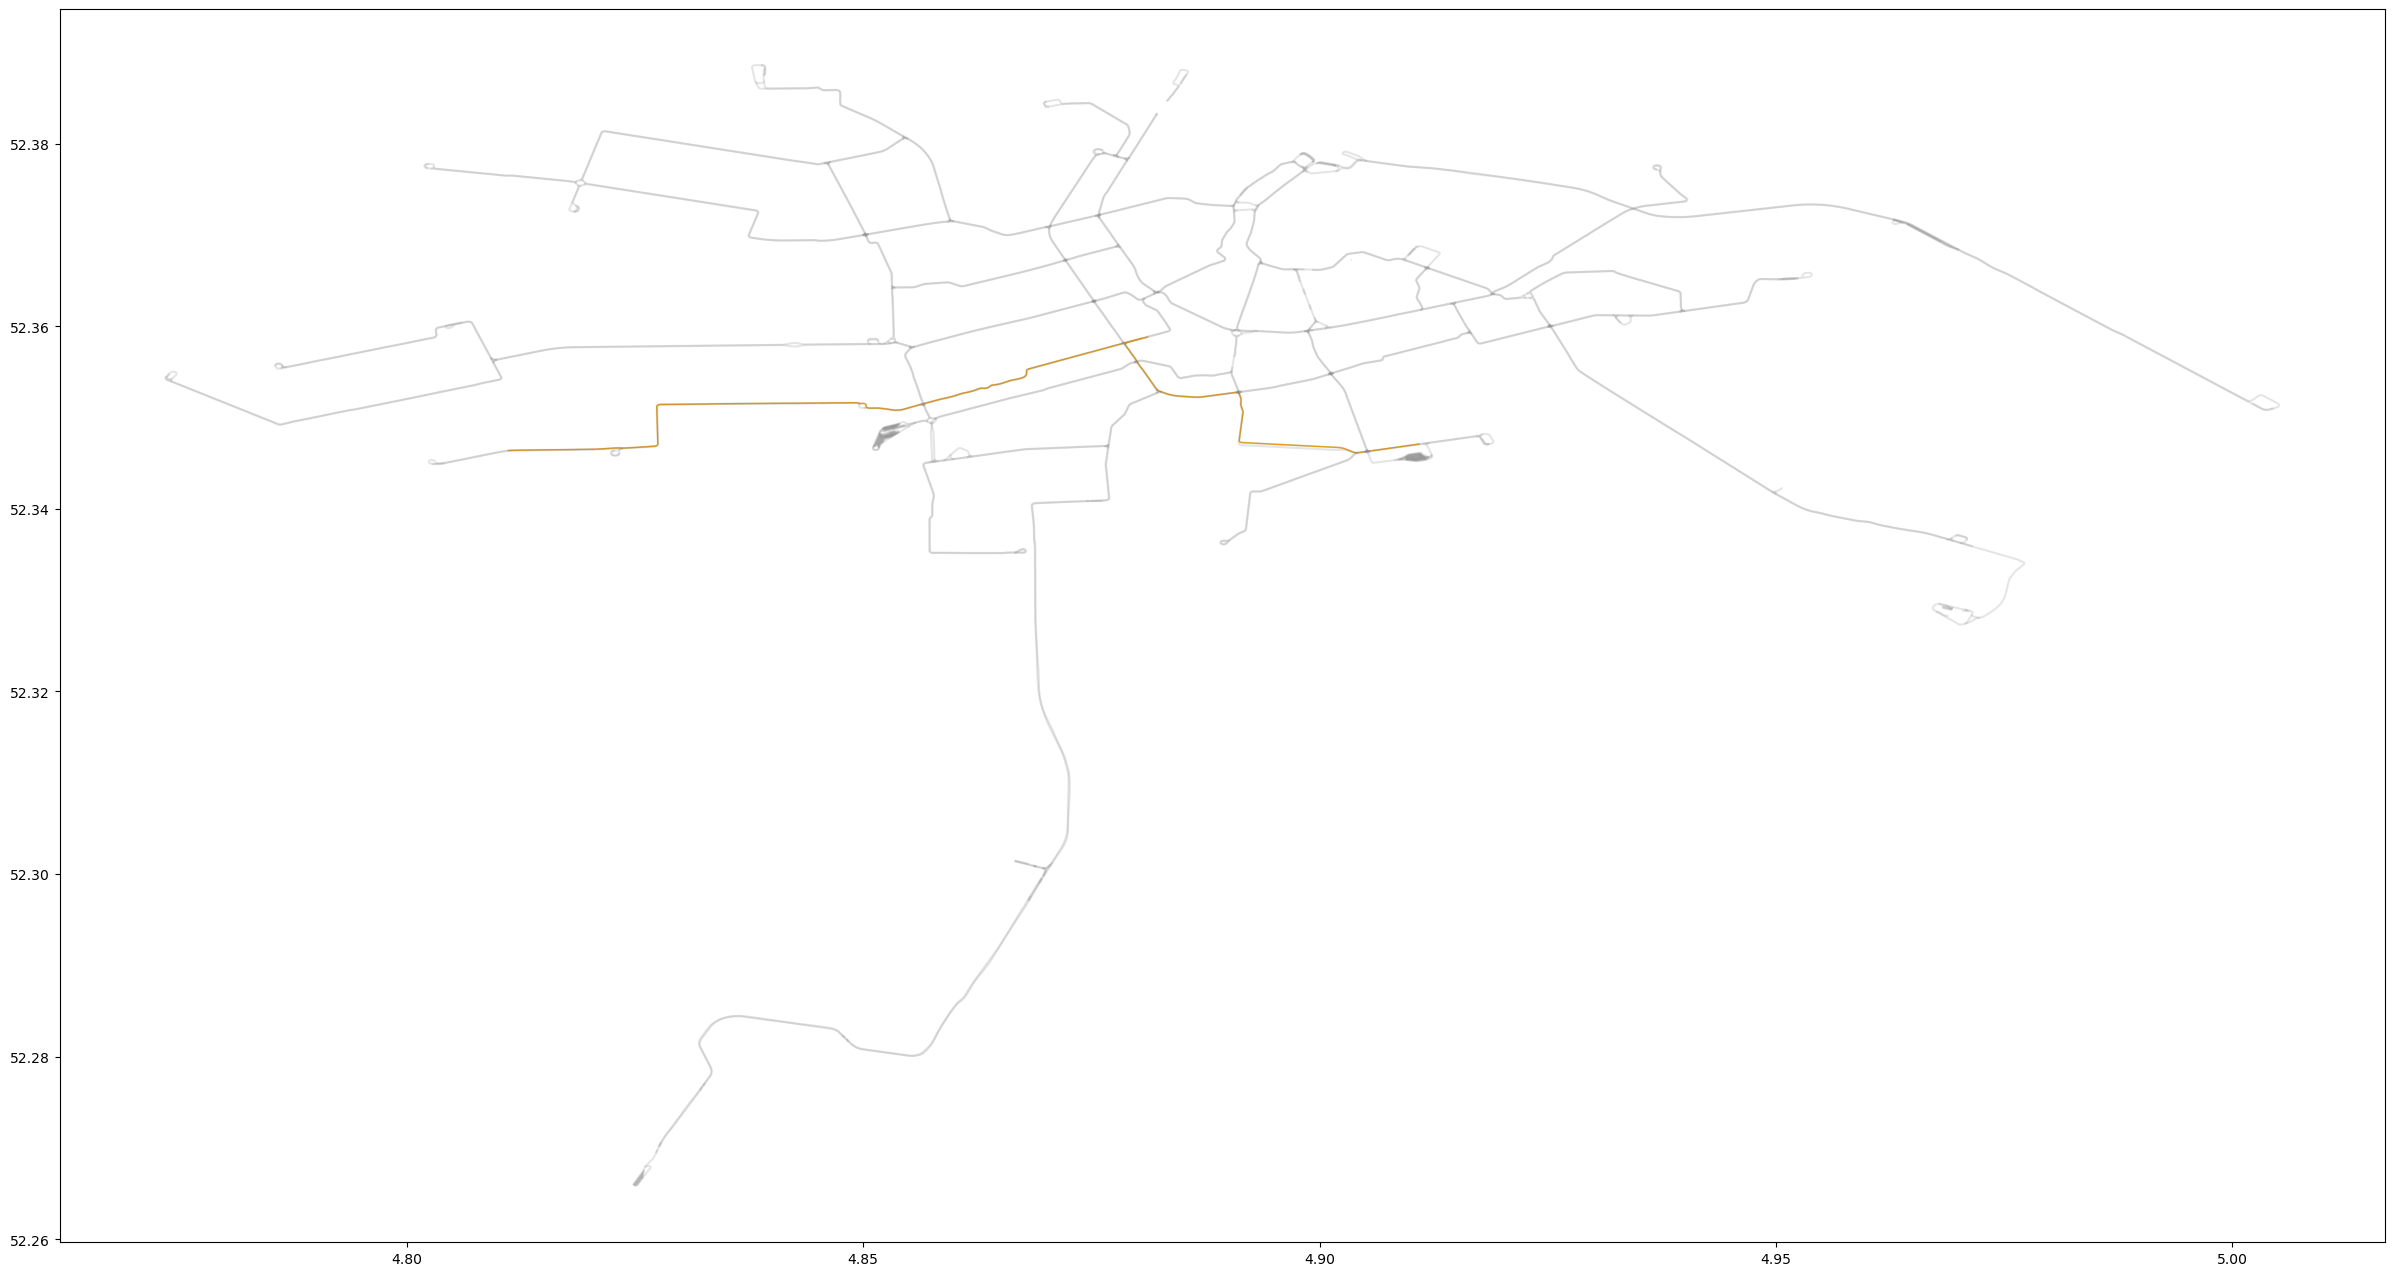

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(30, 20))

gpd.GeoDataFrame(city_tram_new_edges.copy()).plot(ax=ax, color='gray', alpha=0.2)

gpd.GeoDataFrame(shortest_path_edges_way.copy()).plot(ax=ax, zorder=1, linewidth=(shortest_path_edges_way.count_weight), color='orange')

## Test 9: Amsterdam 9 -- s-no transfer, e-transfer, s_e has no same route, need to find a transfer station

### Change coordinates dictionary of s_e points into two Dataframes of s_e nodes

In [24]:
s_e_coordinates_t9 = {
    's_coordinates_x': 4.8076940077002135,
    's_coordinates_y': 52.35848878418726, 
    'e_coordinates_x': 4.950847570013904, 
    'e_coordinates_y': 52.36524973295602
} 
# s_e_coordinates_t10 = {
#     's_coordinates_x': 4.8115177735527075,
#     's_coordinates_y': 52.34475724321188, 
#     'e_coordinates_x': 4.9108857184322074, 
#     'e_coordinates_y': 52.34706351681445
# } 

In [25]:
start_node, end_node = s_e_node_df(s_e_coordinates_t9, city_tram_new_nodes)

In [26]:
start_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
167,POINT (4.80806 52.35864),2,1829,Osdorpplein Oost,4.808058,52.358636,"(4.8080582, 52.358636)",Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...,tram,17,None


In [27]:
end_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
135,POINT (4.95106 52.36525),2,1170,Flevopark,4.951057,52.365247,"(4.9510568, 52.3652467)",Tram 14: Amsterdam Flevopark => Amsterdam Cent...,tram,"14, 3","14, 3"


In [28]:
end_node.iloc[0,9]

'14, 3'

### Find the route which the s_e nodes are on----compare with new_edges instead of routes dataframe, should compare with routes dataframe

In [29]:
s_on_route_ref,e_on_route_ref = s_e_on_route_ref(start_node, end_node)

In [30]:
s_on_route_ref

,ref
0,17


In [31]:
e_on_route_ref

,ref
0,14
1,3


### Make judgement of s_e_on_route_ref

In [32]:
s_on_route_ref, e_on_route_ref = judge_on_route(s_on_route_ref, e_on_route_ref)

None of e_on_route is the same as s_on_route 

The next step is to find transfer stations of e_on_route and s_on_route----using function 'transfer_station'


### Find transfer stations----transfer_station_one_mode

In [33]:
t_station_node = transfer_station_one_mode(city_tram_routes, start_node, end_node, city_tram_new_nodes, city_tram_order_route_dict)

In [34]:
t_station_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
175,POINT (4.89876 52.37860),2,1911,Centraal Station,4.898765,52.378595,"(4.8987647, 52.3785952)",Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...,tram,"12, 13, 14, 17, 2, 24, 26, 4","12, 13, 14, 17, 2, 24, 26, 4"


### Get all stations between s_e nodes and transfer nodes

In [35]:
s_on_route_ref,t_on_route_ref = s_e_on_route_ref(start_node, t_station_node)

In [36]:
s_t_same_routes_df = s_e_same_routes(s_on_route_ref,t_on_route_ref)
s_t_same_routes_df

s_node and e_node are on same route/routes:  ref
0  17



,ref
0,17


In [37]:
all_stations_on_matched_routes_dfs_s_t = all_stations_on_matched_routes(s_t_same_routes_df,city_tram_routes,start_node,t_station_node,city_tram_order_route_dict)
all_stations_on_matched_routes_dfs_s_t

[    id                  name                      geometry     geo_x  \
 0   11        Dijkgraafplein  POINT (4.7864929 52.3554481)  4.786493   
 1   14       Baden Powellweg  POINT (4.7917476 52.3565018)  4.791748   
 2   15              Hoekenes  POINT (4.7995659 52.3580714)  4.799566   
 3   16      Osdorpplein West  POINT (4.8032054 52.3595387)  4.803205   
 4   17      Osdorpplein Oost   POINT (4.8080582 52.358636)  4.808058   
 5    3         Meer en Vaart  POINT (4.8107529 52.3565093)  4.810753   
 6   13    Johan Huizingalaan  POINT (4.8262383 52.3577873)  4.826238   
 7    2      Station Lelylaan   POINT (4.834559 52.3578798)  4.834559   
 8    1     Derkinderenstraat  POINT (4.8401257 52.3579358)  4.840126   
 9    0         Surinameplein  POINT (4.8521827 52.3580481)  4.852183   
 10   4       Corantijnstraat  POINT (4.8532957 52.3617312)  4.853296   
 11  19              Hoofdweg   POINT (4.853975 52.3642479)  4.853975   
 12   5   Witte de Withstraat  POINT (4.8591799 52.

In [38]:
btw_stations_each_way_list_s_t = btw_stations_each_way_list(start_node,t_station_node,all_stations_on_matched_routes_dfs_s_t)
btw_stations_each_way_list_s_t

[    id                  name                      geometry     geo_x  \
 4   17      Osdorpplein Oost   POINT (4.8080582 52.358636)  4.808058   
 5    3         Meer en Vaart  POINT (4.8107529 52.3565093)  4.810753   
 6   13    Johan Huizingalaan  POINT (4.8262383 52.3577873)  4.826238   
 7    2      Station Lelylaan   POINT (4.834559 52.3578798)  4.834559   
 8    1     Derkinderenstraat  POINT (4.8401257 52.3579358)  4.840126   
 9    0         Surinameplein  POINT (4.8521827 52.3580481)  4.852183   
 10   4       Corantijnstraat  POINT (4.8532957 52.3617312)  4.853296   
 11  19              Hoofdweg   POINT (4.853975 52.3642479)  4.853975   
 12   5   Witte de Withstraat  POINT (4.8591799 52.3648019)   4.85918   
 13   6  Nicolaas Beetsstraat  POINT (4.8654725 52.3654615)  4.865473   
 14   7      Bilderdijkstraat  POINT (4.8717631 52.3671254)  4.871763   
 15  12           Rozengracht   POINT (4.875944 52.3718196)  4.875944   
 16   8          Elandsgracht  POINT (4.8775579 52.

In [39]:
t_on_route_ref,e_on_route_ref = s_e_on_route_ref( t_station_node,end_node)

In [40]:
t_e_same_routes_df = s_e_same_routes(t_on_route_ref,e_on_route_ref)
t_e_same_routes_df

s_node and e_node are on same route/routes:  ref
2  14



,ref
2,14


In [41]:
all_stations_on_matched_routes_dfs_t_e = all_stations_on_matched_routes(t_e_same_routes_df,city_tram_routes,t_station_node,end_node,city_tram_order_route_dict)
all_stations_on_matched_routes_dfs_t_e

[    id                 name                      geometry     geo_x  \
 0   15            Flevopark  POINT (4.9510568 52.3652467)  4.951057   
 1    6         Insulindeweg  POINT (4.9476342 52.3647569)  4.947634   
 2    7       Soembawastraat  POINT (4.9441018 52.3622746)  4.944102   
 3    8       Molukkenstraat  POINT (4.9401785 52.3617259)  4.940179   
 4   14            Javaplein  POINT (4.9382411 52.3641725)  4.938241   
 5    2        Zeeburgerdijk  POINT (4.9324425 52.3659327)  4.932442   
 6    3       Pontanusstraat  POINT (4.9272032 52.3659058)  4.927203   
 7    0       Alexanderplein  POINT (4.9193627 52.3635043)  4.919363   
 8   13   Plantage Lepellaan  POINT (4.9152768 52.3652225)  4.915277   
 9    5                Artis   POINT (4.910955 52.3667187)  4.910955   
 10   1  Meester Visserplein  POINT (4.9053602 52.3679611)   4.90536   
 11   4        Waterlooplein  POINT (4.9019846 52.3669934)  4.901985   
 12  12       Rembrandtplein  POINT (4.8964238 52.3662601)  4.89

In [42]:
btw_stations_each_way_list_t_e = btw_stations_each_way_list(t_station_node,end_node,all_stations_on_matched_routes_dfs_t_e)
btw_stations_each_way_list_t_e

[    id                 name                      geometry     geo_x  \
 15  33     Centraal Station  POINT (4.9009806 52.3777485)  4.900981   
 14  10                  Dam  POINT (4.8953791 52.3748676)  4.895379   
 13  11                Rokin   POINT (4.892274 52.3697221)  4.892274   
 12  12       Rembrandtplein  POINT (4.8964238 52.3662601)  4.896424   
 11   4        Waterlooplein  POINT (4.9019846 52.3669934)  4.901985   
 10   1  Meester Visserplein  POINT (4.9053602 52.3679611)   4.90536   
 9    5                Artis   POINT (4.910955 52.3667187)  4.910955   
 8   13   Plantage Lepellaan  POINT (4.9152768 52.3652225)  4.915277   
 7    0       Alexanderplein  POINT (4.9193627 52.3635043)  4.919363   
 6    3       Pontanusstraat  POINT (4.9272032 52.3659058)  4.927203   
 5    2        Zeeburgerdijk  POINT (4.9324425 52.3659327)  4.932442   
 4   14            Javaplein  POINT (4.9382411 52.3641725)  4.938241   
 3    8       Molukkenstraat  POINT (4.9401785 52.3617259)  4.94

### Get all nodes and id_pairs of nodes between s_e nodes

In [43]:
btw_all_id_pairs_list_s_t = btw_all_ids_pairs(btw_stations_each_way_list_s_t,city_tram_new_nodes)
btw_all_id_pairs_list_s_t

[    s_id  e_id
 0   1535  1779
 1   1779  1533
 2   1533  1532
 3   1532   953
 4    953  1681
 5   1681  1675
 6   1675  1829
 7   1829  1623
 8   1623  1892
 9   1892  1624
 10  1624  1625
 11  1625  1627
 12  1627  1236
 13  1236  1653
 14  1653  1911]

In [44]:
btw_all_id_pairs_list_t_e = btw_all_ids_pairs(btw_stations_each_way_list_t_e,city_tram_new_nodes)
btw_all_id_pairs_list_t_e

[    s_id  e_id
 0   1170  1609
 1   1609  1610
 2   1610  1611
 3   1611  1750
 4   1750  1511
 5   1511  1512
 6   1512  1498
 7   1498  1730
 8   1730  1608
 9   1608  1499
 10  1499  1513
 11  1513  1717
 12  1717  1716
 13  1716  1714
 14  1714  1909]

### Calculate shortest path and plot

In [45]:
btw_all_id_pairs_list_unique_s_t = drop_df_in_list(btw_all_id_pairs_list_s_t)

All dataframes in the list are the same


In [46]:
btw_all_id_pairs_list_unique_t_e = drop_df_in_list(btw_all_id_pairs_list_t_e)

All dataframes in the list are the same


In [47]:
btw_all_id_pairs_list_unique_s_t[0]

,s_id,e_id
0,1535,1779
1,1779,1533
2,1533,1532
3,1532,953
4,953,1681
5,1681,1675
6,1675,1829
7,1829,1623
8,1623,1892
9,1892,1624


In [48]:
btw_all_id_pairs_list_unique_t_e[0]

,s_id,e_id
0,1170,1609
1,1609,1610
2,1610,1611
3,1611,1750
4,1750,1511
5,1511,1512
6,1512,1498
7,1498,1730
8,1730,1608
9,1608,1499


In [49]:
G = create_ground_graph(edges, nodes)

In [50]:
shortest_path_pairs_way_s_t = all_shortest_paths(G, btw_all_id_pairs_list_unique_s_t[0], edges)

In [51]:
shortest_path_pairs_way_s_t

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
189,27029151,"LINESTRING (4.8211928 52.3577305, 4.8215687 52...",tram,None,189,244,245,25.608633,0.001829,25,"(244, 245)","(245, 244)"
190,27029152,"LINESTRING (4.8215687 52.3577347, 4.8262383 52...",tram,None,190,245,1779,318.122859,0.022723,318,"(245, 1779)","(1779, 245)"
192,27029162,"LINESTRING (4.8190667 52.3577066, 4.8211928 52...",tram,None,192,246,244,144.843383,0.010346,144,"(246, 244)","(244, 246)"
193,27029163,"LINESTRING (4.8183151 52.357695, 4.8190667 52....",tram,None,193,247,246,51.211387,0.003658,51,"(247, 246)","(246, 247)"
195,27029169,"LINESTRING (4.8107529 52.3565093, 4.8148726 52...",tram,None,195,1535,247,534.061031,0.038147,534,"(1535, 247)","(247, 1535)"
...,...,...,...,...,...,...,...,...,...,...,...,...
1941,785603063,"LINESTRING (4.8973794 52.3783942, 4.8976168 52...",tram,None,1941,1352,1353,27.745130,0.001982,27,"(1352, 1353)","(1353, 1352)"
2072,843182085,"LINESTRING (4.8978061 52.3787548, 4.8978264 52...",tram,None,2072,1435,1311,2.253609,0.000161,2,"(1435, 1311)","(1311, 1435)"
2088,939770575,"LINESTRING (4.8972244 52.3782023, 4.897259 52....",tram,None,2088,462,1352,23.931129,0.001709,23,"(462, 1352)","(1352, 462)"
2093,952254137,"LINESTRING (4.8906807 52.373335, 4.8907615 52....",tram,None,2093,937,700,56.745956,0.004053,56,"(937, 700)","(700, 937)"


In [52]:
duplicate_row_count_way_s_t, shortest_path_edges_way_s_t, edges_way_s_t = edges_with_count_weight(shortest_path_pairs_way_s_t, edges)

In [53]:
shortest_path_edges_way_s_t

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight
0,27029151,"LINESTRING (4.8211928 52.3577305, 4.8215687 52...",tram,None,189,244,245,25.608633,0.001829,25,"(244, 245)","(245, 244)",3.0
1,27029152,"LINESTRING (4.8215687 52.3577347, 4.8262383 52...",tram,None,190,245,1779,318.122859,0.022723,318,"(245, 1779)","(1779, 245)",3.0
2,27029162,"LINESTRING (4.8190667 52.3577066, 4.8211928 52...",tram,None,192,246,244,144.843383,0.010346,144,"(246, 244)","(244, 246)",3.0
3,27029163,"LINESTRING (4.8183151 52.357695, 4.8190667 52....",tram,None,193,247,246,51.211387,0.003658,51,"(247, 246)","(246, 247)",3.0
4,27029169,"LINESTRING (4.8107529 52.3565093, 4.8148726 52...",tram,None,195,1535,247,534.061031,0.038147,534,"(1535, 247)","(247, 1535)",3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,785603063,"LINESTRING (4.8973794 52.3783942, 4.8976168 52...",tram,None,1941,1352,1353,27.745130,0.001982,27,"(1352, 1353)","(1353, 1352)",1.0
222,843182085,"LINESTRING (4.8978061 52.3787548, 4.8978264 52...",tram,None,2072,1435,1311,2.253609,0.000161,2,"(1435, 1311)","(1311, 1435)",1.0
223,939770575,"LINESTRING (4.8972244 52.3782023, 4.897259 52....",tram,None,2088,462,1352,23.931129,0.001709,23,"(462, 1352)","(1352, 462)",1.0
224,952254137,"LINESTRING (4.8906807 52.373335, 4.8907615 52....",tram,None,2093,937,700,56.745956,0.004053,56,"(937, 700)","(700, 937)",3.0


In [54]:
shortest_path_pairs_way_t_e = all_shortest_paths(G, btw_all_id_pairs_list_unique_t_e[0], edges)

In [55]:
shortest_path_pairs_way_t_e

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
478,122385065,"LINESTRING (4.9502558 52.3651638, 4.9487575 52...",tram,None,478,513,1609,201.691792,0.014407,201,"(513, 1609)","(1609, 513)"
2065,814780776,"LINESTRING (4.950611 52.3651828, 4.9505562 52....",tram,None,2065,158,513,24.284635,0.001735,24,"(158, 513)","(513, 158)"
2066,814780777,"LINESTRING (4.9510568 52.3652467, 4.9509589 52...",tram,None,2066,1170,158,31.292011,0.002235,31,"(1170, 158)","(158, 1170)"
479,122385065,"LINESTRING (4.9476342 52.3647569, 4.9475619 52...",tram,None,479,1609,514,237.333939,0.016952,237,"(1609, 514)","(514, 1609)"
1045,325023864,"LINESTRING (4.9467147 52.3627108, 4.9466832 52...",tram,None,1045,514,1610,185.658585,0.013261,185,"(514, 1610)","(1610, 514)"
1046,325023864,"LINESTRING (4.9441018 52.3622746, 4.9439138 52...",tram,None,1046,1610,1611,274.100949,0.019579,274,"(1610, 1611)","(1611, 1610)"
278,27124329,"LINESTRING (4.9396824 52.3618622, 4.9396154 52...",tram,None,278,321,1750,309.738557,0.022124,309,"(321, 1750)","(1750, 321)"
946,323515445,"LINESTRING (4.9400699 52.3617106, 4.9400498 52...",tram,None,946,918,321,34.778264,0.002484,34,"(918, 321)","(321, 918)"
1047,325023864,"LINESTRING (4.9401785 52.3617259, 4.9400699 52...",tram,None,1047,1611,918,7.590124,0.000542,7,"(1611, 918)","(918, 1611)"
279,27124329,"LINESTRING (4.9382411 52.3641725, 4.9381721 52...",tram,None,279,1750,1511,441.187371,0.031513,441,"(1750, 1511)","(1511, 1750)"


In [56]:
duplicate_row_count_way_t_e, shortest_path_edges_way_t_e, edges_way_t_e = edges_with_count_weight(shortest_path_pairs_way_t_e, edges)

In [57]:
shortest_path_edges_way_t_e

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight
0,122385065,"LINESTRING (4.9502558 52.3651638, 4.9487575 52...",tram,None,478,513,1609,201.691792,0.014407,201,"(513, 1609)","(1609, 513)",1.0
1,814780776,"LINESTRING (4.950611 52.3651828, 4.9505562 52....",tram,None,2065,158,513,24.284635,0.001735,24,"(158, 513)","(513, 158)",1.0
2,814780777,"LINESTRING (4.9510568 52.3652467, 4.9509589 52...",tram,None,2066,1170,158,31.292011,0.002235,31,"(1170, 158)","(158, 1170)",1.0
3,122385065,"LINESTRING (4.9476342 52.3647569, 4.9475619 52...",tram,None,479,1609,514,237.333939,0.016952,237,"(1609, 514)","(514, 1609)",1.0
4,325023864,"LINESTRING (4.9467147 52.3627108, 4.9466832 52...",tram,None,1045,514,1610,185.658585,0.013261,185,"(514, 1610)","(1610, 514)",1.0
5,325023864,"LINESTRING (4.9441018 52.3622746, 4.9439138 52...",tram,None,1046,1610,1611,274.100949,0.019579,274,"(1610, 1611)","(1611, 1610)",1.0
6,27124329,"LINESTRING (4.9396824 52.3618622, 4.9396154 52...",tram,None,278,321,1750,309.738557,0.022124,309,"(321, 1750)","(1750, 321)",1.0
7,323515445,"LINESTRING (4.9400699 52.3617106, 4.9400498 52...",tram,None,946,918,321,34.778264,0.002484,34,"(918, 321)","(321, 918)",1.0
8,325023864,"LINESTRING (4.9401785 52.3617259, 4.9400699 52...",tram,None,1047,1611,918,7.590124,0.000542,7,"(1611, 918)","(918, 1611)",1.0
9,27124329,"LINESTRING (4.9382411 52.3641725, 4.9381721 52...",tram,None,279,1750,1511,441.187371,0.031513,441,"(1750, 1511)","(1511, 1750)",1.0


In [58]:
shortest_path_edges_way = pd.concat([shortest_path_edges_way_s_t,shortest_path_edges_way_t_e])
shortest_path_edges_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight
0,27029151,"LINESTRING (4.8211928 52.3577305, 4.8215687 52...",tram,None,189,244,245,25.608633,0.001829,25,"(244, 245)","(245, 244)",3.0
1,27029152,"LINESTRING (4.8215687 52.3577347, 4.8262383 52...",tram,None,190,245,1779,318.122859,0.022723,318,"(245, 1779)","(1779, 245)",3.0
2,27029162,"LINESTRING (4.8190667 52.3577066, 4.8211928 52...",tram,None,192,246,244,144.843383,0.010346,144,"(246, 244)","(244, 246)",3.0
3,27029163,"LINESTRING (4.8183151 52.357695, 4.8190667 52....",tram,None,193,247,246,51.211387,0.003658,51,"(247, 246)","(246, 247)",3.0
4,27029169,"LINESTRING (4.8107529 52.3565093, 4.8148726 52...",tram,None,195,1535,247,534.061031,0.038147,534,"(1535, 247)","(247, 1535)",3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,679004453,"LINESTRING (4.8980962 52.3769073, 4.8982356 52...",tram,None,1599,938,1282,62.175770,0.004441,62,"(938, 1282)","(1282, 938)",1.0
49,718172146,"LINESTRING (4.8987718 52.3774315, 4.8987054 52...",tram,None,1692,333,1282,43.173729,0.003084,43,"(333, 1282)","(1282, 333)",1.0
50,785957809,"LINESTRING (4.8989311 52.3775398, 4.898826 52....",tram,None,1945,336,333,16.212016,0.001158,16,"(336, 333)","(333, 336)",1.0
51,1006193429,"LINESTRING (4.899621 52.3778607, 4.899432 52.3...",tram,None,2097,1167,335,26.306853,0.001879,26,"(1167, 335)","(335, 1167)",1.0


<Axes: >

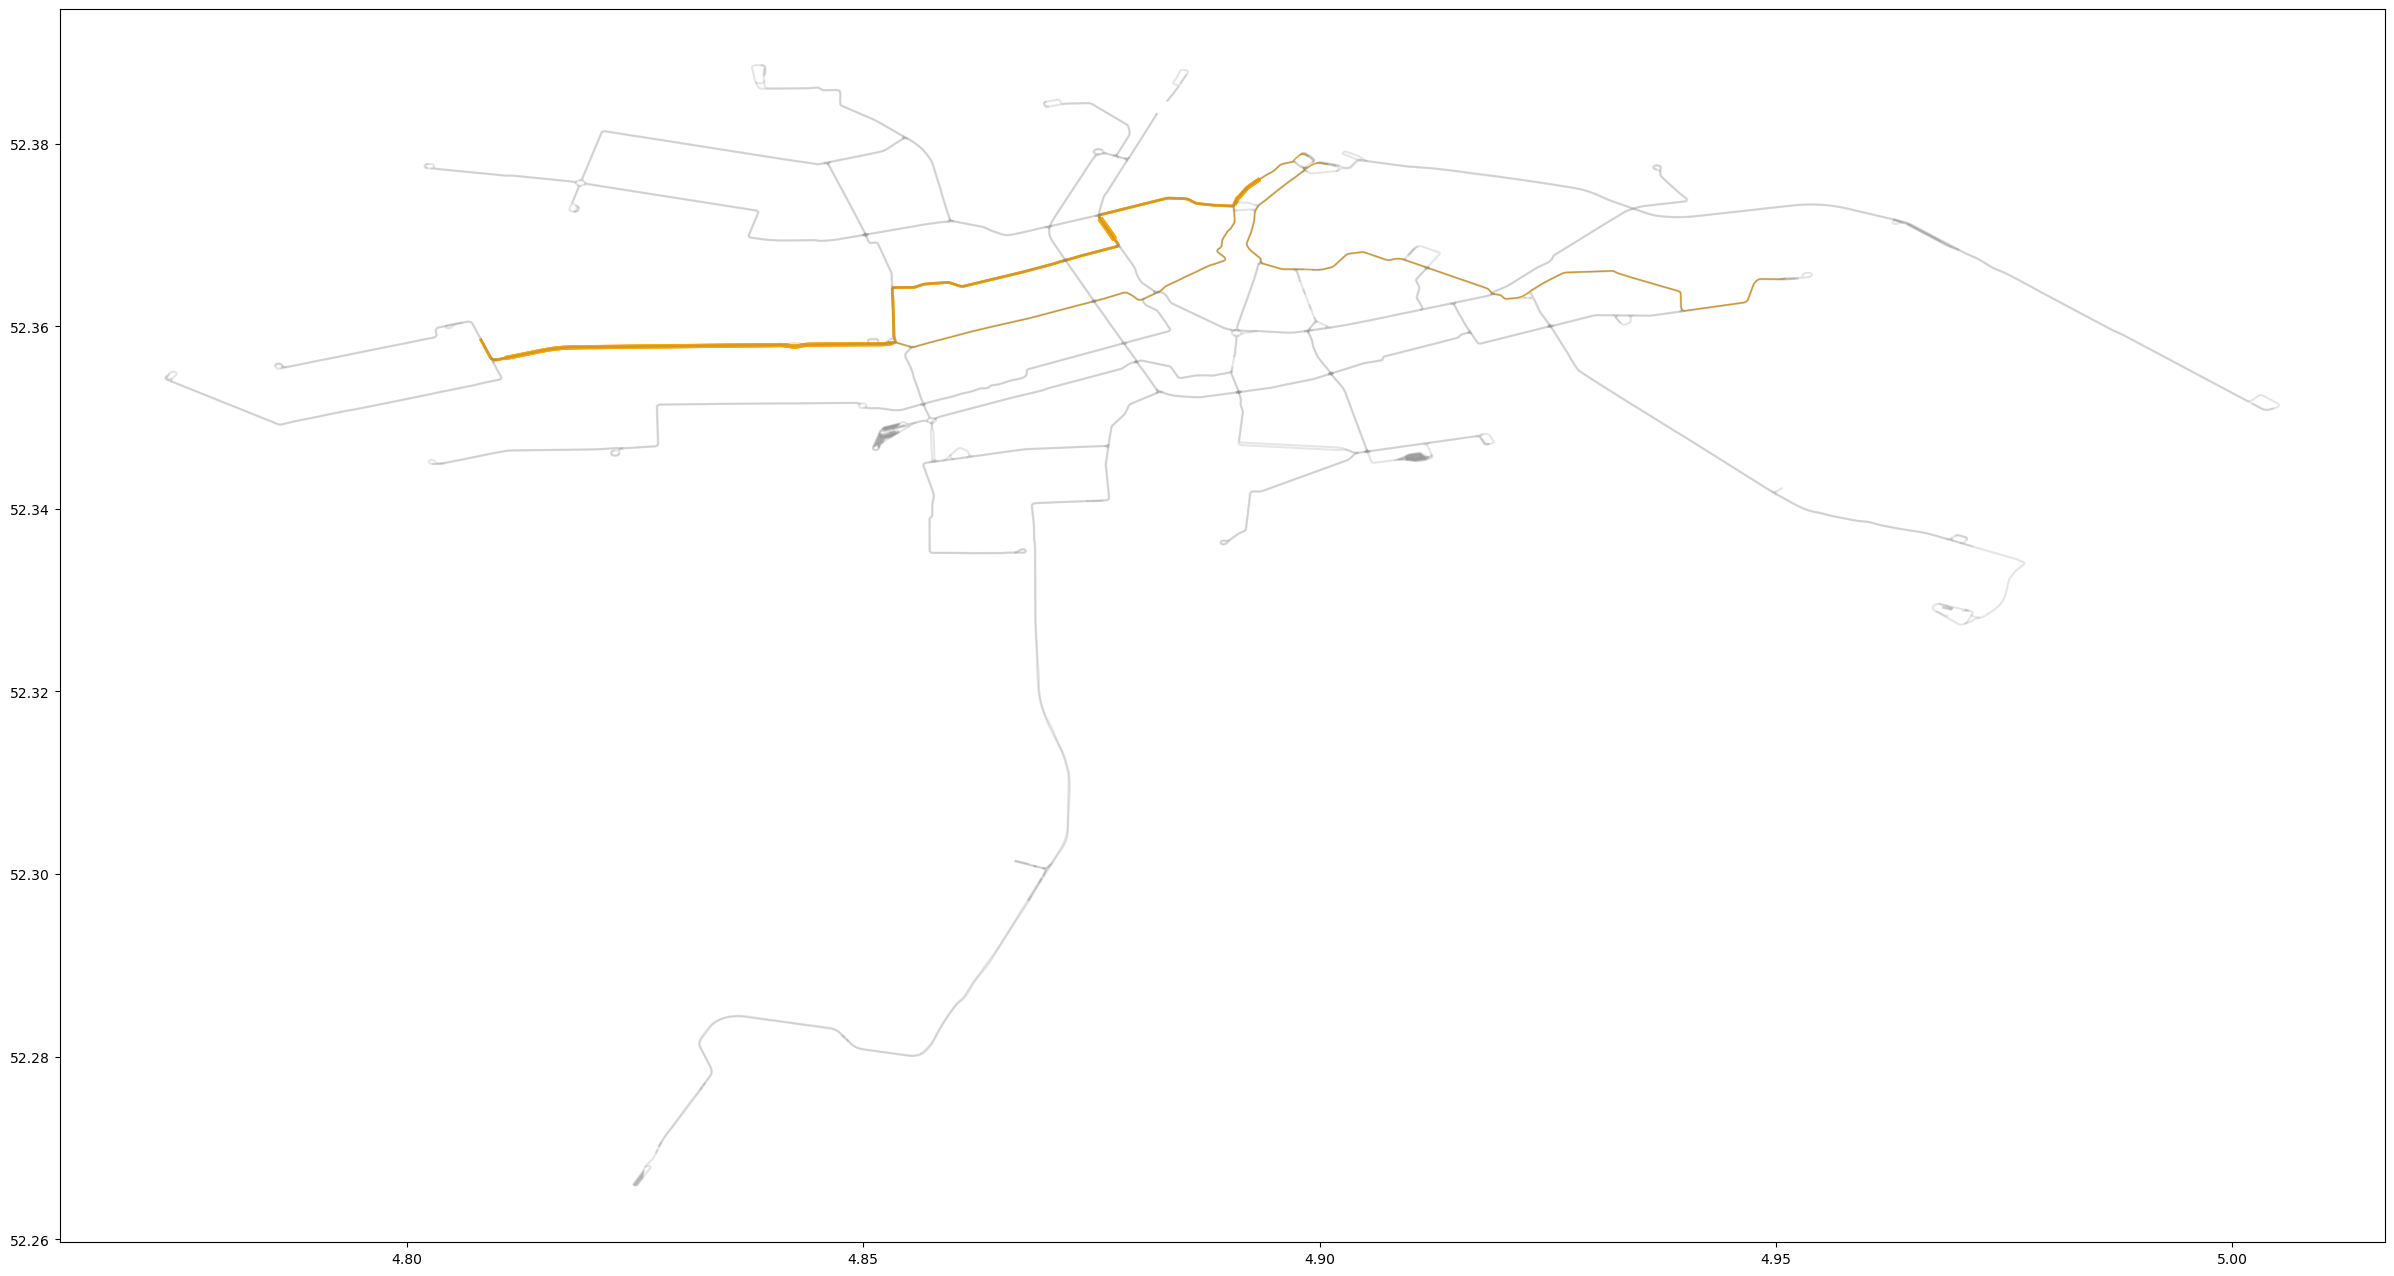

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(30, 20))

gpd.GeoDataFrame(city_tram_new_edges.copy()).plot(ax=ax, color='gray', alpha=0.2)

gpd.GeoDataFrame(shortest_path_edges_way.copy()).plot(ax=ax, zorder=1, linewidth=(shortest_path_edges_way.count_weight), color='orange')

## Test 8: Amsterdam 8 -- s-transfer, e-transfer, s_e has no same route, need to find a transfer station

### Change coordinates dictionary of s_e points into two Dataframes of s_e nodes

In [24]:
s_e_coordinates_t8 = {
    's_coordinates_x':  4.799689101728929,
    's_coordinates_y': 52.35827341252233, 
    'e_coordinates_x': 4.918953746291416, 
    'e_coordinates_y': 52.36305592581854
} 
# s_e_coordinates_t9 = {
#     's_coordinates_x': 4.8076940077002135,
#     's_coordinates_y': 52.35848878418726, 
#     'e_coordinates_x': 4.950847570013904, 
#     'e_coordinates_y': 52.36524973295602
# } 
# s_e_coordinates_t10 = {
#     's_coordinates_x': 4.8115177735527075,
#     's_coordinates_y': 52.34475724321188, 
#     'e_coordinates_x': 4.9108857184322074, 
#     'e_coordinates_y': 52.34706351681445
# } 

In [25]:
start_node, end_node = s_e_node_df(s_e_coordinates_t8, city_tram_new_nodes)

In [26]:
start_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
165,POINT (4.79957 52.35807),2,1826,Hoekenes,4.799566,52.358071,"(4.7995659, 52.3580714)",Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...,tram,"1, 17","1, 17"


In [27]:
end_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
411,POINT (4.91857 52.36337),2,1803,Alexanderplein,4.918568,52.363371,"(4.9185684, 52.3633708)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,"14, 19, 7","14, 19, 7"


In [28]:
end_node.iloc[0,9]

'14, 19, 7'

### Find the route which the s_e nodes are on----compare with new_edges instead of routes dataframe, should compare with routes dataframe

In [29]:
s_on_route_ref,e_on_route_ref = s_e_on_route_ref(start_node, end_node)

In [30]:
s_on_route_ref

,ref
0,1
1,17


In [31]:
e_on_route_ref

,ref
0,14
1,19
2,7


### Make judgement of s_e_on_route_ref

In [32]:
s_on_route_ref, e_on_route_ref = judge_on_route(s_on_route_ref, e_on_route_ref)

Any of e_on_route is not the same as any of s_on_route 

The next step is to find transfer stations of e_on_route and s_on_route----using function 'transfer_station'


### Find transfer stations----transfer_station_one_mode

In [33]:
t_station_node = transfer_station_one_mode(city_tram_routes, start_node, end_node, city_tram_new_nodes, city_tram_order_route_dict)

In [34]:
t_station_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
172,POINT (4.87176 52.36713),2,1627,Bilderdijkstraat,4.871763,52.367125,"(4.8717631, 52.3671254)",Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...,tram,"13, 17, 19, 7","13, 17, 19, 7"


### Get all stations between s_e nodes and transfer nodes

In [35]:
s_on_route_ref,t_on_route_ref = s_e_on_route_ref(start_node, t_station_node)

In [36]:
s_t_same_routes_df = s_e_same_routes(s_on_route_ref,t_on_route_ref)
s_t_same_routes_df

s_node and e_node are on same route/routes:  ref
1  17



,ref
1,17


In [37]:
all_stations_on_matched_routes_dfs_s_t = all_stations_on_matched_routes(s_t_same_routes_df,city_tram_routes,start_node,t_station_node,city_tram_order_route_dict)
all_stations_on_matched_routes_dfs_s_t

[    id                  name                      geometry     geo_x  \
 0   11        Dijkgraafplein  POINT (4.7864929 52.3554481)  4.786493   
 1   14       Baden Powellweg  POINT (4.7917476 52.3565018)  4.791748   
 2   15              Hoekenes  POINT (4.7995659 52.3580714)  4.799566   
 3   16      Osdorpplein West  POINT (4.8032054 52.3595387)  4.803205   
 4   17      Osdorpplein Oost   POINT (4.8080582 52.358636)  4.808058   
 5    3         Meer en Vaart  POINT (4.8107529 52.3565093)  4.810753   
 6   13    Johan Huizingalaan  POINT (4.8262383 52.3577873)  4.826238   
 7    2      Station Lelylaan   POINT (4.834559 52.3578798)  4.834559   
 8    1     Derkinderenstraat  POINT (4.8401257 52.3579358)  4.840126   
 9    0         Surinameplein  POINT (4.8521827 52.3580481)  4.852183   
 10   4       Corantijnstraat  POINT (4.8532957 52.3617312)  4.853296   
 11  19              Hoofdweg   POINT (4.853975 52.3642479)  4.853975   
 12   5   Witte de Withstraat  POINT (4.8591799 52.

In [38]:
btw_stations_each_way_list_s_t = btw_stations_each_way_list(start_node,t_station_node,all_stations_on_matched_routes_dfs_s_t)
btw_stations_each_way_list_s_t

[    id                  name                      geometry     geo_x  \
 2   15              Hoekenes  POINT (4.7995659 52.3580714)  4.799566   
 3   16      Osdorpplein West  POINT (4.8032054 52.3595387)  4.803205   
 4   17      Osdorpplein Oost   POINT (4.8080582 52.358636)  4.808058   
 5    3         Meer en Vaart  POINT (4.8107529 52.3565093)  4.810753   
 6   13    Johan Huizingalaan  POINT (4.8262383 52.3577873)  4.826238   
 7    2      Station Lelylaan   POINT (4.834559 52.3578798)  4.834559   
 8    1     Derkinderenstraat  POINT (4.8401257 52.3579358)  4.840126   
 9    0         Surinameplein  POINT (4.8521827 52.3580481)  4.852183   
 10   4       Corantijnstraat  POINT (4.8532957 52.3617312)  4.853296   
 11  19              Hoofdweg   POINT (4.853975 52.3642479)  4.853975   
 12   5   Witte de Withstraat  POINT (4.8591799 52.3648019)   4.85918   
 13   6  Nicolaas Beetsstraat  POINT (4.8654725 52.3654615)  4.865473   
 14   7      Bilderdijkstraat  POINT (4.8717631 52.

In [39]:
t_on_route_ref,e_on_route_ref = s_e_on_route_ref( t_station_node,end_node)

In [40]:
t_e_same_routes_df = s_e_same_routes(t_on_route_ref,e_on_route_ref)
t_e_same_routes_df

s_node and e_node are on same route/routes:  ref
2  19
3   7



,ref
2,19
3,7


In [41]:
all_stations_on_matched_routes_dfs_t_e = all_stations_on_matched_routes(t_e_same_routes_df,city_tram_routes,t_station_node,end_node,city_tram_order_route_dict)
all_stations_on_matched_routes_dfs_t_e

[    id                       name                      geometry     geo_x  \
 0    6         Station Sloterdijk  POINT (4.8392172 52.3879696)  4.839217   
 1   22                  Molenwerf  POINT (4.8465973 52.3858579)  4.846597   
 2    8              Wiltzanghlaan  POINT (4.8522251 52.3820439)  4.852225   
 3    7           Bos en Lommerweg  POINT (4.8552771 52.3803006)  4.855277   
 4    1              De Rijpstraat  POINT (4.8577243 52.3773555)  4.857724   
 5    2        Jan van Galenstraat  POINT (4.8586427 52.3743002)  4.858643   
 6   17     Admiraal De Ruijterweg  POINT (4.8604577 52.3713902)  4.860458   
 7   16      Willem de Zwijgerlaan  POINT (4.8641586 52.3704221)  4.864159   
 8   19           Bilderdijkstraat  POINT (4.8698359 52.3708243)  4.869836   
 9   18               Kinkerstraat  POINT (4.8719933 52.3674579)  4.871993   
 10   4               Elandsgracht  POINT (4.8784804 52.3681689)   4.87848   
 11   5                Leidseplein  POINT (4.8830722 52.3634714)

In [42]:
btw_stations_each_way_list_t_e = btw_stations_each_way_list(t_station_node,end_node,all_stations_on_matched_routes_dfs_t_e)
btw_stations_each_way_list_t_e

[    id                       name                      geometry     geo_x  \
 9   18               Kinkerstraat  POINT (4.8719933 52.3674579)  4.871993   
 10   4               Elandsgracht  POINT (4.8784804 52.3681689)   4.87848   
 11   5                Leidseplein  POINT (4.8830722 52.3634714)  4.883072   
 12  21                Rijksmuseum  POINT (4.8873395 52.3608307)   4.88734   
 13  25               Vijzelgracht  POINT (4.8925358 52.3594772)  4.892536   
 14  24             Frederiksplein  POINT (4.9000102 52.3596835)   4.90001   
 15   0               Weesperplein  POINT (4.9091584 52.3614042)  4.909158   
 16  28  Korte 's-Gravesandestraat  POINT (4.9141489 52.3624363)  4.914149   
 17   9             Alexanderplein  POINT (4.9196097 52.3634343)   4.91961   
 
         geo_y                                route_name_list ref route  \
 9   52.367458  Tram 19: Amsterdam Sloterdijk => Diemen Sniep  19  tram   
 10  52.368169  Tram 19: Amsterdam Sloterdijk => Diemen Sniep  19  t

### Get all nodes and id_pairs of nodes between s_e nodes

In [43]:
btw_all_id_pairs_list_s_t = btw_all_ids_pairs(btw_stations_each_way_list_s_t,city_tram_new_nodes)
btw_all_id_pairs_list_s_t

[    s_id  e_id
 0   1535  1779
 1   1779  1533
 2   1533  1532
 3   1532   953
 4    953  1826
 5   1826  1827
 6   1827  1829
 7   1829  1623
 8   1623  1892
 9   1892  1624
 10  1624  1625
 11  1625  1627]

In [44]:
btw_all_id_pairs_list_t_e = btw_all_ids_pairs(btw_stations_each_way_list_t_e,city_tram_new_nodes)
btw_all_id_pairs_list_t_e

[   s_id  e_id
 0  1696  1806
 1  1806  1874
 2  1874  1340
 3  1340  1581
 4  1581  1905
 5  1905  1729
 6  1729  1766
 7  1766  1664,
    s_id  e_id
 0  1696  1806
 1  1806  1874
 2  1874  1340
 3  1340  1581
 4  1581  1905
 5  1905  1627
 6  1627  1664
 7  1664  1803]

### Calculate shortest path and plot

In [45]:
btw_all_id_pairs_list_unique_s_t = drop_df_in_list(btw_all_id_pairs_list_s_t)

All dataframes in the list are the same


In [46]:
btw_all_id_pairs_list_unique_t_e = drop_df_in_list(btw_all_id_pairs_list_t_e)

At least one dataframe in the list(btw_all_id_pairs_list) is different


In [47]:
btw_all_id_pairs_list_unique_s_t[0]

,s_id,e_id
0,1535,1779
1,1779,1533
2,1533,1532
3,1532,953
4,953,1826
5,1826,1827
6,1827,1829
7,1829,1623
8,1623,1892
9,1892,1624


In [48]:
btw_all_id_pairs_list_unique_t_e[0]

,s_id,e_id
0,1696,1806
1,1806,1874
2,1874,1340
3,1340,1581
4,1581,1905
5,1905,1729
6,1729,1766
7,1766,1664


In [49]:
btw_all_id_pairs_list_unique_t_e[1]

,s_id,e_id
0,1696,1806
1,1806,1874
2,1874,1340
3,1340,1581
4,1581,1905
5,1905,1627
6,1627,1664
7,1664,1803


In [50]:
G = create_ground_graph(edges, nodes)

In [51]:
shortest_path_pairs_way_s_t = all_shortest_paths(G, btw_all_id_pairs_list_unique_s_t[0], edges)

In [52]:
shortest_path_pairs_way_s_t

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
189,27029151,"LINESTRING (4.8211928 52.3577305, 4.8215687 52...",tram,None,189,244,245,25.608633,0.001829,25,"(244, 245)","(245, 244)"
190,27029152,"LINESTRING (4.8215687 52.3577347, 4.8262383 52...",tram,None,190,245,1779,318.122859,0.022723,318,"(245, 1779)","(1779, 245)"
192,27029162,"LINESTRING (4.8190667 52.3577066, 4.8211928 52...",tram,None,192,246,244,144.843383,0.010346,144,"(246, 244)","(244, 246)"
193,27029163,"LINESTRING (4.8183151 52.357695, 4.8190667 52....",tram,None,193,247,246,51.211387,0.003658,51,"(247, 246)","(246, 247)"
195,27029169,"LINESTRING (4.8107529 52.3565093, 4.8148726 52...",tram,None,195,1535,247,534.061031,0.038147,534,"(1535, 247)","(247, 1535)"
...,...,...,...,...,...,...,...,...,...,...,...,...
2138,1115729937,"LINESTRING (4.8627587 52.3648123, 4.8630527 52...",tram,None,2138,876,1625,198.431982,0.014174,198,"(876, 1625)","(1625, 876)"
59,7373392,"LINESTRING (4.8707352 52.3668174, 4.8709073 52...",tram,None,59,82,83,12.959056,0.000926,12,"(82, 83)","(83, 82)"
917,323311654,"LINESTRING (4.8709073 52.3668671, 4.8711061 52...",tram,None,917,83,1627,64.995218,0.004643,64,"(83, 1627)","(1627, 83)"
1787,743742841,"LINESTRING (4.8665057 52.3657092, 4.8670939 52...",tram,None,1787,1329,82,313.358014,0.022383,313,"(1329, 82)","(82, 1329)"


In [53]:
duplicate_row_count_way_s_t, shortest_path_edges_way_s_t, edges_way_s_t = edges_with_count_weight(shortest_path_pairs_way_s_t, edges)

In [54]:
shortest_path_edges_way_s_t

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight
0,27029151,"LINESTRING (4.8211928 52.3577305, 4.8215687 52...",tram,None,189,244,245,25.608633,0.001829,25,"(244, 245)","(245, 244)",3.0
1,27029152,"LINESTRING (4.8215687 52.3577347, 4.8262383 52...",tram,None,190,245,1779,318.122859,0.022723,318,"(245, 1779)","(1779, 245)",3.0
2,27029162,"LINESTRING (4.8190667 52.3577066, 4.8211928 52...",tram,None,192,246,244,144.843383,0.010346,144,"(246, 244)","(244, 246)",3.0
3,27029163,"LINESTRING (4.8183151 52.357695, 4.8190667 52....",tram,None,193,247,246,51.211387,0.003658,51,"(247, 246)","(246, 247)",3.0
4,27029169,"LINESTRING (4.8107529 52.3565093, 4.8148726 52...",tram,None,195,1535,247,534.061031,0.038147,534,"(1535, 247)","(247, 1535)",3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,1115729937,"LINESTRING (4.8627587 52.3648123, 4.8630527 52...",tram,None,2138,876,1625,198.431982,0.014174,198,"(876, 1625)","(1625, 876)",1.0
92,7373392,"LINESTRING (4.8707352 52.3668174, 4.8709073 52...",tram,None,59,82,83,12.959056,0.000926,12,"(82, 83)","(83, 82)",1.0
93,323311654,"LINESTRING (4.8709073 52.3668671, 4.8711061 52...",tram,None,917,83,1627,64.995218,0.004643,64,"(83, 1627)","(1627, 83)",1.0
94,743742841,"LINESTRING (4.8665057 52.3657092, 4.8670939 52...",tram,None,1787,1329,82,313.358014,0.022383,313,"(1329, 82)","(82, 1329)",1.0


In [55]:
shortest_path_pairs_way_t_e = all_shortest_paths(G, btw_all_id_pairs_list_unique_t_e[0], edges)

In [56]:
shortest_path_pairs_way_t_e

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
403,39609643,"LINESTRING (4.8830722 52.3634714, 4.8831316 52...",tram,None,403,1696,433,81.119574,0.005794,81,"(1696, 433)","(433, 1696)"
1474,597900262,"LINESTRING (4.886626 52.3611685, 4.8867034 52....",tram,None,1474,1243,1806,61.433346,0.004388,61,"(1243, 1806)","(1806, 1243)"
1814,759979462,"LINESTRING (4.8835349 52.3628019, 4.8836248 52...",tram,None,1814,433,1336,22.696692,0.001621,22,"(433, 1336)","(1336, 433)"
1816,759979464,"LINESTRING (4.88367 52.3626156, 4.8837218 52.3...",tram,None,1816,1336,1243,258.335271,0.018453,258,"(1336, 1243)","(1243, 1336)"
240,27080498,"LINESTRING (4.8881562 52.360444, 4.889257 52.3...",tram,None,240,291,44,166.265530,0.011876,166,"(291, 44)","(44, 291)"
...,...,...,...,...,...,...,...,...,...,...,...,...
930,323311666,"LINESTRING (4.8781685 52.3685942, 4.8784804 52...",tram,None,930,788,1664,51.864301,0.003705,51,"(788, 1664)","(1664, 788)"
1011,324002513,"LINESTRING (4.8776422 52.3687041, 4.8776972 52...",tram,None,1011,669,788,41.833266,0.002988,41,"(669, 788)","(788, 669)"
1122,327373708,"LINESTRING (4.872398 52.3672953, 4.8725656 52....",tram,None,1122,1007,892,80.296960,0.005735,80,"(1007, 892)","(892, 1007)"
1493,598956877,"LINESTRING (4.8720461 52.3673804, 4.8720631 52...",tram,None,1493,1006,1007,28.001155,0.002000,28,"(1006, 1007)","(1007, 1006)"


In [57]:
duplicate_row_count_way_t_e, shortest_path_edges_way_t_e, edges_way_t_e = edges_with_count_weight(shortest_path_pairs_way_t_e, edges)

In [58]:
shortest_path_edges_way_t_e

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight
0,39609643,"LINESTRING (4.8830722 52.3634714, 4.8831316 52...",tram,None,403,1696,433,81.119574,0.005794,81,"(1696, 433)","(433, 1696)",2.0
1,597900262,"LINESTRING (4.886626 52.3611685, 4.8867034 52....",tram,None,1474,1243,1806,61.433346,0.004388,61,"(1243, 1806)","(1806, 1243)",2.0
2,759979462,"LINESTRING (4.8835349 52.3628019, 4.8836248 52...",tram,None,1814,433,1336,22.696692,0.001621,22,"(433, 1336)","(1336, 433)",2.0
3,759979464,"LINESTRING (4.88367 52.3626156, 4.8837218 52.3...",tram,None,1816,1336,1243,258.335271,0.018453,258,"(1336, 1243)","(1243, 1336)",2.0
4,27080498,"LINESTRING (4.8881562 52.360444, 4.889257 52.3...",tram,None,240,291,44,166.265530,0.011876,166,"(291, 44)","(44, 291)",2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,323311666,"LINESTRING (4.8781685 52.3685942, 4.8784804 52...",tram,None,930,788,1664,51.864301,0.003705,51,"(788, 1664)","(1664, 788)",2.0
72,324002513,"LINESTRING (4.8776422 52.3687041, 4.8776972 52...",tram,None,1011,669,788,41.833266,0.002988,41,"(669, 788)","(788, 669)",2.0
73,327373708,"LINESTRING (4.872398 52.3672953, 4.8725656 52....",tram,None,1122,1007,892,80.296960,0.005735,80,"(1007, 892)","(892, 1007)",2.0
74,598956877,"LINESTRING (4.8720461 52.3673804, 4.8720631 52...",tram,None,1493,1006,1007,28.001155,0.002000,28,"(1006, 1007)","(1007, 1006)",2.0


In [59]:
shortest_path_pairs_way_t_e1 = all_shortest_paths(G, btw_all_id_pairs_list_unique_t_e[1], edges)

In [60]:
shortest_path_pairs_way_t_e1

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
403,39609643,"LINESTRING (4.8830722 52.3634714, 4.8831316 52...",tram,None,403,1696,433,81.119574,0.005794,81,"(1696, 433)","(433, 1696)"
1474,597900262,"LINESTRING (4.886626 52.3611685, 4.8867034 52....",tram,None,1474,1243,1806,61.433346,0.004388,61,"(1243, 1806)","(1806, 1243)"
1814,759979462,"LINESTRING (4.8835349 52.3628019, 4.8836248 52...",tram,None,1814,433,1336,22.696692,0.001621,22,"(433, 1336)","(1336, 433)"
1816,759979464,"LINESTRING (4.88367 52.3626156, 4.8837218 52.3...",tram,None,1816,1336,1243,258.335271,0.018453,258,"(1336, 1243)","(1243, 1336)"
240,27080498,"LINESTRING (4.8881562 52.360444, 4.889257 52.3...",tram,None,240,291,44,166.265530,0.011876,166,"(291, 44)","(44, 291)"
...,...,...,...,...,...,...,...,...,...,...,...,...
1816,759979464,"LINESTRING (4.88367 52.3626156, 4.8837218 52.3...",tram,None,1816,1336,1243,258.335271,0.018453,258,"(1336, 1243)","(1243, 1336)"
1836,770403863,"LINESTRING (4.8992767 52.3595841, 4.9000102 52...",tram,None,1836,1249,1340,51.170148,0.003655,51,"(1249, 1340)","(1340, 1249)"
1837,770403864,"LINESTRING (4.8932064 52.3594732, 4.8962177 52...",tram,None,1837,1248,508,348.915130,0.024923,348,"(1248, 508)","(508, 1248)"
2051,813274520,"LINESTRING (4.9000102 52.3596835, 4.9005646 52...",tram,None,2051,1340,888,38.738587,0.002767,38,"(1340, 888)","(888, 1340)"


In [61]:
duplicate_row_count_way_t_e1, shortest_path_edges_way_t_e1, edges_way_t_e1 = edges_with_count_weight(shortest_path_pairs_way_t_e1, edges)

In [62]:
shortest_path_edges_way_t_e1

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight
0,39609643,"LINESTRING (4.8830722 52.3634714, 4.8831316 52...",tram,None,403,1696,433,81.119574,0.005794,81,"(1696, 433)","(433, 1696)",3.0
1,597900262,"LINESTRING (4.886626 52.3611685, 4.8867034 52....",tram,None,1474,1243,1806,61.433346,0.004388,61,"(1243, 1806)","(1806, 1243)",3.0
2,759979462,"LINESTRING (4.8835349 52.3628019, 4.8836248 52...",tram,None,1814,433,1336,22.696692,0.001621,22,"(433, 1336)","(1336, 433)",3.0
3,759979464,"LINESTRING (4.88367 52.3626156, 4.8837218 52.3...",tram,None,1816,1336,1243,258.335271,0.018453,258,"(1336, 1243)","(1243, 1336)",3.0
4,27080498,"LINESTRING (4.8881562 52.360444, 4.889257 52.3...",tram,None,240,291,44,166.265530,0.011876,166,"(291, 44)","(44, 291)",3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,759979464,"LINESTRING (4.88367 52.3626156, 4.8837218 52.3...",tram,None,1816,1336,1243,258.335271,0.018453,258,"(1336, 1243)","(1243, 1336)",3.0
89,770403863,"LINESTRING (4.8992767 52.3595841, 4.9000102 52...",tram,None,1836,1249,1340,51.170148,0.003655,51,"(1249, 1340)","(1340, 1249)",3.0
90,770403864,"LINESTRING (4.8932064 52.3594732, 4.8962177 52...",tram,None,1837,1248,508,348.915130,0.024923,348,"(1248, 508)","(508, 1248)",3.0
91,813274520,"LINESTRING (4.9000102 52.3596835, 4.9005646 52...",tram,None,2051,1340,888,38.738587,0.002767,38,"(1340, 888)","(888, 1340)",3.0


In [63]:
shortest_path_edges_way = pd.concat([shortest_path_edges_way_s_t,shortest_path_edges_way_t_e])
shortest_path_edges_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight
0,27029151,"LINESTRING (4.8211928 52.3577305, 4.8215687 52...",tram,None,189,244,245,25.608633,0.001829,25,"(244, 245)","(245, 244)",3.0
1,27029152,"LINESTRING (4.8215687 52.3577347, 4.8262383 52...",tram,None,190,245,1779,318.122859,0.022723,318,"(245, 1779)","(1779, 245)",3.0
2,27029162,"LINESTRING (4.8190667 52.3577066, 4.8211928 52...",tram,None,192,246,244,144.843383,0.010346,144,"(246, 244)","(244, 246)",3.0
3,27029163,"LINESTRING (4.8183151 52.357695, 4.8190667 52....",tram,None,193,247,246,51.211387,0.003658,51,"(247, 246)","(246, 247)",3.0
4,27029169,"LINESTRING (4.8107529 52.3565093, 4.8148726 52...",tram,None,195,1535,247,534.061031,0.038147,534,"(1535, 247)","(247, 1535)",3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,323311666,"LINESTRING (4.8781685 52.3685942, 4.8784804 52...",tram,None,930,788,1664,51.864301,0.003705,51,"(788, 1664)","(1664, 788)",2.0
72,324002513,"LINESTRING (4.8776422 52.3687041, 4.8776972 52...",tram,None,1011,669,788,41.833266,0.002988,41,"(669, 788)","(788, 669)",2.0
73,327373708,"LINESTRING (4.872398 52.3672953, 4.8725656 52....",tram,None,1122,1007,892,80.296960,0.005735,80,"(1007, 892)","(892, 1007)",2.0
74,598956877,"LINESTRING (4.8720461 52.3673804, 4.8720631 52...",tram,None,1493,1006,1007,28.001155,0.002000,28,"(1006, 1007)","(1007, 1006)",2.0


In [64]:
shortest_path_edges_way1 = pd.concat([shortest_path_edges_way_s_t,shortest_path_edges_way_t_e1])
shortest_path_edges_way1

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight
0,27029151,"LINESTRING (4.8211928 52.3577305, 4.8215687 52...",tram,None,189,244,245,25.608633,0.001829,25,"(244, 245)","(245, 244)",3.0
1,27029152,"LINESTRING (4.8215687 52.3577347, 4.8262383 52...",tram,None,190,245,1779,318.122859,0.022723,318,"(245, 1779)","(1779, 245)",3.0
2,27029162,"LINESTRING (4.8190667 52.3577066, 4.8211928 52...",tram,None,192,246,244,144.843383,0.010346,144,"(246, 244)","(244, 246)",3.0
3,27029163,"LINESTRING (4.8183151 52.357695, 4.8190667 52....",tram,None,193,247,246,51.211387,0.003658,51,"(247, 246)","(246, 247)",3.0
4,27029169,"LINESTRING (4.8107529 52.3565093, 4.8148726 52...",tram,None,195,1535,247,534.061031,0.038147,534,"(1535, 247)","(247, 1535)",3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,759979464,"LINESTRING (4.88367 52.3626156, 4.8837218 52.3...",tram,None,1816,1336,1243,258.335271,0.018453,258,"(1336, 1243)","(1243, 1336)",3.0
89,770403863,"LINESTRING (4.8992767 52.3595841, 4.9000102 52...",tram,None,1836,1249,1340,51.170148,0.003655,51,"(1249, 1340)","(1340, 1249)",3.0
90,770403864,"LINESTRING (4.8932064 52.3594732, 4.8962177 52...",tram,None,1837,1248,508,348.915130,0.024923,348,"(1248, 508)","(508, 1248)",3.0
91,813274520,"LINESTRING (4.9000102 52.3596835, 4.9005646 52...",tram,None,2051,1340,888,38.738587,0.002767,38,"(1340, 888)","(888, 1340)",3.0


<Axes: >

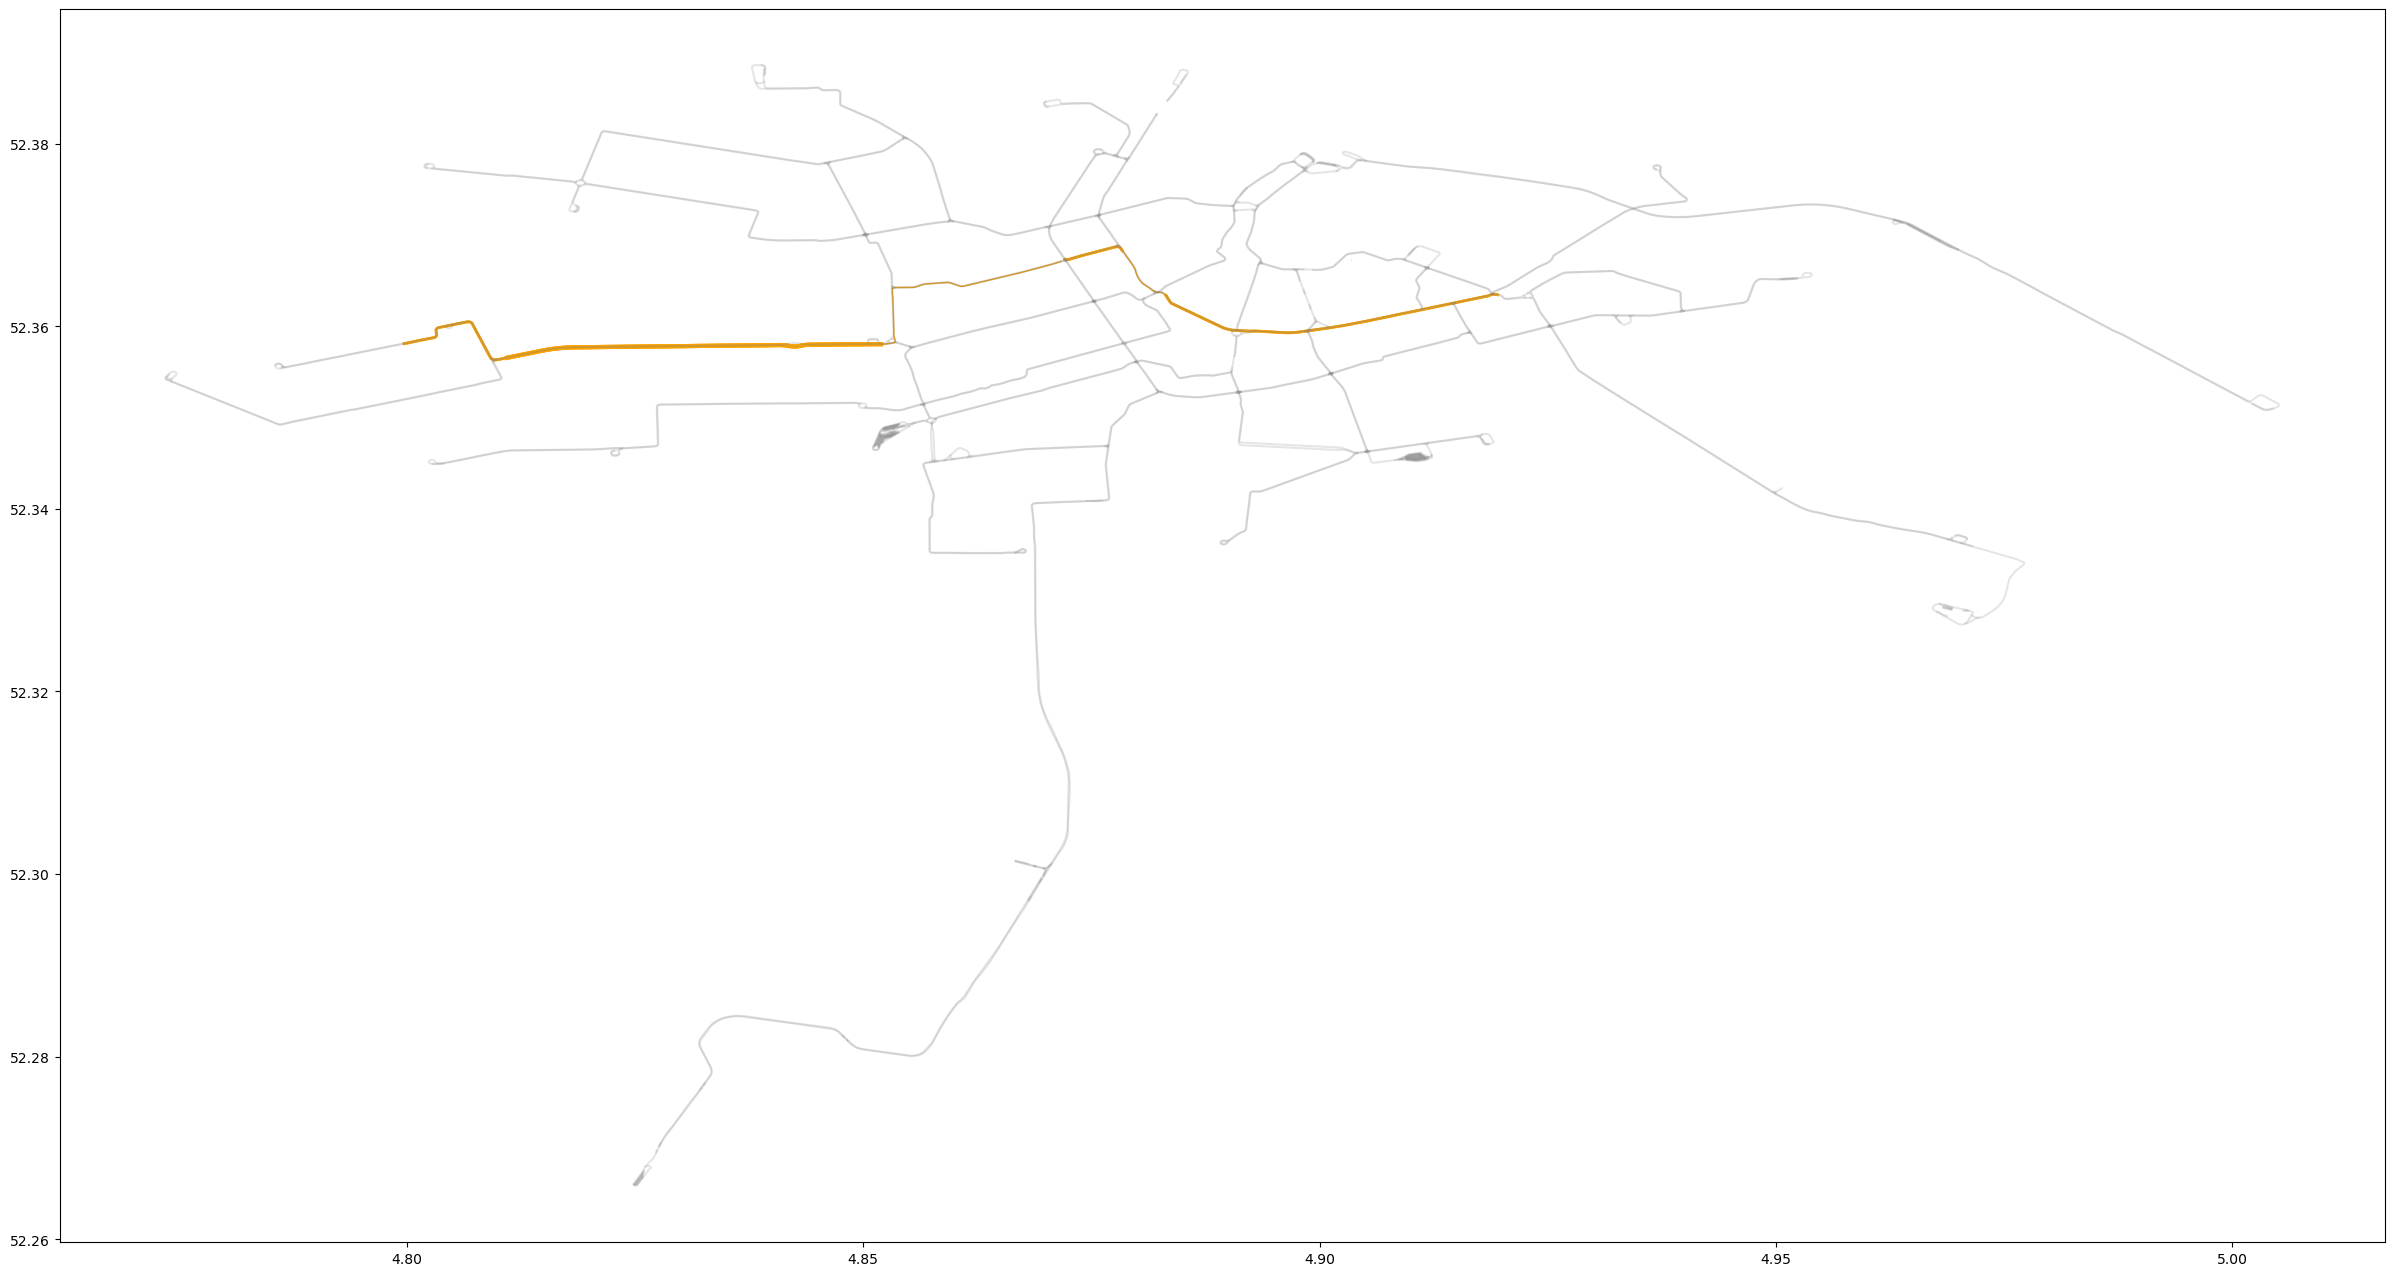

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(30, 20))

gpd.GeoDataFrame(city_tram_new_edges.copy()).plot(ax=ax, color='gray', alpha=0.2)

gpd.GeoDataFrame(shortest_path_edges_way.copy()).plot(ax=ax, zorder=1, linewidth=(shortest_path_edges_way.count_weight), color='orange')

<Axes: >

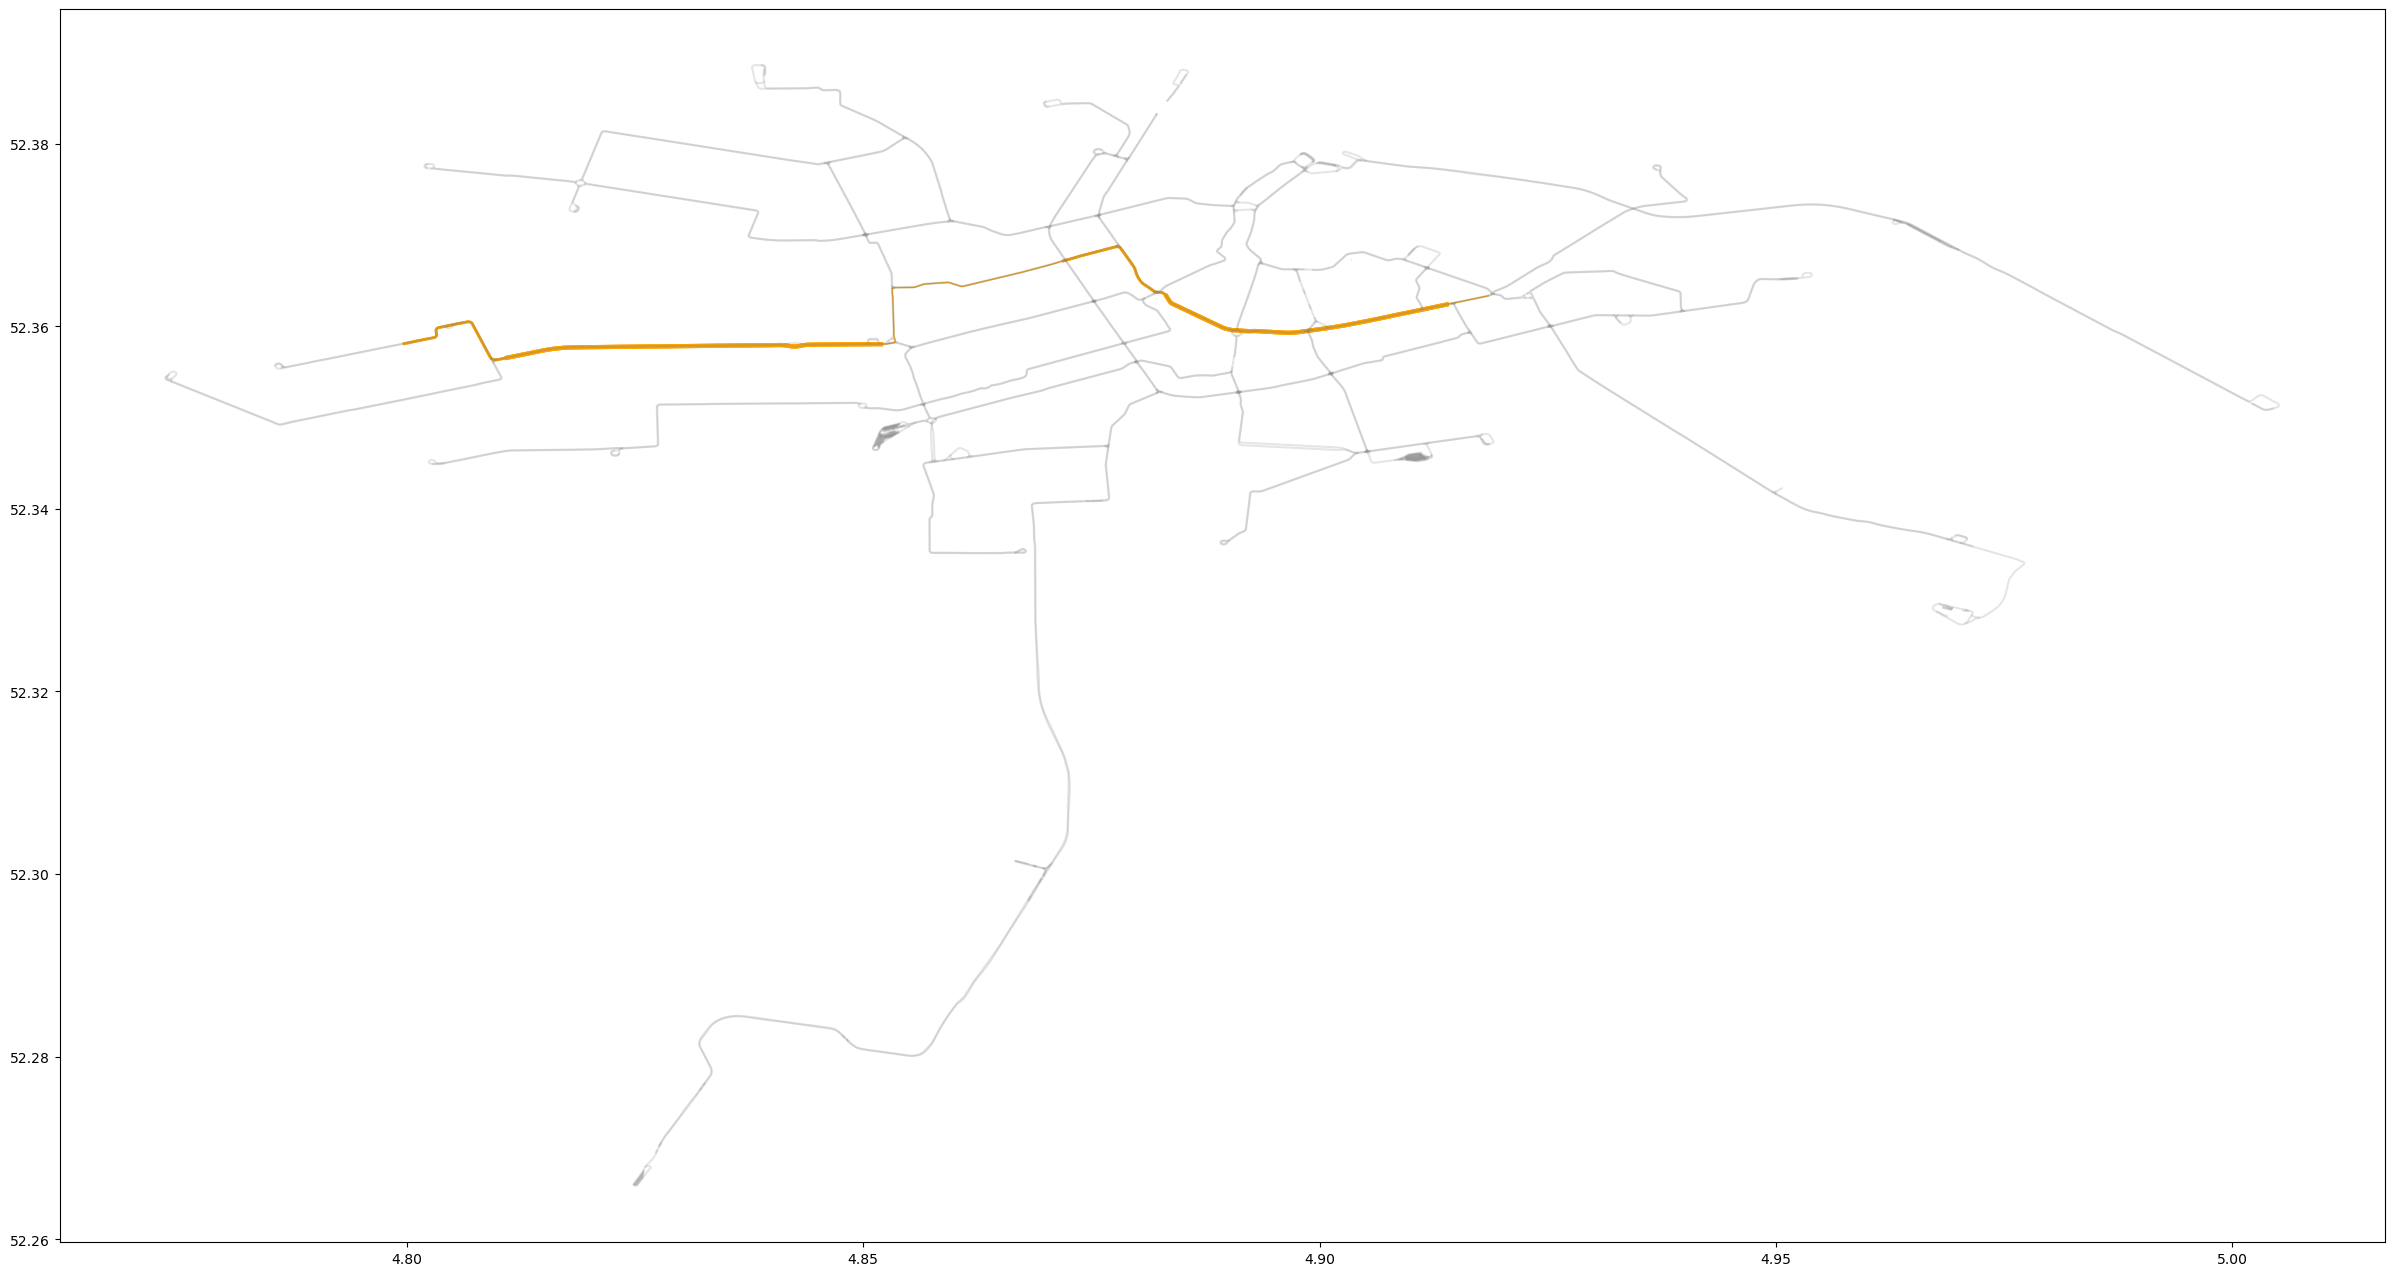

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(30, 20))

gpd.GeoDataFrame(city_tram_new_edges.copy()).plot(ax=ax, color='gray', alpha=0.2)

gpd.GeoDataFrame(shortest_path_edges_way1.copy()).plot(ax=ax, zorder=1, linewidth=(shortest_path_edges_way1.count_weight), color='orange')

## Test 7: Amsterdam 7 -- s-transfer, e-no transfer, s_e has one same route

### Change coordinates dictionary of s_e points into two Dataframes of s_e nodes

In [22]:
s_e_coordinates_t3 = {
    's_coordinates_x': 4.898851078232505,
    's_coordinates_y': 52.37824700176021, 
    'e_coordinates_x': 4.80767869386144, 
    'e_coordinates_y': 52.37723172156935
} 

In [23]:
start_node, end_node = s_e_node_df(s_e_coordinates_t3, city_tram_new_nodes)

In [24]:
start_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
162,POINT (4.89915 52.37828),2,1312,Centraal Station,4.899155,52.378281,"(4.8991546, 52.3782813)",Tram 17: Amsterdam Centraal Station => Amsterd...,tram,"12, 13, 14, 17, 2, 24, 26, 4","12, 13, 14, 17, 2, 24, 26, 4"


In [25]:
end_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
86,POINT (4.80657 52.37694),2,1816,Dr. H. Colijnstraat,4.806575,52.376937,"(4.8065746, 52.3769374)",Tram 13: Amsterdam Centraal Station => Amsterd...,tram,13,None


### Find the route which the s_e nodes are on----compare with new_edges instead of routes dataframe, should compare with routes dataframe

In [26]:
s_on_route_ref,e_on_route_ref = s_e_on_route_ref(start_node, end_node)

### Make judgement of s_e_on_route_ref

In [27]:
s_on_route_ref, e_on_route_ref = judge_on_route(s_on_route_ref, e_on_route_ref)

One of s_on_route is the same as e_on_route 

The next step is to find the same routes----using function 's_e_same_routes'


### Find those same routes

In [28]:
s_e_same_routes_df = s_e_same_routes(s_on_route_ref,e_on_route_ref)
s_e_same_routes_df

s_node and e_node are on same route/routes:  ref
1  13



,ref
1,13


### Get all stations between s_e nodes and transfer nodes

In [29]:
all_stations_on_matched_routes_dfs = all_stations_on_matched_routes(s_e_same_routes_df,city_tram_routes,start_node,end_node,city_tram_order_route_dict)
all_stations_on_matched_routes_dfs

[    id                          name                      geometry     geo_x  \
 0   23           Lambertus Zijlplein  POINT (4.8032895 52.3772583)  4.803289   
 1   14           Dr. H. Colijnstraat  POINT (4.8065746 52.3769374)  4.806575   
 2   13  Burgemeester Van Leeuwenlaan  POINT (4.8117554 52.3765095)  4.811755   
 3    5                Slotermeerlaan  POINT (4.8173607 52.3759547)  4.817361   
 4    6    Burgemeester Rendorpstraat  POINT (4.8277027 52.3743645)  4.827703   
 5   17           Jan van Galenstraat  POINT (4.8350051 52.3732337)  4.835005   
 6   15              Jan Tooropstraat   POINT (4.838103 52.3714267)  4.838103   
 7   16             Jan Voermanstraat  POINT (4.8378389 52.3697121)  4.837839   
 8   12       Admiraal Helfrichstraat  POINT (4.8438216 52.3694429)  4.843822   
 9    7                 Mercatorplein  POINT (4.8507957 52.3701459)  4.850796   
 10   8              Marco Polostraat  POINT (4.8554942 52.3709604)  4.855494   
 11   1        Admiraal De R

In [30]:
btw_stations_each_way_list = btw_stations_each_way_list(start_node,end_node,all_stations_on_matched_routes_dfs)
btw_stations_each_way_list

[    id                          name                      geometry     geo_x  \
 18  18              Centraal Station   POINT (4.8992178 52.378303)  4.899218   
 17  11              Nieuwezijds Kolk  POINT (4.8930014 52.3758615)  4.893001   
 16   3                           Dam   POINT (4.8908314 52.373751)  4.890831   
 15  10                   Westermarkt  POINT (4.8837739 52.3740565)  4.883774   
 14   9                  Marnixstraat  POINT (4.8763385 52.3723364)  4.876339   
 13   0              Bilderdijkstraat  POINT (4.8708148 52.3710541)  4.870815   
 12   2         Willem de Zwijgerlaan  POINT (4.8636349 52.3706925)  4.863635   
 11   1        Admiraal De Ruijterweg   POINT (4.8600128 52.371502)  4.860013   
 10   8              Marco Polostraat  POINT (4.8554942 52.3709604)  4.855494   
 9    7                 Mercatorplein  POINT (4.8507957 52.3701459)  4.850796   
 8   12       Admiraal Helfrichstraat  POINT (4.8438216 52.3694429)  4.843822   
 7   16             Jan Voer

### Get all nodes and id_pairs of nodes between s_e nodes

In [31]:
btw_all_id_pairs_list = btw_all_ids_pairs(btw_stations_each_way_list,city_tram_new_nodes)
btw_all_id_pairs_list

[    s_id  e_id
 0   1613  1682
 1   1682  1816
 2   1816  1815
 3   1815  1633
 4   1633  1634
 5   1634  1819
 6   1819  1817
 7   1817  1818
 8   1818  1814
 9   1814  1639
 10  1639  1640
 11  1640  1594
 12  1594  1595
 13  1595  1553
 14  1553  1662
 15  1662  1671
 16  1671  1305]

### Calculate shortest path and plot

In [32]:
btw_all_id_pairs_list_unique = drop_df_in_list(btw_all_id_pairs_list)

All dataframes in the list are the same


In [33]:
btw_all_id_pairs_list_unique

[    s_id  e_id
 0   1613  1682
 1   1682  1816
 2   1816  1815
 3   1815  1633
 4   1633  1634
 5   1634  1819
 6   1819  1817
 7   1817  1818
 8   1818  1814
 9   1814  1639
 10  1639  1640
 11  1640  1594
 12  1594  1595
 13  1595  1553
 14  1553  1662
 15  1662  1671
 16  1671  1305]

In [34]:
G = create_ground_graph(edges, nodes)

In [35]:
shortest_path_pairs_way = all_shortest_paths(G, btw_all_id_pairs_list_unique[0], edges)

In [36]:
shortest_path_pairs_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
1724,730313405,"LINESTRING (4.8930014 52.3758615, 4.8927887 52...",tram,None,1724,1682,1461,93.659093,0.006690,93,"(1682, 1461)","(1461, 1682)"
1725,730313405,"LINESTRING (4.8920868 52.3752328, 4.8919834 52...",tram,None,1725,1461,1462,110.042874,0.007860,110,"(1461, 1462)","(1462, 1461)"
1726,730313405,"LINESTRING (4.89128 52.3743785, 4.8912389 52.3...",tram,None,1726,1462,1613,76.496556,0.005464,76,"(1462, 1613)","(1613, 1462)"
2158,1172020662,"LINESTRING (4.8920868 52.3752328, 4.8920061 52...",tram,None,2158,1461,1462,109.928912,0.007852,109,"(1461, 1462)","(1462, 1461)"
50,7373033,"LINESTRING (4.890643 52.3733417, 4.8906134 52....",tram,None,50,69,70,117.895192,0.008421,117,"(69, 70)","(70, 69)"
...,...,...,...,...,...,...,...,...,...,...,...,...
1728,730325005,"LINESTRING (4.8887025 52.3732782, 4.888576 52....",tram,None,1728,160,1174,95.956568,0.006854,95,"(160, 1174)","(1174, 160)"
1942,785924870,"LINESTRING (4.8929676 52.373268, 4.8925499 52....",tram,None,1942,703,1644,117.635051,0.008403,117,"(703, 1644)","(1644, 703)"
1943,785924870,"LINESTRING (4.8913489 52.3735587, 4.8912162 52...",tram,None,1943,1644,704,9.040371,0.000646,9,"(1644, 704)","(704, 1644)"
2075,843454008,"LINESTRING (4.8990454 52.3778768, 4.8987312 52...",tram,None,2075,1436,1283,33.360991,0.002383,33,"(1436, 1283)","(1283, 1436)"


In [37]:
duplicate_row_count_way, shortest_path_edges_way, edges_way = edges_with_count_weight(shortest_path_pairs_way, edges)

In [38]:
shortest_path_edges_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight
0,730313405,"LINESTRING (4.8930014 52.3758615, 4.8927887 52...",tram,None,1724,1682,1461,93.659093,0.006690,93,"(1682, 1461)","(1461, 1682)",2.0
1,730313405,"LINESTRING (4.8920868 52.3752328, 4.8919834 52...",tram,None,1725,1461,1462,110.042874,0.007860,110,"(1461, 1462)","(1462, 1461)",2.0
2,730313405,"LINESTRING (4.89128 52.3743785, 4.8912389 52.3...",tram,None,1726,1462,1613,76.496556,0.005464,76,"(1462, 1613)","(1613, 1462)",2.0
3,1172020662,"LINESTRING (4.8920868 52.3752328, 4.8920061 52...",tram,None,2158,1461,1462,109.928912,0.007852,109,"(1461, 1462)","(1462, 1461)",2.0
4,7373033,"LINESTRING (4.890643 52.3733417, 4.8906134 52....",tram,None,50,69,70,117.895192,0.008421,117,"(69, 70)","(70, 69)",2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,730325005,"LINESTRING (4.8887025 52.3732782, 4.888576 52....",tram,None,1728,160,1174,95.956568,0.006854,95,"(160, 1174)","(1174, 160)",2.0
144,785924870,"LINESTRING (4.8929676 52.373268, 4.8925499 52....",tram,None,1942,703,1644,117.635051,0.008403,117,"(703, 1644)","(1644, 703)",1.0
145,785924870,"LINESTRING (4.8913489 52.3735587, 4.8912162 52...",tram,None,1943,1644,704,9.040371,0.000646,9,"(1644, 704)","(704, 1644)",1.0
146,843454008,"LINESTRING (4.8990454 52.3778768, 4.8987312 52...",tram,None,2075,1436,1283,33.360991,0.002383,33,"(1436, 1283)","(1283, 1436)",1.0


In [39]:
shortest_path_edges_way.time.sum()

1.034523899520332

<Axes: >

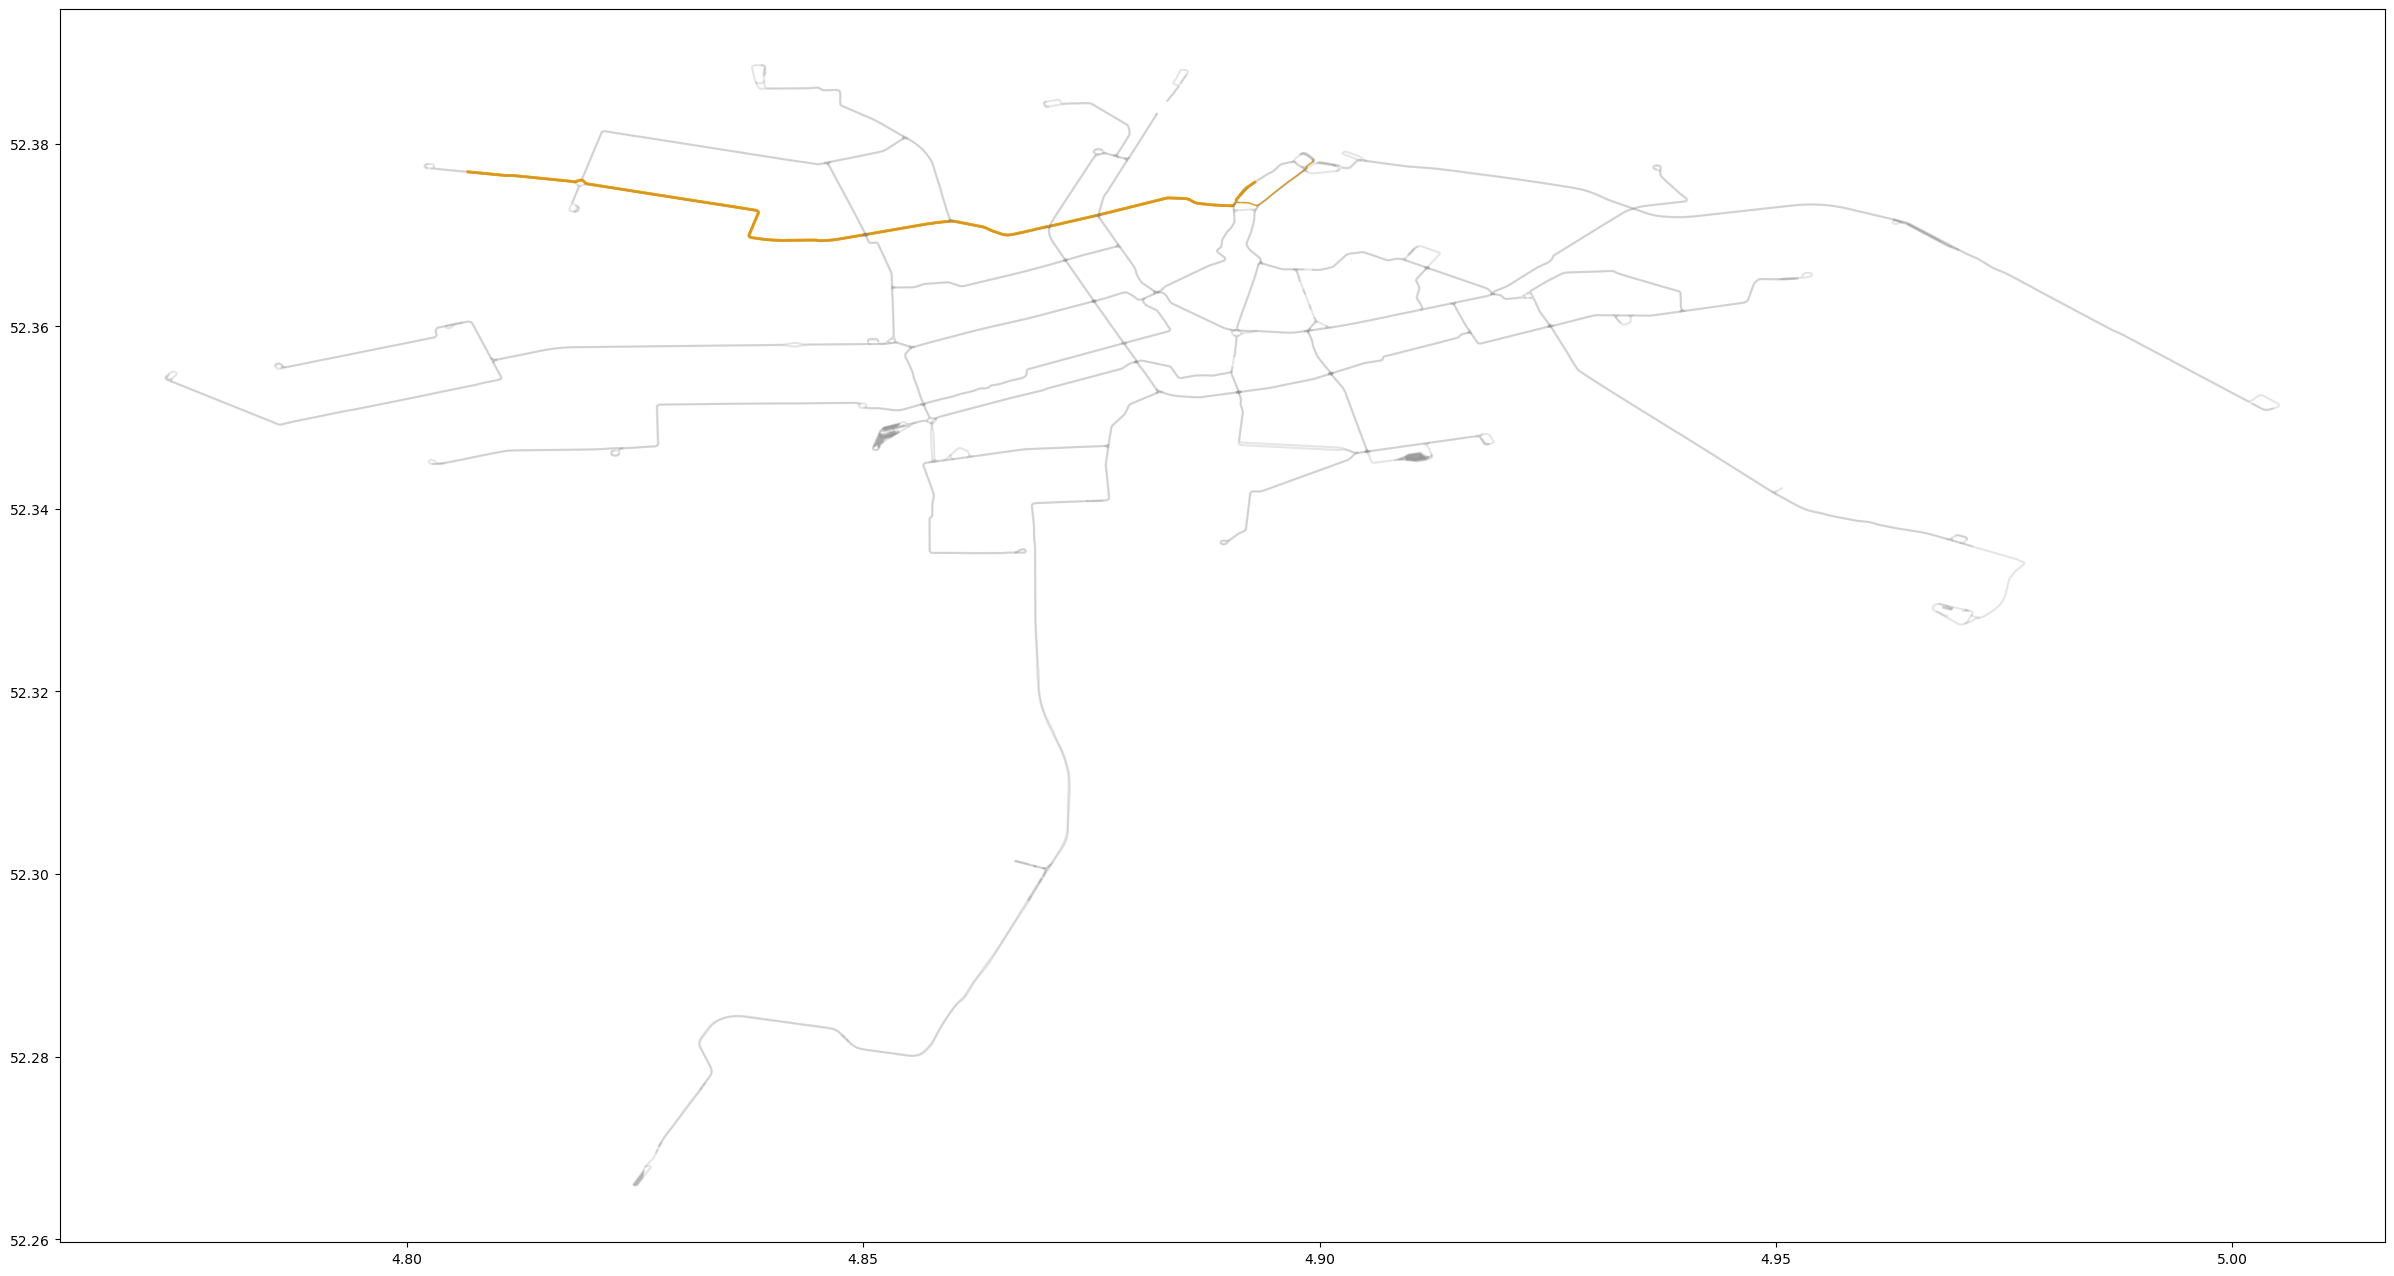

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(30, 20))

gpd.GeoDataFrame(city_tram_new_edges.copy()).plot(ax=ax, color='gray', alpha=0.2)

gpd.GeoDataFrame(shortest_path_edges_way.copy()).plot(ax=ax, zorder=1, linewidth=(shortest_path_edges_way.count_weight), color='orange')

## Test 6: Amsterdam 6 -- s-transfer, e-transfer, s_e has totally same routes

### Change coordinates dictionary of s_e points into two Dataframes of s_e nodes

In [22]:
s_e_coordinates_t3 = {
    's_coordinates_x': 4.872679526320679,
    's_coordinates_y': 52.3408585572296, 
    'e_coordinates_x': 4.870299303894314, 
    'e_coordinates_y': 52.304099852190696
} 

In [23]:
start_node, end_node = s_e_node_df(s_e_coordinates_t3, city_tram_new_nodes)

In [24]:
start_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
295,POINT (4.87318 52.34082),2,200,Station Zuid,4.873185,52.340817,"(4.8731849, 52.3408165)",Tram 25: Amsterdam Station Zuid => Amstelveen ...,tram,"25, 5","25, 5"


In [25]:
end_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
287,POINT (4.87163 52.30279),2,1519,Oranjebaan,4.871633,52.302794,"(4.8716334, 52.3027943)",Tram 25: Amsterdam Station Zuid => Amstelveen ...,tram,"25, 5","25, 5"


### Find the route which the s_e nodes are on----compare with new_edges instead of routes dataframe, should compare with routes dataframe

In [26]:
s_on_route_ref,e_on_route_ref = s_e_on_route_ref(start_node, end_node)

### Make judgement of s_e_on_route_ref

In [27]:
s_on_route_ref, e_on_route_ref = judge_on_route(s_on_route_ref, e_on_route_ref)

s_node and e_node are on several same routes 

The next step is to find the same routes----using function 's_e_same_routes'


### Find those same routes

In [28]:
s_e_same_routes_df = s_e_same_routes(s_on_route_ref,e_on_route_ref)
s_e_same_routes_df

s_node and e_node are on same route/routes:  ref
0  25
1   5



,ref
0,25
1,5


### Get all stations between s_e nodes and transfer nodes

In [29]:
all_stations_on_matched_routes_dfs = all_stations_on_matched_routes(s_e_same_routes_df,city_tram_routes,start_node,end_node,city_tram_order_route_dict)
all_stations_on_matched_routes_dfs

[    id                 name                      geometry     geo_x  \
 0   25             Westwijk  POINT (4.8305377 52.2743532)  4.830538   
 1    7         Sacharovlaan  POINT (4.8323277 52.2821847)  4.832328   
 2    1         Poortwachter  POINT (4.8450525 52.2833338)  4.845053   
 3    2                Brink  POINT (4.8513367 52.2806292)  4.851337   
 4    3                Meent  POINT (4.8569707 52.2808905)  4.856971   
 5   13            Sportlaan    POINT (4.863249 52.289791)  4.863249   
 6    8      Ouderkerkerlaan  POINT (4.8674156 52.2961484)  4.867416   
 7    0           Oranjebaan  POINT (4.8716334 52.3027943)  4.871633   
 8   11             Onderuit  POINT (4.8724478 52.3079604)  4.872448   
 9   15           Zonnestein  POINT (4.8723368 52.3114898)  4.872337   
 10  14           Kronenburg  POINT (4.8706466 52.3156231)  4.870647   
 11   6           Uilenstede  POINT (4.8691021 52.3212764)  4.869102   
 12   5  Van Boshuizenstraat  POINT (4.8689764 52.3248943)  4.86

In [30]:
btw_stations_each_way_list = btw_stations_each_way_list(start_node,end_node,all_stations_on_matched_routes_dfs)
btw_stations_each_way_list

[    id                 name                      geometry     geo_x  \
 15  12         Station Zuid  POINT (4.8731849 52.3408165)  4.873185   
 14   4         Parnassusweg  POINT (4.8686793 52.3382075)  4.868679   
 13  10    A. J. Ernststraat  POINT (4.8688168 52.3325431)  4.868817   
 12   5  Van Boshuizenstraat  POINT (4.8689764 52.3248943)  4.868976   
 11   6           Uilenstede  POINT (4.8691021 52.3212764)  4.869102   
 10  14           Kronenburg  POINT (4.8706466 52.3156231)  4.870647   
 9   15           Zonnestein  POINT (4.8723368 52.3114898)  4.872337   
 8   11             Onderuit  POINT (4.8724478 52.3079604)  4.872448   
 7    0           Oranjebaan  POINT (4.8716334 52.3027943)  4.871633   
 
         geo_y                                    route_name_list ref route  \
 15  52.340817  Tram 25: Amsterdam Station Zuid => Amstelveen ...  25  tram   
 14  52.338208  Tram 25: Amsterdam Station Zuid => Amstelveen ...  25  tram   
 13  52.332543  Tram 25: Amsterdam Statio

### Get all nodes and id_pairs of nodes between s_e nodes

In [31]:
btw_all_id_pairs_list = btw_all_ids_pairs(btw_stations_each_way_list,city_tram_new_nodes)
btw_all_id_pairs_list

[   s_id  e_id
 0  1519  1843
 1  1843  1882
 2  1882  1881
 3  1881   610
 4   610  1560
 5  1560  1841
 6  1841  1543
 7  1543   200,
    s_id  e_id
 0  1519  1843
 1  1843  1882
 2  1882  1881
 3  1881   610
 4   610  1560
 5  1560  1841
 6  1841  1543
 7  1543   200]

### Calculate shortest path and plot

In [32]:
btw_all_id_pairs_list_unique = drop_df_in_list(btw_all_id_pairs_list)

All dataframes in the list are the same


In [33]:
btw_all_id_pairs_list_unique

[   s_id  e_id
 0  1519  1843
 1  1843  1882
 2  1882  1881
 3  1881   610
 4   610  1560
 5  1560  1841
 6  1841  1543
 7  1543   200]

In [34]:
G = create_ground_graph(edges, nodes)

In [35]:
shortest_path_pairs_way = all_shortest_paths(G, btw_all_id_pairs_list_unique[0], edges)

In [36]:
shortest_path_pairs_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
299,27774130,"LINESTRING (4.8719898 52.3034465, 4.8718865 52...",tram,None,299,341,342,47.838035,0.003417,47,"(341, 342)","(342, 341)"
307,28216647,"LINESTRING (4.8717836 52.3030355, 4.8716334 52...",tram,None,307,342,1519,28.722452,0.002052,28,"(342, 1519)","(1519, 342)"
594,181982954,"LINESTRING (4.8724478 52.3079604, 4.8724463 52...",tram,None,594,1843,341,504.622802,0.036044,504,"(1843, 341)","(341, 1843)"
593,181982954,"LINESTRING (4.8723368 52.3114898, 4.8724247 52...",tram,None,593,1882,1843,393.385391,0.028099,393,"(1882, 1843)","(1843, 1882)"
592,181982954,"LINESTRING (4.8706466 52.3156231, 4.8706989 52...",tram,None,592,1881,1882,474.940170,0.033924,474,"(1881, 1882)","(1882, 1881)"
591,181982954,"LINESTRING (4.8691021 52.3212764, 4.8691447 52...",tram,None,591,610,1881,639.937135,0.045710,639,"(610, 1881)","(1881, 610)"
296,27773788,"LINESTRING (4.8689764 52.3248943, 4.8689824 52...",tram,None,296,1560,338,231.281953,0.016520,231,"(1560, 338)","(338, 1560)"
297,27773932,"LINESTRING (4.8690499 52.3228159, 4.869054 52....",tram,None,297,338,339,16.901358,0.001207,16,"(338, 339)","(339, 338)"
298,27773939,"LINESTRING (4.869054 52.322664, 4.8690875 52.3...",tram,None,298,339,340,114.800498,0.008200,114,"(339, 340)","(340, 339)"
300,27810999,"LINESTRING (4.8690875 52.3216323, 4.8690987 52...",tram,None,300,340,343,21.662925,0.001547,21,"(340, 343)","(343, 340)"


In [37]:
duplicate_row_count_way, shortest_path_edges_way, edges_way = edges_with_count_weight(shortest_path_pairs_way, edges)

In [38]:
shortest_path_edges_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight
0,27774130,"LINESTRING (4.8719898 52.3034465, 4.8718865 52...",tram,None,299,341,342,47.838035,0.003417,47,"(341, 342)","(342, 341)",1.0
1,28216647,"LINESTRING (4.8717836 52.3030355, 4.8716334 52...",tram,None,307,342,1519,28.722452,0.002052,28,"(342, 1519)","(1519, 342)",1.0
2,181982954,"LINESTRING (4.8724478 52.3079604, 4.8724463 52...",tram,None,594,1843,341,504.622802,0.036044,504,"(1843, 341)","(341, 1843)",1.0
3,181982954,"LINESTRING (4.8723368 52.3114898, 4.8724247 52...",tram,None,593,1882,1843,393.385391,0.028099,393,"(1882, 1843)","(1843, 1882)",1.0
4,181982954,"LINESTRING (4.8706466 52.3156231, 4.8706989 52...",tram,None,592,1881,1882,474.940170,0.033924,474,"(1881, 1882)","(1882, 1881)",1.0
5,181982954,"LINESTRING (4.8691021 52.3212764, 4.8691447 52...",tram,None,591,610,1881,639.937135,0.045710,639,"(610, 1881)","(1881, 610)",1.0
6,27773788,"LINESTRING (4.8689764 52.3248943, 4.8689824 52...",tram,None,296,1560,338,231.281953,0.016520,231,"(1560, 338)","(338, 1560)",1.0
7,27773932,"LINESTRING (4.8690499 52.3228159, 4.869054 52....",tram,None,297,338,339,16.901358,0.001207,16,"(338, 339)","(339, 338)",1.0
8,27773939,"LINESTRING (4.869054 52.322664, 4.8690875 52.3...",tram,None,298,339,340,114.800498,0.008200,114,"(339, 340)","(340, 339)",1.0
9,27810999,"LINESTRING (4.8690875 52.3216323, 4.8690987 52...",tram,None,300,340,343,21.662925,0.001547,21,"(340, 343)","(343, 340)",1.0


In [39]:
shortest_path_edges_way.time.sum()

0.3253916551361544

<Axes: >

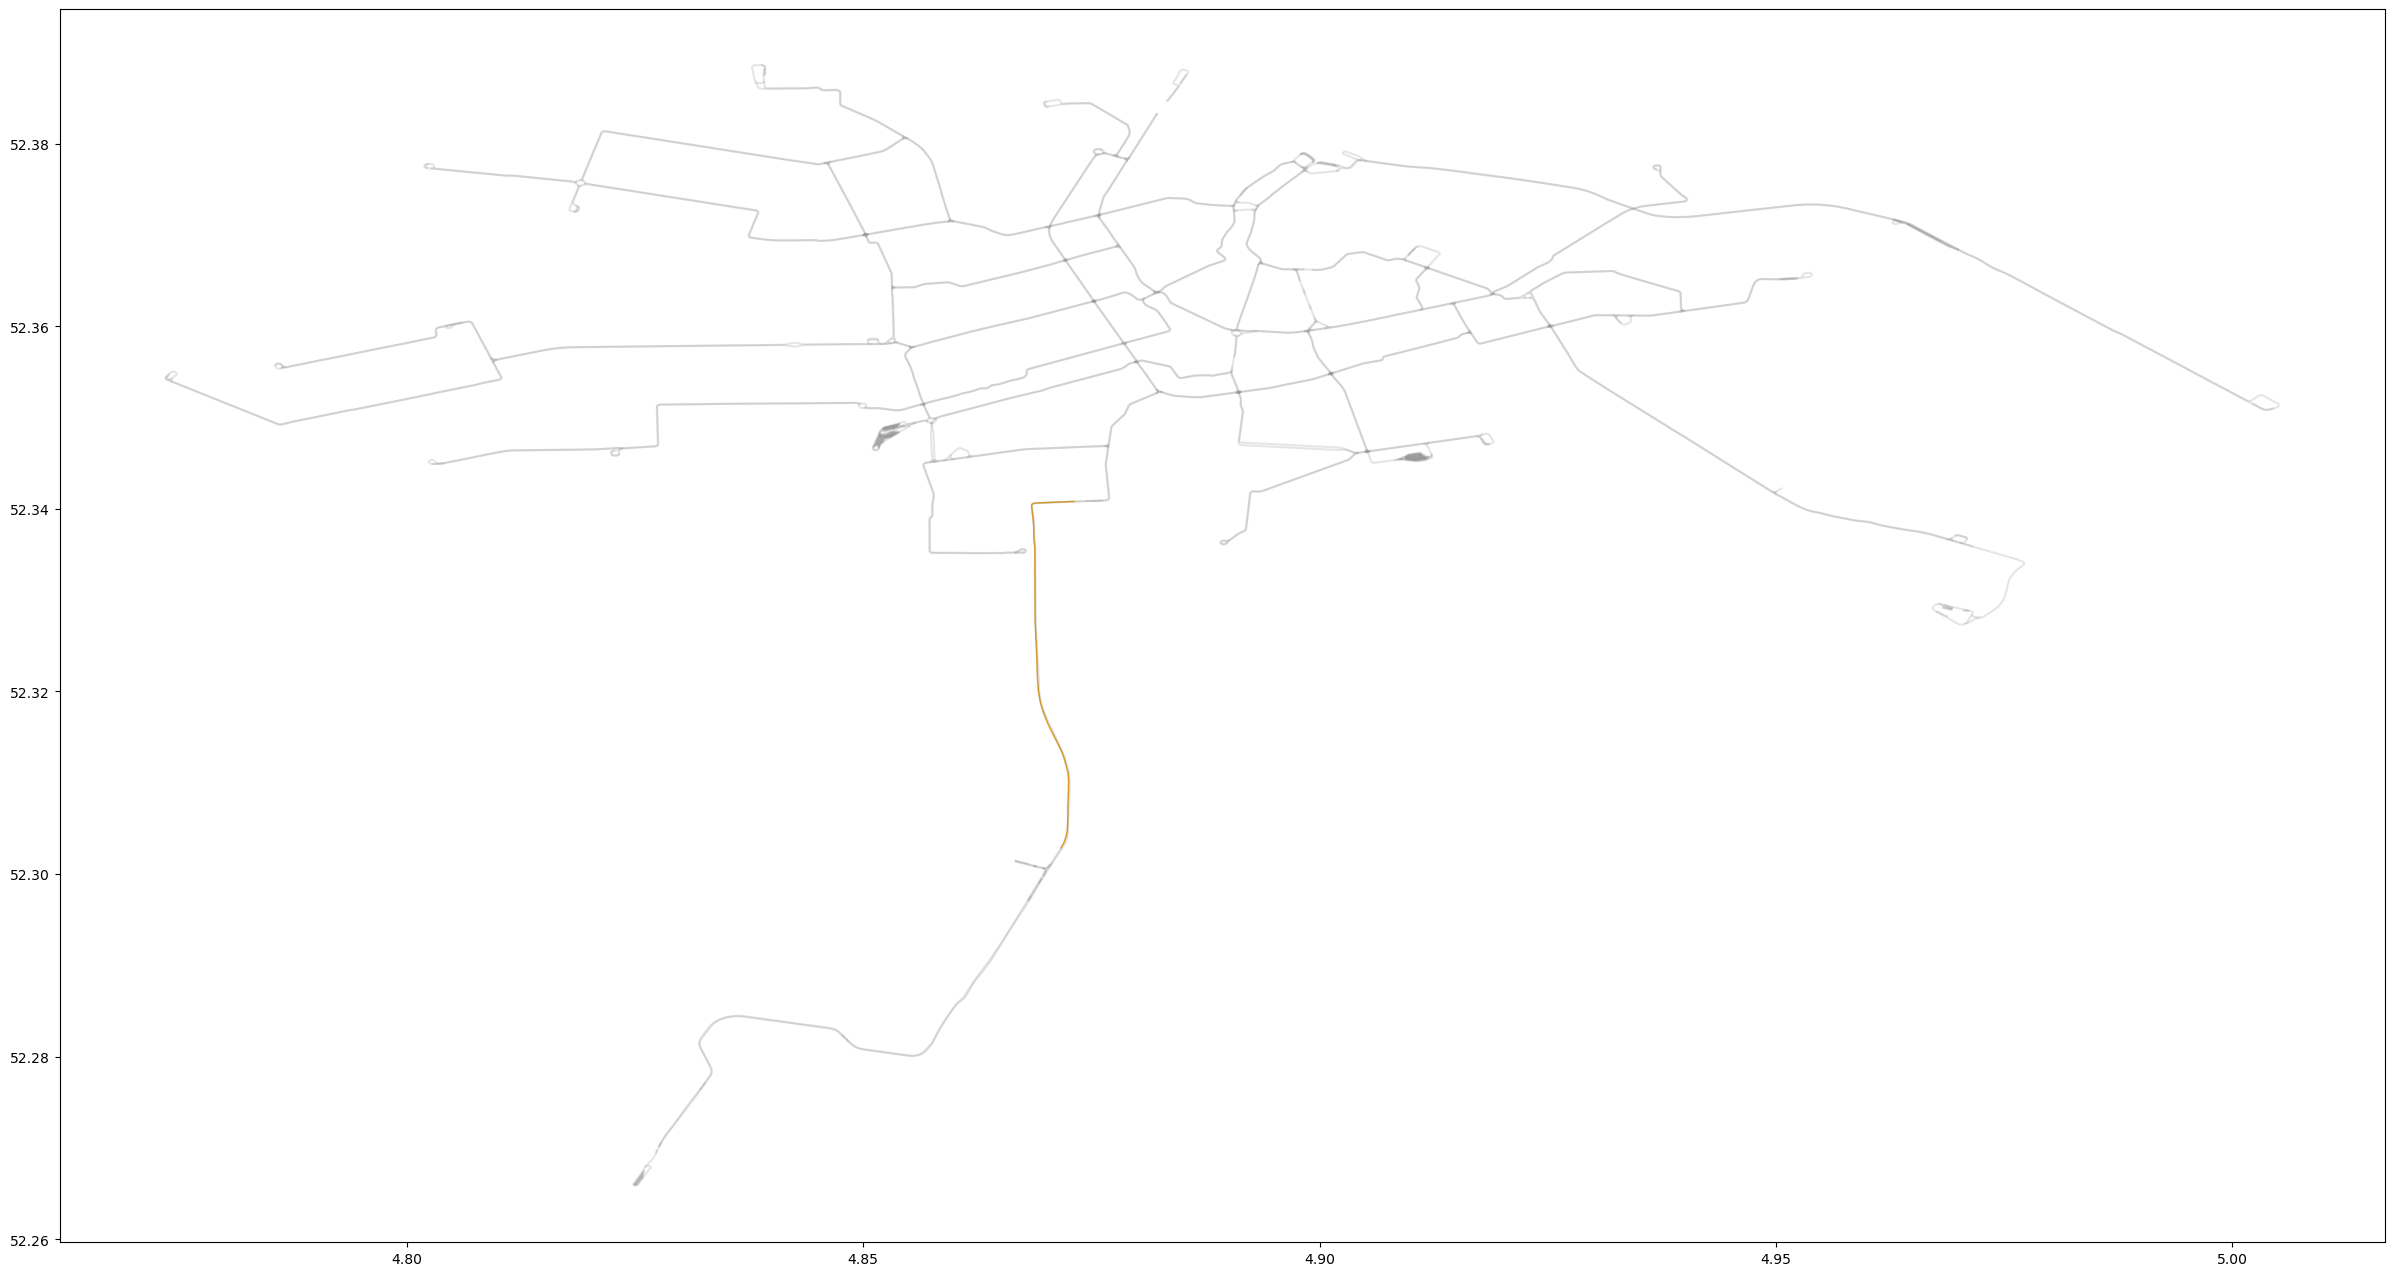

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(30, 20))

gpd.GeoDataFrame(city_tram_new_edges.copy()).plot(ax=ax, color='gray', alpha=0.2)

gpd.GeoDataFrame(shortest_path_edges_way.copy()).plot(ax=ax, zorder=1, linewidth=(shortest_path_edges_way.count_weight), color='orange')

## Test 5: Amsterdam 5 -- s-transfer, e-transfer, s_e has partially same routes

### Change coordinates dictionary of s_e points into two Dataframes of s_e nodes

In [22]:
s_e_coordinates_t3 = {
    's_coordinates_x': 4.877178919758245,
    's_coordinates_y': 52.36927745355788, 
    'e_coordinates_x': 4.908685188573216, 
    'e_coordinates_y': 52.361043896315444
} 

In [23]:
start_node, end_node = s_e_node_df(s_e_coordinates_t3, city_tram_new_nodes)

In [24]:
start_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
164,POINT (4.87756 52.36953),2,1653,Elandsgracht,4.877558,52.369527,"(4.8775579, 52.3695272)",Tram 17: Amsterdam Osdorp Dijkgraafsplein => A...,tram,"17, 19, 5, 7","17, 19, 5, 7"


In [25]:
end_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
30,POINT (4.90916 52.36140),2,1581,Weesperplein,4.909158,52.361404,"(4.9091584, 52.3614042)",Tram 1: Amsterdam Osdorp de Aker => Amsterdam ...,tram,"1, 19, 7","1, 19, 7"


### Find the route which the s_e nodes are on----compare with new_edges instead of routes dataframe, should compare with routes dataframe

In [26]:
s_on_route_ref,e_on_route_ref = s_e_on_route_ref(start_node, end_node)

### Make judgement of s_e_on_route_ref

In [27]:
s_on_route_ref, e_on_route_ref = judge_on_route(s_on_route_ref, e_on_route_ref)

Some of e_on_route is the same as some of s_on_route 

The next step is to find the same routes----using function 's_e_same_routes'


### Find those same routes

In [28]:
s_e_same_routes_df = s_e_same_routes(s_on_route_ref,e_on_route_ref)
s_e_same_routes_df

s_node and e_node are on same route/routes:  ref
1  19
3   7



,ref
1,19
3,7


### Get all stations between s_e nodes and transfer nodes

In [29]:
all_stations_on_matched_routes_dfs = all_stations_on_matched_routes(s_e_same_routes_df,city_tram_routes,start_node,end_node,city_tram_order_route_dict)
all_stations_on_matched_routes_dfs

[    id                       name                      geometry     geo_x  \
 0   52                      Sniep  POINT (4.9697229 52.3364299)  4.969723   
 1   26                 Diemerbrug  POINT (4.9613021 52.3382375)  4.961302   
 2   13         Arent Krijtsstraat    POINT (4.9546574 52.33957)  4.954657   
 3   44                Brinkstraat  POINT (4.9478959 52.3428971)  4.947896   
 4    3                  Kruislaan  POINT (4.9398853 52.3479273)  4.939885   
 5   43          Hugo de Vrieslaan    POINT (4.934801 52.351066)  4.934801   
 6   27                    Hogeweg  POINT (4.9310414 52.3534088)  4.931041   
 7   12                  Oostpoort  POINT (4.9269018 52.3574383)  4.926902   
 8   11          Wijttenbachstraat   POINT (4.9250867 52.360259)  4.925087   
 9   10   Eerste Van Swindenstraat  POINT (4.9238286 52.3621936)  4.923829   
 10   9             Alexanderplein  POINT (4.9196097 52.3634343)   4.91961   
 11  28  Korte 's-Gravesandestraat  POINT (4.9141489 52.3624363)

In [30]:
btw_stations_each_way_list = btw_stations_each_way_list(start_node,end_node,all_stations_on_matched_routes_dfs)
btw_stations_each_way_list

[    id            name                      geometry     geo_x      geo_y  \
 17   4    Elandsgracht  POINT (4.8784804 52.3681689)   4.87848  52.368169   
 16   5     Leidseplein  POINT (4.8830722 52.3634714)  4.883072  52.363471   
 15  21     Rijksmuseum  POINT (4.8873395 52.3608307)   4.88734  52.360831   
 14  25    Vijzelgracht  POINT (4.8925358 52.3594772)  4.892536  52.359477   
 13  24  Frederiksplein  POINT (4.9000102 52.3596835)   4.90001  52.359684   
 12   0    Weesperplein  POINT (4.9091584 52.3614042)  4.909158  52.361404   
 
                                   route_name_list ref route  \
 17  Tram 19: Amsterdam Sloterdijk => Diemen Sniep  19  tram   
 16  Tram 19: Amsterdam Sloterdijk => Diemen Sniep  19  tram   
 15  Tram 19: Amsterdam Sloterdijk => Diemen Sniep  19  tram   
 14  Tram 19: Amsterdam Sloterdijk => Diemen Sniep  19  tram   
 13  Tram 19: Amsterdam Sloterdijk => Diemen Sniep  19  tram   
 12  Tram 19: Amsterdam Sloterdijk => Diemen Sniep  19  tram   
 
  

### Get all nodes and id_pairs of nodes between s_e nodes

In [31]:
btw_all_id_pairs_list = btw_all_ids_pairs(btw_stations_each_way_list,city_tram_new_nodes)
btw_all_id_pairs_list

[   s_id  e_id
 0  1581  1340
 1  1340  1874
 2  1874  1806
 3  1806  1696
 4  1696  1664,
    s_id  e_id
 0  1581  1340
 1  1340  1874
 2  1874  1806
 3  1806  1696
 4  1696  1664]

### Calculate shortest path and plot

In [32]:
btw_all_id_pairs_list_unique = drop_df_in_list(btw_all_id_pairs_list)

All dataframes in the list are the same


In [33]:
btw_all_id_pairs_list_unique

[   s_id  e_id
 0  1581  1340
 1  1340  1874
 2  1874  1806
 3  1806  1696
 4  1696  1664]

In [34]:
G = create_ground_graph(edges, nodes)

In [35]:
shortest_path_pairs_way = all_shortest_paths(G, btw_all_id_pairs_list_unique[0], edges)

In [36]:
shortest_path_pairs_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
312,29272593,"LINESTRING (4.9034372 52.36024, 4.9045977 52.3...",tram,None,312,351,352,82.839311,0.005917,82,"(351, 352)","(352, 351)"
1196,379148752,"LINESTRING (4.9045977 52.3604628, 4.9047048 52...",tram,None,1196,352,1581,327.843533,0.023417,327,"(352, 1581)","(1581, 352)"
1503,611803438,"LINESTRING (4.9005646 52.3597612, 4.9006313 52...",tram,None,1503,888,351,202.832037,0.014488,202,"(888, 351)","(351, 888)"
2051,813274520,"LINESTRING (4.9000102 52.3596835, 4.9005646 52...",tram,None,2051,1340,888,38.738587,0.002767,38,"(1340, 888)","(888, 1340)"
1504,611803444,"LINESTRING (4.8982924 52.3594477, 4.8983995 52...",tram,None,1504,508,1252,50.793155,0.003628,50,"(508, 1252)","(1252, 508)"
1505,611803444,"LINESTRING (4.8990199 52.3595478, 4.8991102 52...",tram,None,1505,1252,1249,17.951799,0.001282,17,"(1252, 1249)","(1249, 1252)"
1518,611884640,"LINESTRING (4.8925358 52.3594772, 4.8926793 52...",tram,None,1518,1874,1248,45.740187,0.003267,45,"(1874, 1248)","(1248, 1874)"
1836,770403863,"LINESTRING (4.8992767 52.3595841, 4.9000102 52...",tram,None,1836,1249,1340,51.170148,0.003655,51,"(1249, 1340)","(1340, 1249)"
1837,770403864,"LINESTRING (4.8932064 52.3594732, 4.8962177 52...",tram,None,1837,1248,508,348.915130,0.024923,348,"(1248, 508)","(508, 1248)"
240,27080498,"LINESTRING (4.8881562 52.360444, 4.889257 52.3...",tram,None,240,291,44,166.265530,0.011876,166,"(291, 44)","(44, 291)"


In [37]:
duplicate_row_count_way, shortest_path_edges_way, edges_way = edges_with_count_weight(shortest_path_pairs_way, edges)

In [38]:
shortest_path_edges_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight
0,29272593,"LINESTRING (4.9034372 52.36024, 4.9045977 52.3...",tram,None,312,351,352,82.839311,0.005917,82,"(351, 352)","(352, 351)",1.0
1,379148752,"LINESTRING (4.9045977 52.3604628, 4.9047048 52...",tram,None,1196,352,1581,327.843533,0.023417,327,"(352, 1581)","(1581, 352)",1.0
2,611803438,"LINESTRING (4.9005646 52.3597612, 4.9006313 52...",tram,None,1503,888,351,202.832037,0.014488,202,"(888, 351)","(351, 888)",1.0
3,813274520,"LINESTRING (4.9000102 52.3596835, 4.9005646 52...",tram,None,2051,1340,888,38.738587,0.002767,38,"(1340, 888)","(888, 1340)",1.0
4,611803444,"LINESTRING (4.8982924 52.3594477, 4.8983995 52...",tram,None,1504,508,1252,50.793155,0.003628,50,"(508, 1252)","(1252, 508)",1.0
5,611803444,"LINESTRING (4.8990199 52.3595478, 4.8991102 52...",tram,None,1505,1252,1249,17.951799,0.001282,17,"(1252, 1249)","(1249, 1252)",1.0
6,611884640,"LINESTRING (4.8925358 52.3594772, 4.8926793 52...",tram,None,1518,1874,1248,45.740187,0.003267,45,"(1874, 1248)","(1248, 1874)",1.0
7,770403863,"LINESTRING (4.8992767 52.3595841, 4.9000102 52...",tram,None,1836,1249,1340,51.170148,0.003655,51,"(1249, 1340)","(1340, 1249)",1.0
8,770403864,"LINESTRING (4.8932064 52.3594732, 4.8962177 52...",tram,None,1837,1248,508,348.915130,0.024923,348,"(1248, 508)","(508, 1248)",1.0
9,27080498,"LINESTRING (4.8881562 52.360444, 4.889257 52.3...",tram,None,240,291,44,166.265530,0.011876,166,"(291, 44)","(44, 291)",1.0


In [39]:
shortest_path_edges_way.time.sum()

0.18766799872369722

<Axes: >

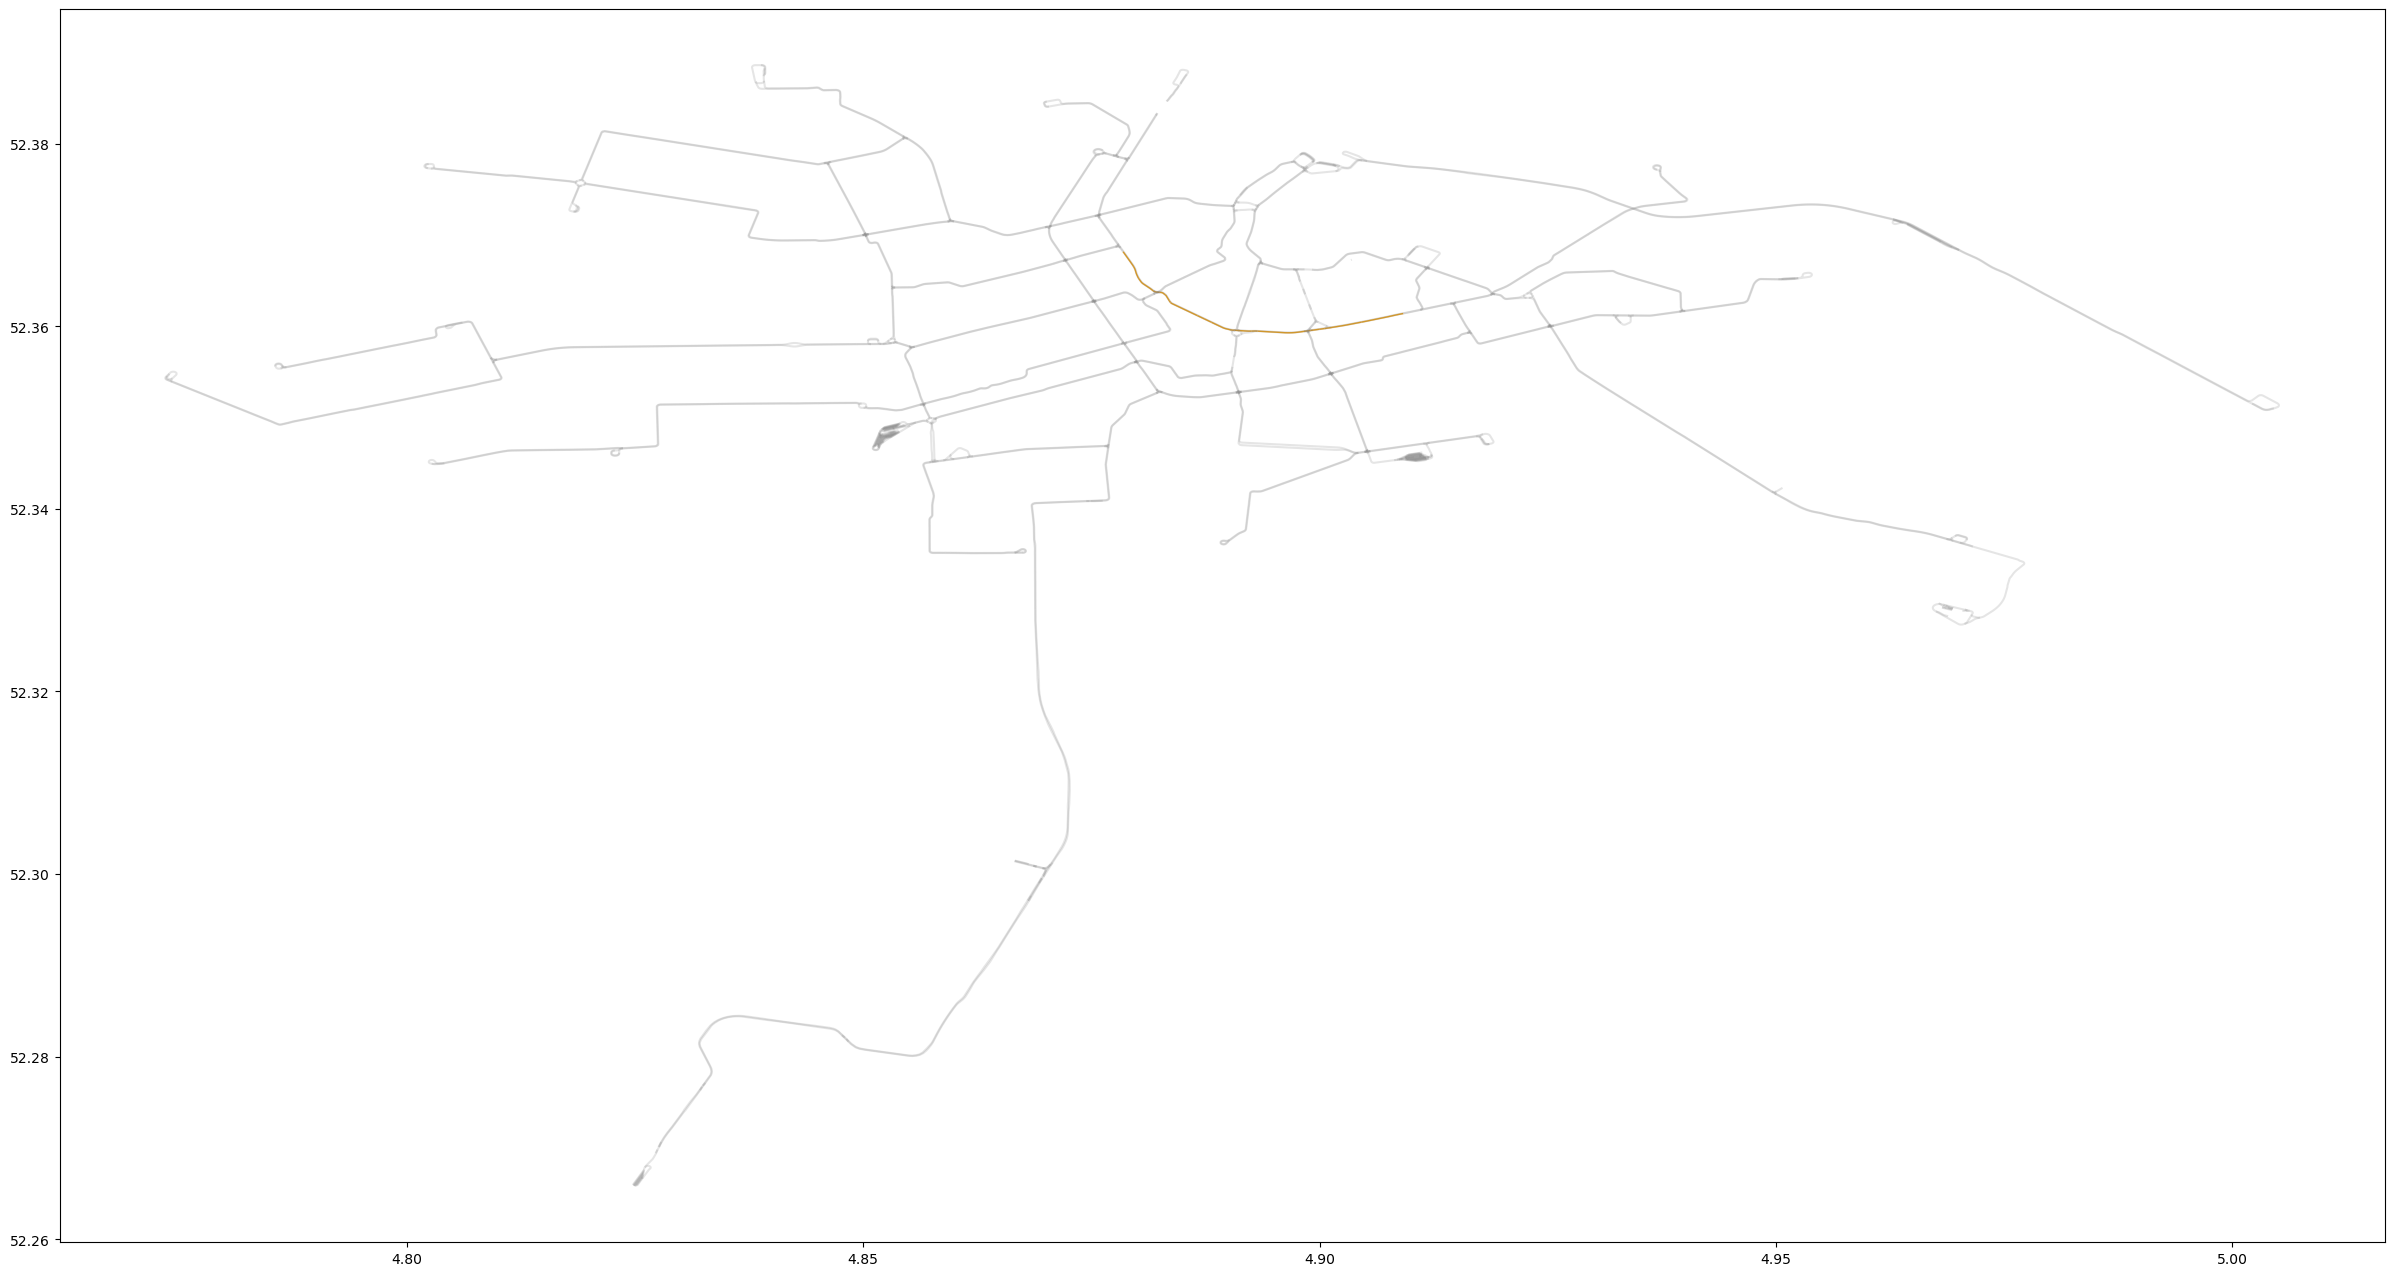

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(30, 20))

gpd.GeoDataFrame(city_tram_new_edges.copy()).plot(ax=ax, color='gray', alpha=0.2)

gpd.GeoDataFrame(shortest_path_edges_way.copy()).plot(ax=ax, zorder=1, linewidth=(shortest_path_edges_way.count_weight), color='orange')

## Test 4: Amsterdam 4 -- s-transfer, e-no transfer, s_e has one same route

### Change coordinates dictionary of s_e points into two Dataframes of s_e nodes

In [22]:
s_e_coordinates_t3 = {
    's_coordinates_x': 4.908694409536675,
    's_coordinates_y': 52.36103118769003 , 
    'e_coordinates_x':  4.774425370057379, 
    'e_coordinates_y': 52.353679369990765
} 

In [23]:
start_node, end_node = s_e_node_df(s_e_coordinates_t3, city_tram_new_nodes)

In [24]:
start_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
30,POINT (4.90916 52.36140),2,1581,Weesperplein,4.909158,52.361404,"(4.9091584, 52.3614042)",Tram 1: Amsterdam Osdorp de Aker => Amsterdam ...,tram,"1, 19, 7","1, 19, 7"


In [25]:
end_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
0,POINT (4.77450 52.35387),2,847,Matterhorn,4.774504,52.353869,"(4.7745043, 52.3538687)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,1,None


### Find the route which the s_e nodes are on----compare with new_edges instead of routes dataframe, should compare with routes dataframe

In [26]:
s_on_route_ref,e_on_route_ref = s_e_on_route_ref(start_node, end_node)

### Make judgement of s_e_on_route_ref

In [27]:
s_on_route_ref, e_on_route_ref = judge_on_route(s_on_route_ref, e_on_route_ref)

One of s_on_route is the same as e_on_route 

The next step is to find the same routes----using function 's_e_same_routes'


### Find those same routes

In [28]:
s_e_same_routes_df = s_e_same_routes(s_on_route_ref,e_on_route_ref)
s_e_same_routes_df

s_node and e_node are on same route/routes:  ref
0   1



,ref
0,1


### Get all stations between s_e nodes and transfer nodes

In [29]:
all_stations_on_matched_routes_dfs = all_stations_on_matched_routes(s_e_same_routes_df,city_tram_routes,start_node,end_node,city_tram_order_route_dict)
all_stations_on_matched_routes_dfs

[    id                              name                      geometry  \
 0   42                        Matterhorn  POINT (4.7745043 52.3538687)   
 1    8                           Pilatus   POINT (4.7770976 52.352828)   
 2    9                       Inaristraat  POINT (4.7836582 52.3501979)   
 3   39                          Ecuplein  POINT (4.7881565 52.3496994)   
 4   38                   Baden Powellweg  POINT (4.7944986 52.3509515)   
 5   36                          Hoekenes  POINT (4.8018381 52.3524376)   
 6   41                Louis Davidsstraat  POINT (4.8084929 52.3538423)   
 7   19                     Meer en Vaart    POINT (4.8099119 52.35637)   
 8   40                Johan Huizingalaan  POINT (4.8258953 52.3578123)   
 9   20                  Station Lelylaan  POINT (4.8337835 52.3579004)   
 10  12                 Derkinderenstraat  POINT (4.8397482 52.3579573)   
 11   2                     Surinameplein  POINT (4.8509943 52.3580728)   
 12  10              Rhij

In [30]:
btw_stations_each_way_list = btw_stations_each_way_list(start_node,end_node,all_stations_on_matched_routes_dfs)
btw_stations_each_way_list

[    id                              name                      geometry  \
 19   3                      Weesperplein  POINT (4.9071213 52.3610021)   
 18  22                    Frederiksplein  POINT (4.8978483 52.3594109)   
 17   5                      Vijzelgracht  POINT (4.8921024 52.3595051)   
 16   1                       Rijksmuseum   POINT (4.887104 52.3609734)   
 15  23                       Leidseplein  POINT (4.8810698 52.3632085)   
 14  13  Eerste Constantijn Huygensstraat  POINT (4.8747145 52.3626163)   
 13  24            Jan Pieter Heijestraat   POINT (4.8657924 52.360364)   
 12  10              Rhijnvis Feithstraat  POINT (4.8603541 52.3590503)   
 11   2                     Surinameplein  POINT (4.8509943 52.3580728)   
 10  12                 Derkinderenstraat  POINT (4.8397482 52.3579573)   
 9   20                  Station Lelylaan  POINT (4.8337835 52.3579004)   
 8   40                Johan Huizingalaan  POINT (4.8258953 52.3578123)   
 7   19                  

### Get all nodes and id_pairs of nodes between s_e nodes

In [31]:
btw_all_id_pairs_list = btw_all_ids_pairs(btw_stations_each_way_list,city_tram_new_nodes)
btw_all_id_pairs_list

[    s_id  e_id
 0    847  1615
 1   1615  1616
 2   1616  1777
 3   1777  1776
 4   1776  1686
 5   1686  1783
 6   1783  1784
 7   1784  1780
 8   1780  1786
 9   1786  1687
 10  1687  1536
 11  1536  1628
 12  1628  1891
 13  1891  1690
 14  1690  1871
 15  1871  1514
 16  1514  1599
 17  1599  1254
 18  1254  1580]

### Calculate shortest path and plot

In [32]:
btw_all_id_pairs_list_unique = drop_df_in_list(btw_all_id_pairs_list)

All dataframes in the list are the same


In [33]:
btw_all_id_pairs_list_unique

[    s_id  e_id
 0    847  1615
 1   1615  1616
 2   1616  1777
 3   1777  1776
 4   1776  1686
 5   1686  1783
 6   1783  1784
 7   1784  1780
 8   1780  1786
 9   1786  1687
 10  1687  1536
 11  1536  1628
 12  1628  1891
 13  1891  1690
 14  1690  1871
 15  1871  1514
 16  1514  1599
 17  1599  1254
 18  1254  1580]

In [34]:
G = create_ground_graph(edges, nodes)

In [35]:
shortest_path_pairs_way = all_shortest_paths(G, btw_all_id_pairs_list_unique[0], edges)

In [36]:
shortest_path_pairs_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
862,322841927,"LINESTRING (4.7770976 52.352828, 4.7768625 52....",tram,None,862,1615,847,211.216649,0.015087,211,"(1615, 847)","(847, 1615)"
861,322841927,"LINESTRING (4.7836582 52.3501979, 4.7833776 52...",tram,None,861,1616,1615,534.194272,0.038157,534,"(1616, 1615)","(1615, 1616)"
145,26594761,"LINESTRING (4.785218 52.3495798, 4.7849725 52....",tram,None,145,189,190,19.922393,0.001423,19,"(189, 190)","(190, 189)"
836,322841907,"LINESTRING (4.7881565 52.3496994, 4.7880725 52...",tram,None,836,1777,189,219.740519,0.015696,219,"(1777, 189)","(189, 1777)"
860,322841927,"LINESTRING (4.7849725 52.3496771, 4.7836582 52...",tram,None,860,190,1616,106.649119,0.007618,106,"(190, 1616)","(1616, 190)"
...,...,...,...,...,...,...,...,...,...,...,...,...
1499,611696264,"LINESTRING (4.9071213 52.3610021, 4.9064489 52...",tram,None,1499,1580,524,181.999951,0.013000,181,"(1580, 524)","(524, 1580)"
1500,611696265,"LINESTRING (4.9033075 52.3602416, 4.9031395 52...",tram,None,1500,641,902,143.413320,0.010244,143,"(641, 902)","(902, 641)"
1817,759979466,"LINESTRING (4.8985364 52.3595071, 4.8984184 52...",tram,None,1817,995,47,15.921247,0.001137,15,"(995, 47)","(47, 995)"
1835,770403859,"LINESTRING (4.9012799 52.359895, 4.9012135 52....",tram,None,1835,902,994,149.522724,0.010680,149,"(902, 994)","(994, 902)"


In [37]:
duplicate_row_count_way, shortest_path_edges_way, edges_way = edges_with_count_weight(shortest_path_pairs_way, edges)

In [38]:
shortest_path_edges_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight
0,322841927,"LINESTRING (4.7770976 52.352828, 4.7768625 52....",tram,None,862,1615,847,211.216649,0.015087,211,"(1615, 847)","(847, 1615)",1.0
1,322841927,"LINESTRING (4.7836582 52.3501979, 4.7833776 52...",tram,None,861,1616,1615,534.194272,0.038157,534,"(1616, 1615)","(1615, 1616)",1.0
2,26594761,"LINESTRING (4.785218 52.3495798, 4.7849725 52....",tram,None,145,189,190,19.922393,0.001423,19,"(189, 190)","(190, 189)",1.0
3,322841907,"LINESTRING (4.7881565 52.3496994, 4.7880725 52...",tram,None,836,1777,189,219.740519,0.015696,219,"(1777, 189)","(189, 1777)",1.0
4,322841927,"LINESTRING (4.7849725 52.3496771, 4.7836582 52...",tram,None,860,190,1616,106.649119,0.007618,106,"(190, 1616)","(1616, 190)",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,611696264,"LINESTRING (4.9071213 52.3610021, 4.9064489 52...",tram,None,1499,1580,524,181.999951,0.013000,181,"(1580, 524)","(524, 1580)",1.0
72,611696265,"LINESTRING (4.9033075 52.3602416, 4.9031395 52...",tram,None,1500,641,902,143.413320,0.010244,143,"(641, 902)","(902, 641)",1.0
73,759979466,"LINESTRING (4.8985364 52.3595071, 4.8984184 52...",tram,None,1817,995,47,15.921247,0.001137,15,"(995, 47)","(47, 995)",1.0
74,770403859,"LINESTRING (4.9012799 52.359895, 4.9012135 52....",tram,None,1835,902,994,149.522724,0.010680,149,"(902, 994)","(994, 902)",1.0


In [39]:
shortest_path_edges_way.time.sum()

0.7156568295179021

<Axes: >

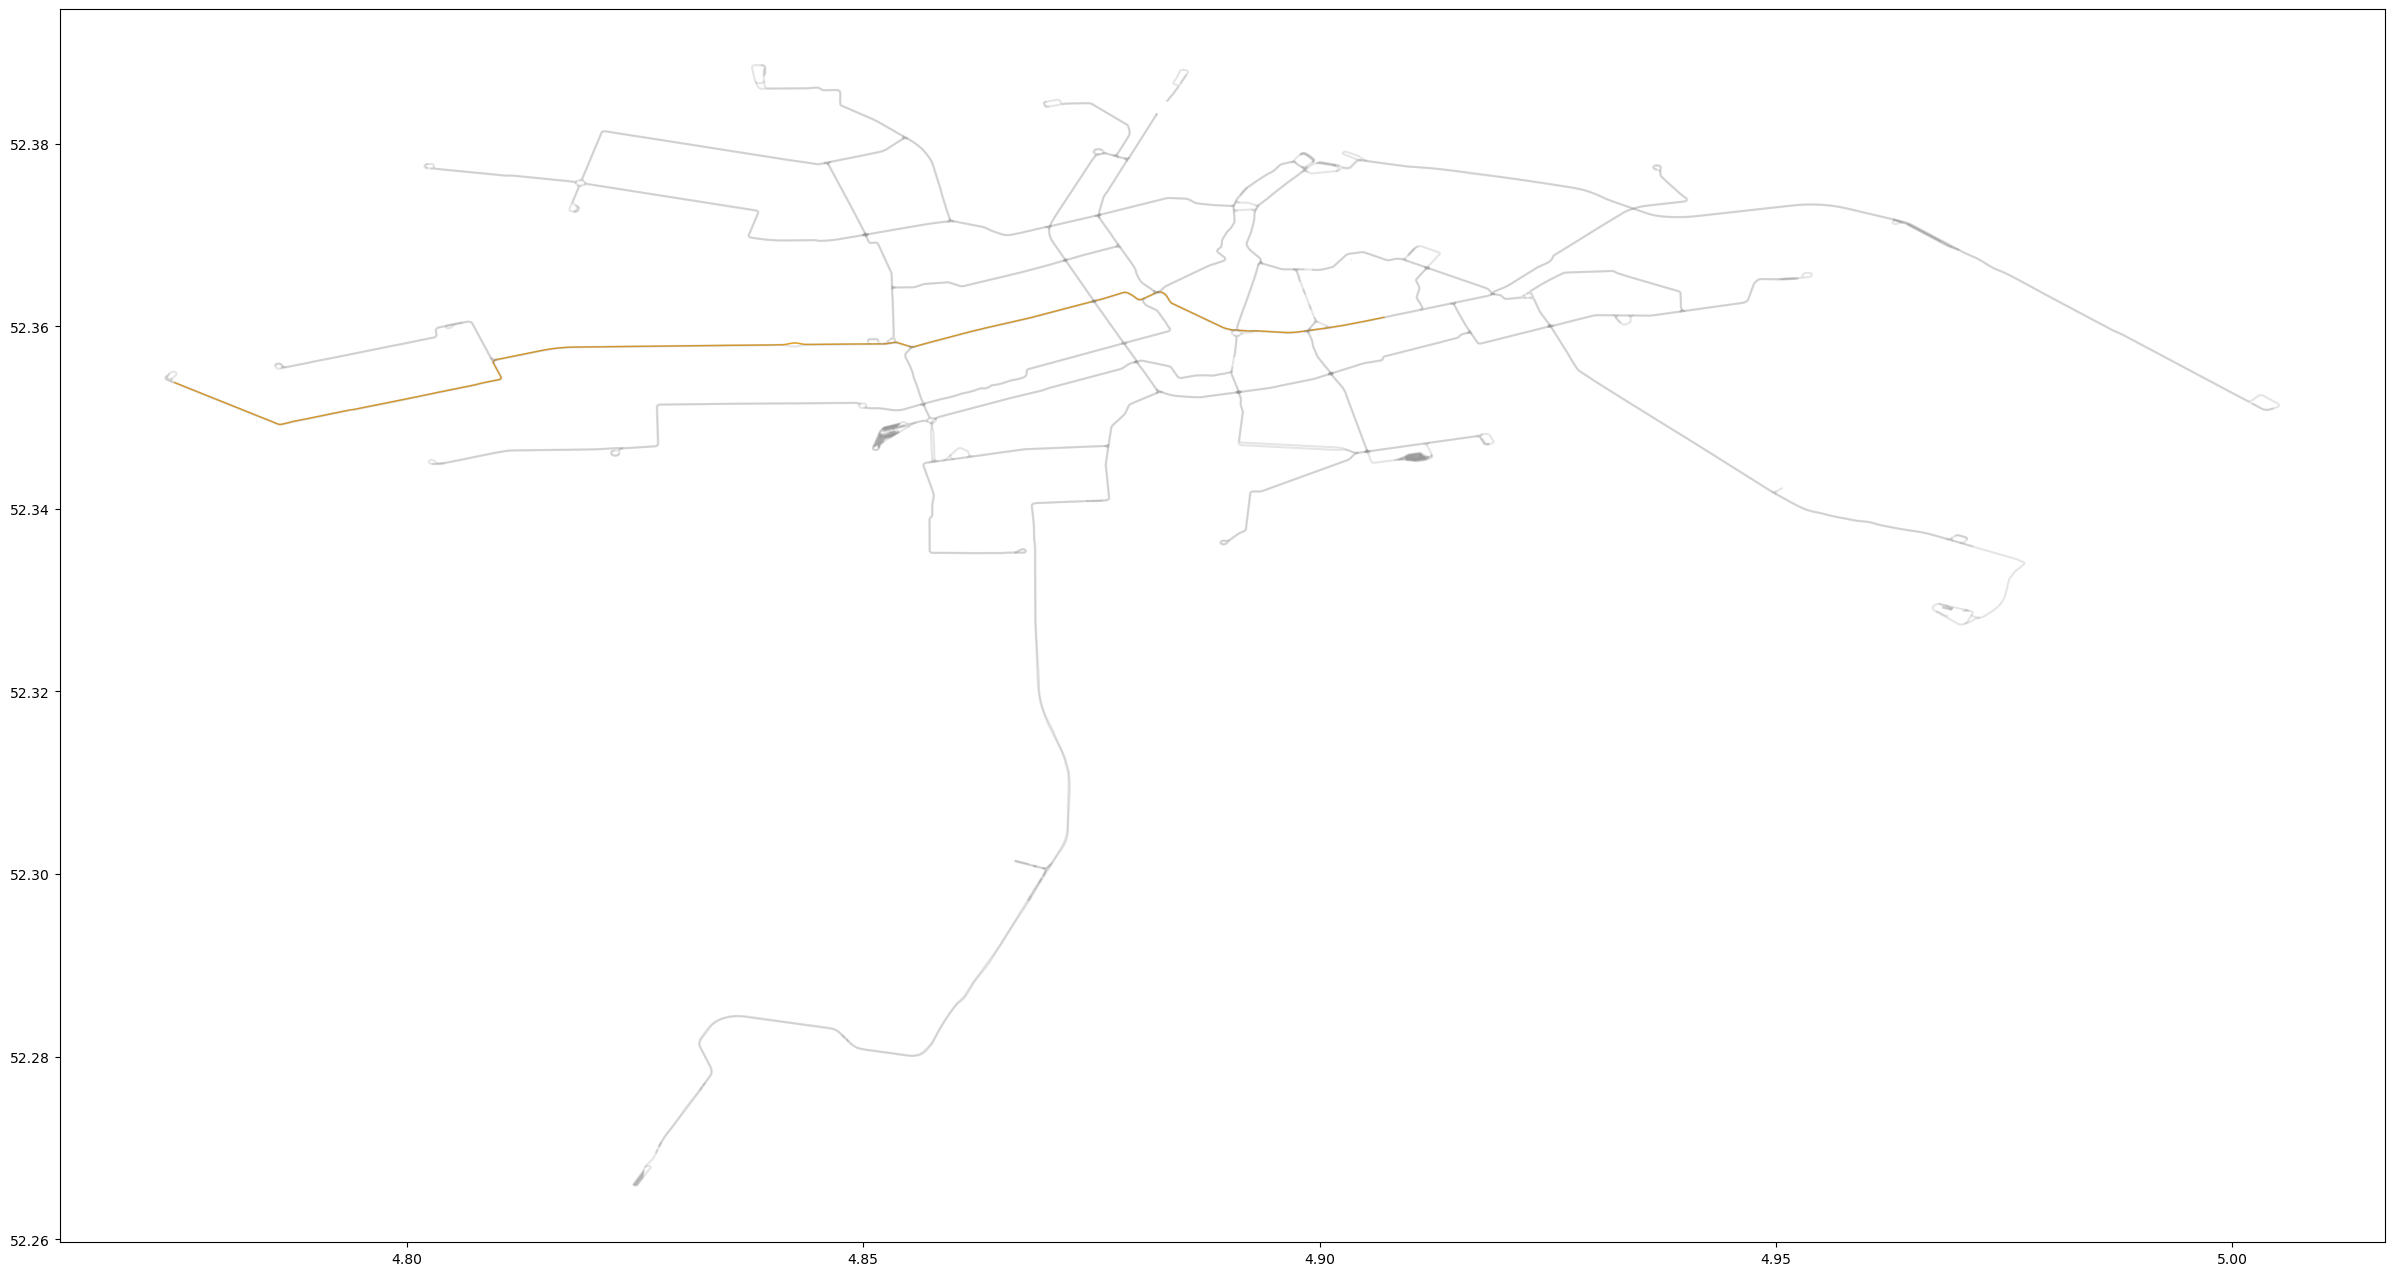

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(30, 20))

gpd.GeoDataFrame(city_tram_new_edges.copy()).plot(ax=ax, color='gray', alpha=0.2)

gpd.GeoDataFrame(shortest_path_edges_way.copy()).plot(ax=ax, zorder=1, linewidth=(shortest_path_edges_way.count_weight), color='orange')

## Test 3: Amsterdam 3 -- s-transfer, e-no transfer, s_e has one same route ---  line7 exists some questions

### Change coordinates dictionary of s_e points into two Dataframes of s_e nodes

In [22]:
s_e_coordinates_t3 = {
    's_coordinates_x': 4.9069005233527205, 
    's_coordinates_y': 52.361168925103094, 
    'e_coordinates_x':  4.819591062917035, 
    'e_coordinates_y': 52.37340576910413
} 

In [23]:
start_node, end_node = s_e_node_df(s_e_coordinates_t3, city_tram_new_nodes)

In [24]:
start_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
19,POINT (4.90712 52.36100),2,1580,Weesperplein,4.907121,52.361002,"(4.9071213, 52.3610021)",Tram 1: Amsterdam Muiderpoortstation =>Amsterd...,tram,"1, 19, 7","1, 19, 7"


In [25]:
end_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
383,POINT (4.81860 52.37284),2,222,Sloterpark,4.818602,52.372845,"(4.8186019, 52.3728449)",Tram 7: Amsterdam Azartplein => Amsterdam Slot...,tram,7,None


### Find the route which the s_e nodes are on----compare with new_edges instead of routes dataframe, should compare with routes dataframe

In [26]:
s_on_route_ref,e_on_route_ref = s_e_on_route_ref(start_node, end_node)

### Make judgement of s_e_on_route_ref

In [27]:
s_on_route_ref, e_on_route_ref = judge_on_route(s_on_route_ref, e_on_route_ref)

One of s_on_route is the same as e_on_route 

The next step is to find the same routes----using function 's_e_same_routes'


In [28]:
s_on_route_ref

,ref
0,1
1,19
2,7


In [29]:
e_on_route_ref

,ref
0,7


### Find those same routes

In [30]:
s_e_same_routes_df = s_e_same_routes(s_on_route_ref,e_on_route_ref)
s_e_same_routes_df

s_node and e_node are on same route/routes:  ref
2   7



,ref
2,7


### Get all stations between s_e nodes and transfer nodes

In [31]:
all_stations_on_matched_routes_dfs = all_stations_on_matched_routes(s_e_same_routes_df,city_tram_routes,start_node,end_node,city_tram_order_route_dict)
all_stations_on_matched_routes_dfs

[    id                       name                      geometry     geo_x  \
 0   47                 Sloterpark  POINT (4.8186019 52.3728449)  4.818602   
 1   10   Burgemeester Roëllstraat  POINT (4.8187509 52.3750672)  4.818751   
 2   43              Plein '40-'45  POINT (4.8211591 52.3808373)  4.821159   
 3   45   Burgemeester Eliasstraat    POINT (4.8258104 52.38075)   4.82581   
 4   13    Burgemeester Fockstraat  POINT (4.8312794 52.3798913)  4.831279   
 5   15  Burgemeester de Vlugtlaan   POINT (4.8372054 52.378963)  4.837205   
 6   41         Bos en Lommerplein  POINT (4.8449335 52.3777823)  4.844933   
 7   55              Erasmusgracht  POINT (4.8469734 52.3763312)  4.846973   
 8   11        Jan van Galenstraat  POINT (4.8485891 52.3733319)  4.848589   
 9   57              Mercatorplein  POINT (4.8499792 52.3706818)  4.849979   
 10  56          W. Schoutenstraat   POINT (4.852596 52.3669952)  4.852596   
 11   1                 Postjesweg  POINT (4.8531786 52.3647729)

In [32]:
btw_stations_each_way_list = btw_stations_each_way_list(start_node,end_node,all_stations_on_matched_routes_dfs)
btw_stations_each_way_list

[    id                       name                      geometry     geo_x  \
 20   4               Weesperplein  POINT (4.9071213 52.3610021)  4.907121   
 19  22             Frederiksplein  POINT (4.8978483 52.3594109)  4.897848   
 18   8               Vijzelgracht  POINT (4.8921024 52.3595051)  4.892102   
 17   0                Rijksmuseum   POINT (4.887104 52.3609734)  4.887104   
 16  19                Leidseplein  POINT (4.8806933 52.3646825)  4.880693   
 15  17               Elandsgracht   POINT (4.8768971 52.368541)  4.876897   
 14  20           Bilderdijkstraat  POINT (4.8725518 52.3673632)  4.872552   
 13   9       Nicolaas Beetsstraat  POINT (4.8656891 52.3655426)  4.865689   
 12  21        Witte de Withstraat  POINT (4.8586095 52.3647872)   4.85861   
 11   1                 Postjesweg  POINT (4.8531786 52.3647729)  4.853179   
 10  56          W. Schoutenstraat   POINT (4.852596 52.3669952)  4.852596   
 9   57              Mercatorplein  POINT (4.8499792 52.3706818)

### Get all nodes and id_pairs of nodes between s_e nodes

In [33]:
btw_all_id_pairs_list = btw_all_ids_pairs(btw_stations_each_way_list,city_tram_new_nodes)
btw_all_id_pairs_list

[    s_id  e_id
 0   1514  1599
 1   1599  1254
 2   1254  1580
 3   1580  1801
 4   1801  1626
 5   1626  1710
 6   1710  1666
 7   1666  1700
 8   1700   222
 9    222  1641
 10  1641  1660
 11  1660  1665
 12  1665  1658
 13  1658  1661
 14  1661  1656
 15  1656  1833
 16  1833  1642
 17  1642  1889
 18  1889  1834
 19  1834  1534,
     s_id  e_id
 0   1581  1340
 1   1340  1874
 2   1874  1806
 3   1806  1696
 4   1696  1627
 5   1627  1625
 6   1625  1624
 7   1624  1892
 8   1892  1664
 9   1664   222
 10   222  1835
 11  1835  1888
 12  1888  1802
 13  1802  1890
 14  1890  1659
 15  1659  1668
 16  1668  1667
 17  1667  1663
 18  1663  1701]

### Calculate shortest path and plot

In [34]:
btw_all_id_pairs_list_unique = drop_df_in_list(btw_all_id_pairs_list)

At least one dataframe in the list(btw_all_id_pairs_list) is different


In [35]:
btw_all_id_pairs_list_unique

[    s_id  e_id
 0   1514  1599
 1   1599  1254
 2   1254  1580
 3   1580  1801
 4   1801  1626
 5   1626  1710
 6   1710  1666
 7   1666  1700
 8   1700   222
 9    222  1641
 10  1641  1660
 11  1660  1665
 12  1665  1658
 13  1658  1661
 14  1661  1656
 15  1656  1833
 16  1833  1642
 17  1642  1889
 18  1889  1834
 19  1834  1534,
     s_id  e_id
 0   1581  1340
 1   1340  1874
 2   1874  1806
 3   1806  1696
 4   1696  1627
 5   1627  1625
 6   1625  1624
 7   1624  1892
 8   1892  1664
 9   1664   222
 10   222  1835
 11  1835  1888
 12  1888  1802
 13  1802  1890
 14  1890  1659
 15  1659  1668
 16  1668  1667
 17  1667  1663
 18  1663  1701]

In [36]:
G = create_ground_graph(edges, nodes)

In [37]:
shortest_path_pairs_way = all_shortest_paths(G, btw_all_id_pairs_list_unique[0], edges)

In [38]:
shortest_path_pairs_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
919,323311655,"LINESTRING (4.8881128 52.3604955, 4.8880585 52...",tram,None,919,890,1514,86.878758,0.006206,86,"(890, 1514)","(1514, 890)"
926,323311660,"LINESTRING (4.8881809 52.3604632, 4.8881128 52...",tram,None,926,898,890,5.867505,0.000419,5,"(898, 890)","(890, 898)"
1514,611860982,"LINESTRING (4.890876 52.3595816, 4.8907257 52....",tram,None,1514,313,898,212.356412,0.015168,212,"(313, 898)","(898, 313)"
1520,611884641,"LINESTRING (4.8921024 52.3595051, 4.8920271 52...",tram,None,1520,1599,349,75.793422,0.005414,75,"(1599, 349)","(349, 1599)"
1846,770413340,"LINESTRING (4.8909954 52.359574, 4.890876 52.3...",tram,None,1846,349,313,8.176527,0.000584,8,"(349, 313)","(313, 349)"
...,...,...,...,...,...,...,...,...,...,...,...,...
1036,324205934,"LINESTRING (4.8502847 52.3700424, 4.8502782 52...",tram,None,1036,969,121,22.801623,0.001629,22,"(969, 121)","(121, 969)"
1284,407033696,"LINESTRING (4.8503781 52.3698319, 4.8503204 52...",tram,None,1284,118,969,24.267031,0.001733,24,"(118, 969)","(969, 118)"
1710,730262170,"LINESTRING (4.852596 52.3669952, 4.8525096 52....",tram,None,1710,1834,968,21.577276,0.001541,21,"(1834, 968)","(968, 1834)"
1707,730261340,"LINESTRING (4.8531786 52.3647729, 4.8531612 52...",tram,None,1707,1534,1319,59.197668,0.004228,59,"(1534, 1319)","(1319, 1534)"


In [39]:
duplicate_row_count_way, shortest_path_edges_way, edges_way = edges_with_count_weight(shortest_path_pairs_way, edges)

In [40]:
shortest_path_edges_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight
0,323311655,"LINESTRING (4.8881128 52.3604955, 4.8880585 52...",tram,None,919,890,1514,86.878758,0.006206,86,"(890, 1514)","(1514, 890)",2.0
1,323311660,"LINESTRING (4.8881809 52.3604632, 4.8881128 52...",tram,None,926,898,890,5.867505,0.000419,5,"(898, 890)","(890, 898)",2.0
2,611860982,"LINESTRING (4.890876 52.3595816, 4.8907257 52....",tram,None,1514,313,898,212.356412,0.015168,212,"(313, 898)","(898, 313)",2.0
3,611884641,"LINESTRING (4.8921024 52.3595051, 4.8920271 52...",tram,None,1520,1599,349,75.793422,0.005414,75,"(1599, 349)","(349, 1599)",2.0
4,770413340,"LINESTRING (4.8909954 52.359574, 4.890876 52.3...",tram,None,1846,349,313,8.176527,0.000584,8,"(349, 313)","(313, 349)",2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,324205934,"LINESTRING (4.8502847 52.3700424, 4.8502782 52...",tram,None,1036,969,121,22.801623,0.001629,22,"(969, 121)","(121, 969)",1.0
163,407033696,"LINESTRING (4.8503781 52.3698319, 4.8503204 52...",tram,None,1284,118,969,24.267031,0.001733,24,"(118, 969)","(969, 118)",1.0
164,730262170,"LINESTRING (4.852596 52.3669952, 4.8525096 52....",tram,None,1710,1834,968,21.577276,0.001541,21,"(1834, 968)","(968, 1834)",1.0
165,730261340,"LINESTRING (4.8531786 52.3647729, 4.8531612 52...",tram,None,1707,1534,1319,59.197668,0.004228,59,"(1534, 1319)","(1319, 1534)",1.0


In [41]:
shortest_path_edges_way.time.sum()

1.239634655845156

<Axes: >

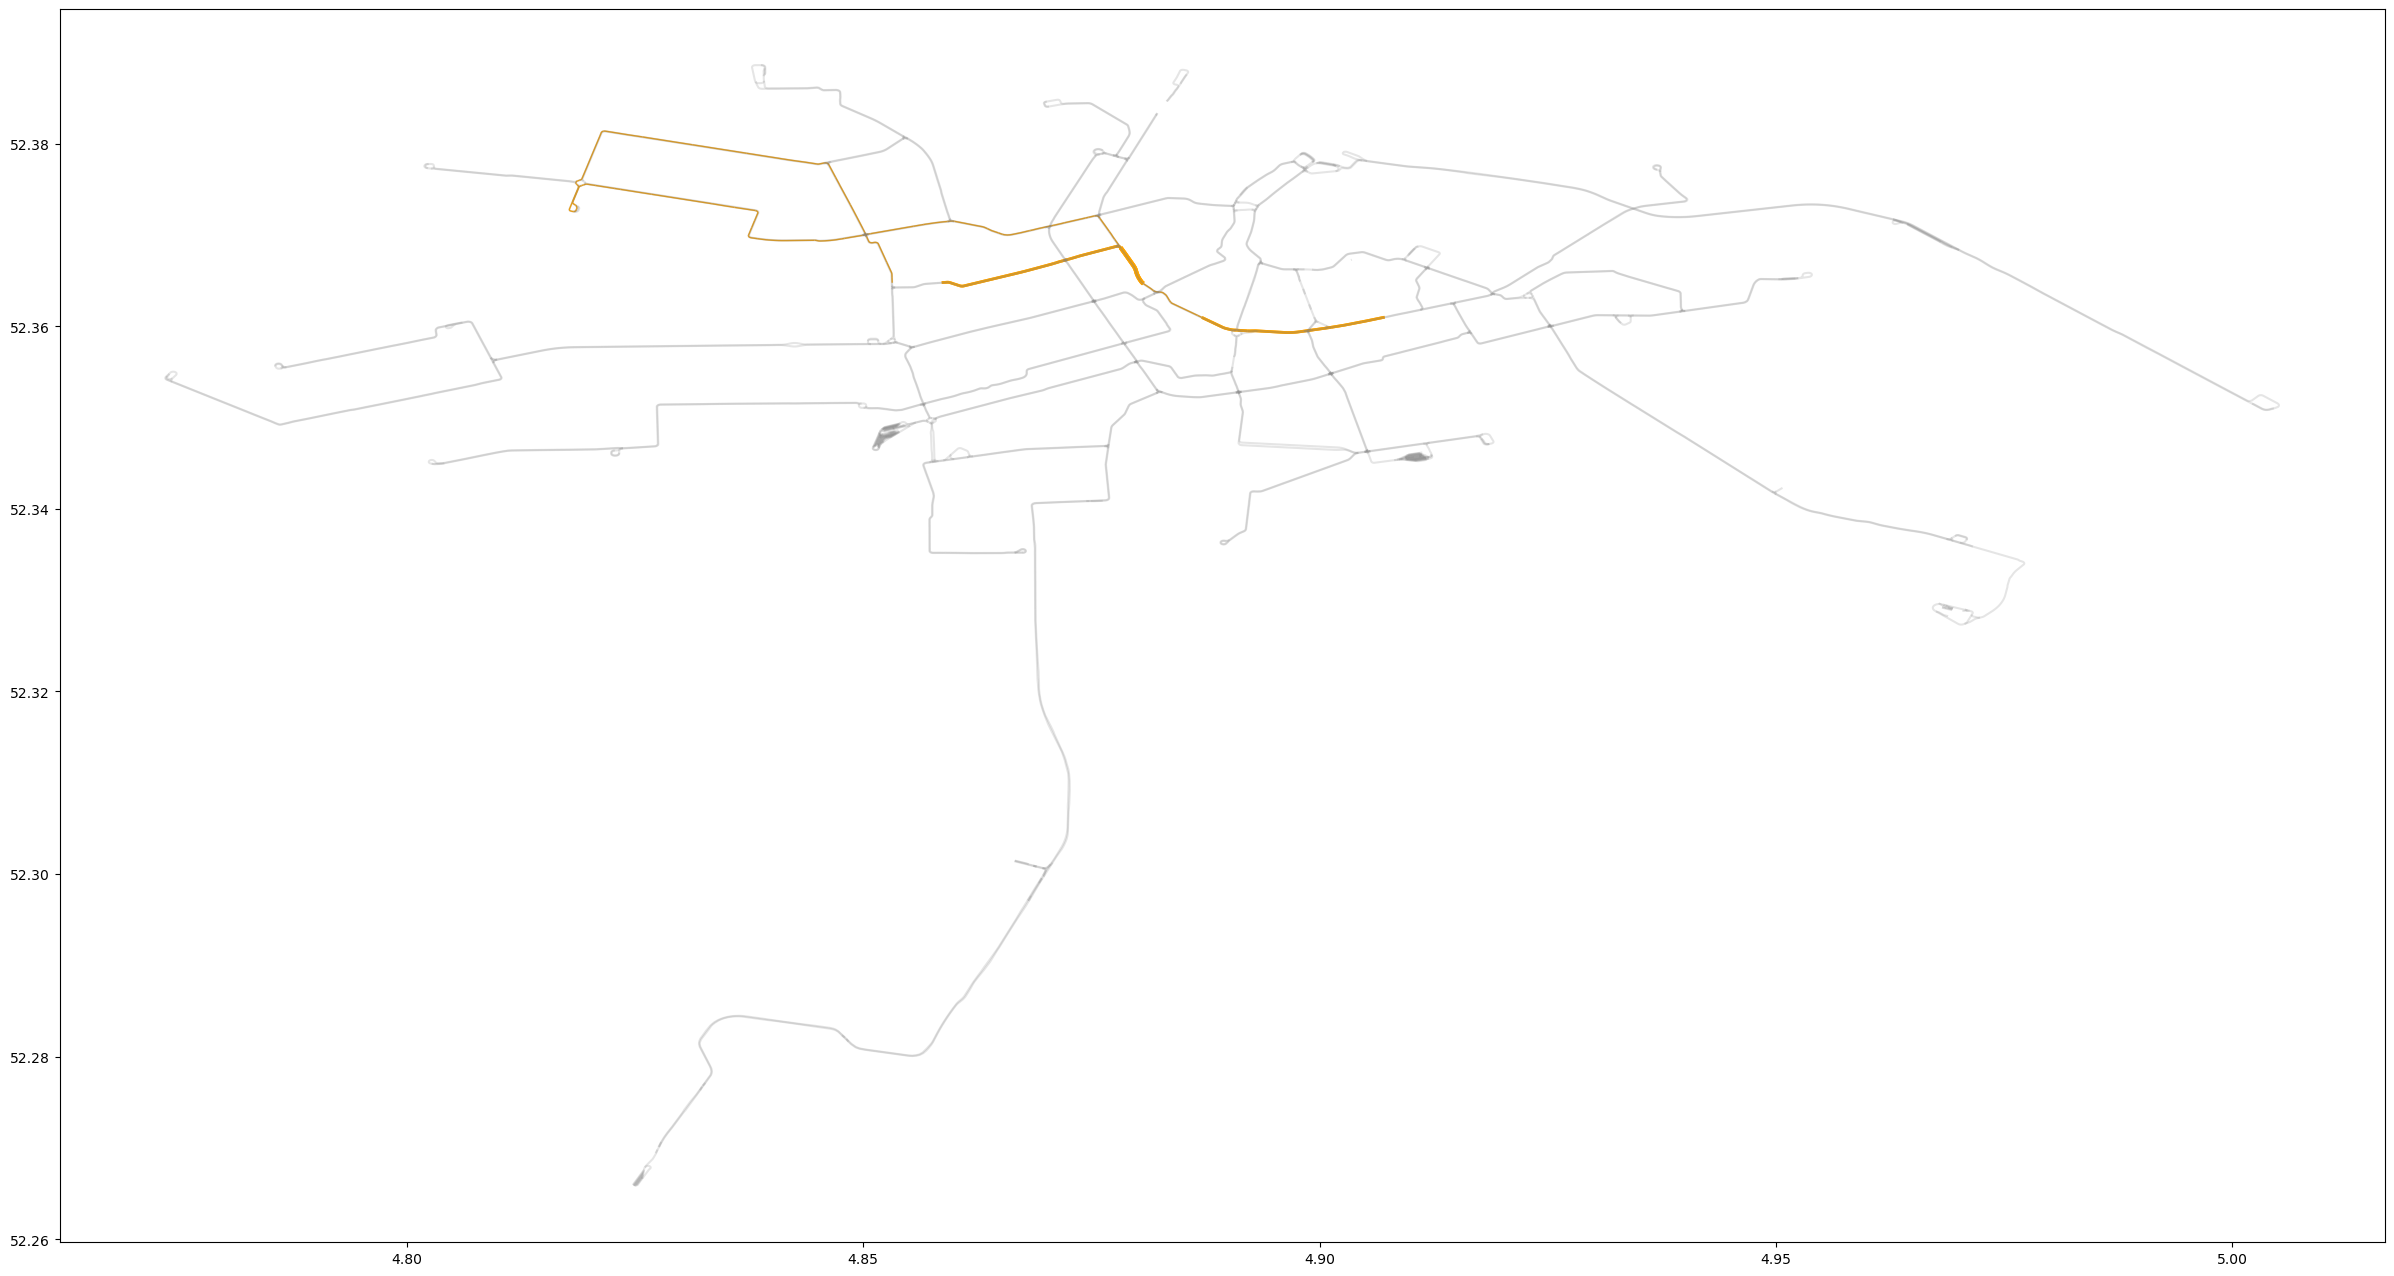

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(30, 20))

gpd.GeoDataFrame(city_tram_new_edges.copy()).plot(ax=ax, color='gray', alpha=0.2)

gpd.GeoDataFrame(shortest_path_edges_way.copy()).plot(ax=ax, zorder=1, linewidth=(shortest_path_edges_way.count_weight), color='orange')

## Test 2: Amsterdam 2 -- s-no transfer, e-no transfer, s_e are on one same route --- line7 exists some questions

### Change coordinates dictionary of s_e points into two Dataframes of s_e nodes

In [22]:
s_e_coordinates_t3 = {
    's_coordinates_x': 4.9384281402172885, 
    's_coordinates_y': 52.37679255333848, 
    'e_coordinates_x': 4.843049857621368, 
    'e_coordinates_y': 52.37836705094605
} 

In [23]:
start_node, end_node = s_e_node_df(s_e_coordinates_t3, city_tram_new_nodes)

In [24]:
start_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
402,POINT (4.93735 52.37682),2,414,Azartplein,4.937347,52.376818,"(4.9373469, 52.3768181)",Tram 7: Amsterdam Slotermeer => Amsterdam Azar...,tram,7,None


In [25]:
end_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
389,POINT (4.84493 52.37778),2,1656,Bos en Lommerplein,4.844933,52.377782,"(4.8449335, 52.3777823)",Tram 7: Amsterdam Azartplein => Amsterdam Slot...,tram,7,None


### Find the route which the s_e nodes are on----compare with new_edges instead of routes dataframe, should compare with routes dataframe

In [26]:
s_on_route_ref,e_on_route_ref = s_e_on_route_ref(start_node, end_node)

### Make judgement of s_e_on_route_ref

In [27]:
s_on_route_ref, e_on_route_ref = judge_on_route(s_on_route_ref, e_on_route_ref)

s_node and e_node are on one same route 

The next step is to find the same route----using function 's_e_same_routes'


### Find those same routes

In [28]:
s_e_same_routes_df = s_e_same_routes(s_on_route_ref,e_on_route_ref)
s_e_same_routes_df

s_node and e_node are on same route/routes:  ref
0   7



,ref
0,7


### Get all stations between s_e nodes and transfer nodes

In [29]:
all_stations_on_matched_routes_dfs = all_stations_on_matched_routes(s_e_same_routes_df,city_tram_routes,start_node,end_node,city_tram_order_route_dict)
all_stations_on_matched_routes_dfs

[    id                       name                      geometry     geo_x  \
 0   47                 Sloterpark  POINT (4.8186019 52.3728449)  4.818602   
 1   10   Burgemeester Roëllstraat  POINT (4.8187509 52.3750672)  4.818751   
 2   43              Plein '40-'45  POINT (4.8211591 52.3808373)  4.821159   
 3   45   Burgemeester Eliasstraat    POINT (4.8258104 52.38075)   4.82581   
 4   13    Burgemeester Fockstraat  POINT (4.8312794 52.3798913)  4.831279   
 5   15  Burgemeester de Vlugtlaan   POINT (4.8372054 52.378963)  4.837205   
 6   41         Bos en Lommerplein  POINT (4.8449335 52.3777823)  4.844933   
 7   55              Erasmusgracht  POINT (4.8469734 52.3763312)  4.846973   
 8   11        Jan van Galenstraat  POINT (4.8485891 52.3733319)  4.848589   
 9   57              Mercatorplein  POINT (4.8499792 52.3706818)  4.849979   
 10  56          W. Schoutenstraat   POINT (4.852596 52.3669952)  4.852596   
 11   1                 Postjesweg  POINT (4.8531786 52.3647729)

In [30]:
btw_stations_each_way_list = btw_stations_each_way_list(start_node,end_node,all_stations_on_matched_routes_dfs)
btw_stations_each_way_list

[    id                       name                      geometry     geo_x  \
 28   2                 Azartplein  POINT (4.9373223 52.3766133)  4.937322   
 27   5        C. van Eesterenlaan  POINT (4.9388456 52.3735665)  4.938846   
 26  25               Rietlandpark   POINT (4.9344045 52.372921)  4.934405   
 25   3    Eerste Leeghwaterstraat  POINT (4.9293975 52.3700769)  4.929398   
 24  23      Eerste Coehoornstraat  POINT (4.9265233 52.3683184)  4.926523   
 23  24              Hoogte Kadijk  POINT (4.9242477 52.3666491)  4.924248   
 22   6             Alexanderplein  POINT (4.9192366 52.3638735)  4.919237   
 21   7  Korte 's-Gravesandestraat  POINT (4.9135923 52.3623479)  4.913592   
 20   4               Weesperplein  POINT (4.9071213 52.3610021)  4.907121   
 19  22             Frederiksplein  POINT (4.8978483 52.3594109)  4.897848   
 18   8               Vijzelgracht  POINT (4.8921024 52.3595051)  4.892102   
 17   0                Rijksmuseum   POINT (4.887104 52.3609734)

### Get all nodes and id_pairs of nodes between s_e nodes

In [31]:
btw_all_id_pairs_list = btw_all_ids_pairs(btw_stations_each_way_list,city_tram_new_nodes)
btw_all_id_pairs_list

[    s_id  e_id
 0   1514  1599
 1   1599  1254
 2   1254  1580
 3   1580  1598
 4   1598  1801
 5   1801  1626
 6   1626  1710
 7   1710  1666
 8   1666  1700
 9   1700  1656
 10  1656  1833
 11  1833  1642
 12  1642  1889
 13  1889  1834
 14  1834  1534
 15  1534  1597
 16  1597  1809
 17  1809  1807
 18  1807  1575
 19  1575  1810
 20  1810  1596
 21  1596  1168]

### Calculate shortest path and plot

In [32]:
btw_all_id_pairs_list_unique = drop_df_in_list(btw_all_id_pairs_list)

All dataframes in the list are the same


In [33]:
btw_all_id_pairs_list_unique

[    s_id  e_id
 0   1514  1599
 1   1599  1254
 2   1254  1580
 3   1580  1598
 4   1598  1801
 5   1801  1626
 6   1626  1710
 7   1710  1666
 8   1666  1700
 9   1700  1656
 10  1656  1833
 11  1833  1642
 12  1642  1889
 13  1889  1834
 14  1834  1534
 15  1534  1597
 16  1597  1809
 17  1809  1807
 18  1807  1575
 19  1575  1810
 20  1810  1596
 21  1596  1168]

In [34]:
G = create_ground_graph(edges, nodes)

In [35]:
shortest_path_pairs_way = all_shortest_paths(G, btw_all_id_pairs_list_unique[0], edges)

In [36]:
shortest_path_pairs_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
919,323311655,"LINESTRING (4.8881128 52.3604955, 4.8880585 52...",tram,None,919,890,1514,86.878758,0.006206,86,"(890, 1514)","(1514, 890)"
926,323311660,"LINESTRING (4.8881809 52.3604632, 4.8881128 52...",tram,None,926,898,890,5.867505,0.000419,5,"(898, 890)","(890, 898)"
1514,611860982,"LINESTRING (4.890876 52.3595816, 4.8907257 52....",tram,None,1514,313,898,212.356412,0.015168,212,"(313, 898)","(898, 313)"
1520,611884641,"LINESTRING (4.8921024 52.3595051, 4.8920271 52...",tram,None,1520,1599,349,75.793422,0.005414,75,"(1599, 349)","(349, 1599)"
1846,770413340,"LINESTRING (4.8909954 52.359574, 4.890876 52.3...",tram,None,1846,349,313,8.176527,0.000584,8,"(349, 313)","(313, 349)"
...,...,...,...,...,...,...,...,...,...,...,...,...
1471,597894527,"LINESTRING (4.9334626 52.3725714, 4.9333945 52...",tram,None,1471,1019,1035,369.947405,0.026425,369,"(1019, 1035)","(1035, 1019)"
1147,329459455,"LINESTRING (4.9388456 52.3735665, 4.9387266 52...",tram,None,1147,1596,1810,312.085510,0.022292,312,"(1596, 1810)","(1810, 1596)"
951,323847232,"LINESTRING (4.938304 52.375572, 4.9385723 52.3...",tram,None,951,920,921,32.333932,0.002310,32,"(920, 921)","(921, 920)"
1146,329459455,"LINESTRING (4.9385723 52.3753322, 4.9393796 52...",tram,None,1146,921,1596,300.859501,0.021490,300,"(921, 1596)","(1596, 921)"


In [37]:
duplicate_row_count_way, shortest_path_edges_way, edges_way = edges_with_count_weight(shortest_path_pairs_way, edges)

In [38]:
shortest_path_edges_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight
0,323311655,"LINESTRING (4.8881128 52.3604955, 4.8880585 52...",tram,None,919,890,1514,86.878758,0.006206,86,"(890, 1514)","(1514, 890)",3.0
1,323311660,"LINESTRING (4.8881809 52.3604632, 4.8881128 52...",tram,None,926,898,890,5.867505,0.000419,5,"(898, 890)","(890, 898)",3.0
2,611860982,"LINESTRING (4.890876 52.3595816, 4.8907257 52....",tram,None,1514,313,898,212.356412,0.015168,212,"(313, 898)","(898, 313)",3.0
3,611884641,"LINESTRING (4.8921024 52.3595051, 4.8920271 52...",tram,None,1520,1599,349,75.793422,0.005414,75,"(1599, 349)","(349, 1599)",3.0
4,770413340,"LINESTRING (4.8909954 52.359574, 4.890876 52.3...",tram,None,1846,349,313,8.176527,0.000584,8,"(349, 313)","(313, 349)",3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,597894527,"LINESTRING (4.9334626 52.3725714, 4.9333945 52...",tram,None,1471,1019,1035,369.947405,0.026425,369,"(1019, 1035)","(1035, 1019)",1.0
206,329459455,"LINESTRING (4.9388456 52.3735665, 4.9387266 52...",tram,None,1147,1596,1810,312.085510,0.022292,312,"(1596, 1810)","(1810, 1596)",1.0
207,323847232,"LINESTRING (4.938304 52.375572, 4.9385723 52.3...",tram,None,951,920,921,32.333932,0.002310,32,"(920, 921)","(921, 920)",1.0
208,329459455,"LINESTRING (4.9385723 52.3753322, 4.9393796 52...",tram,None,1146,921,1596,300.859501,0.021490,300,"(921, 1596)","(1596, 921)",1.0


In [39]:
shortest_path_edges_way.time.sum()

1.5132600880200742

<Axes: >

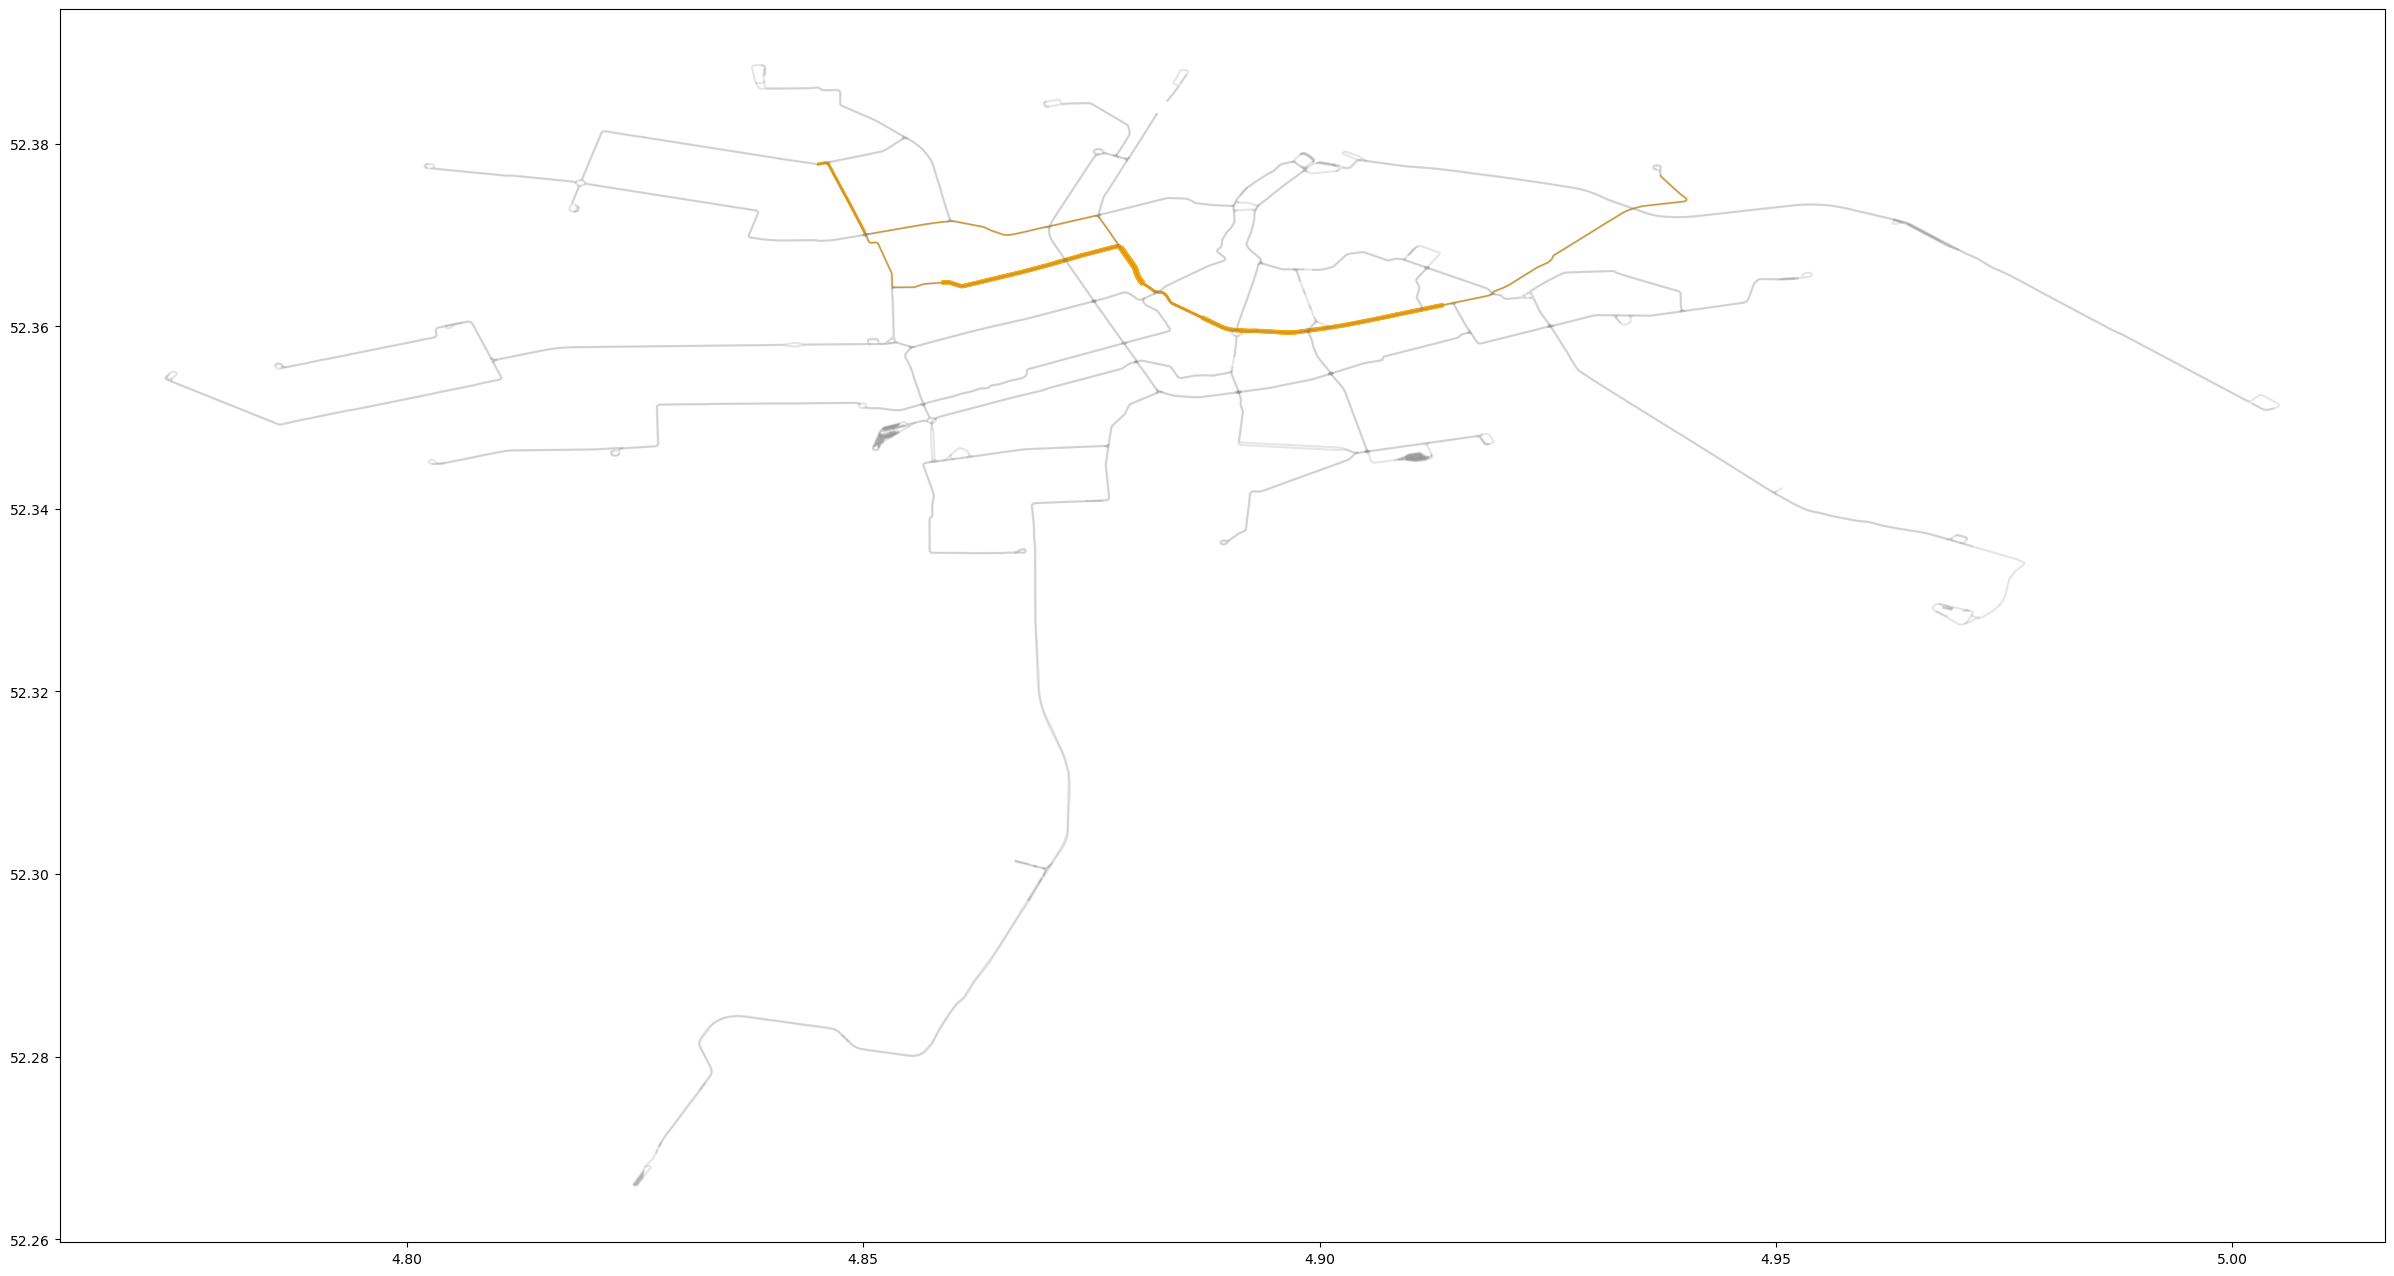

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(30, 20))

gpd.GeoDataFrame(city_tram_new_edges.copy()).plot(ax=ax, color='gray', alpha=0.2)

gpd.GeoDataFrame(shortest_path_edges_way.copy()).plot(ax=ax, zorder=1, linewidth=(shortest_path_edges_way.count_weight), color='orange')

## Test 1: Amsterdam 1 -- s-no transfer, e-transfer, s_e has one same route

### Change coordinates dictionary of s_e points into two Dataframes of s_e nodes

In [22]:
s_e_coordinates_t3 = {
    's_coordinates_x': 4.816941988672407, 
    's_coordinates_y': 52.36594888564495, 
    'e_coordinates_x': 4.850845096317399, 
    'e_coordinates_y': 52.3751369796771
} 

In [23]:
start_node, end_node = s_e_node_df(s_e_coordinates_t3, city_tram_new_nodes)

In [24]:
start_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
383,POINT (4.81860 52.37284),2,222,Sloterpark,4.818602,52.372845,"(4.8186019, 52.3728449)",Tram 7: Amsterdam Azartplein => Amsterdam Slot...,tram,7,None


In [25]:
end_node

,geometry,degree,id,name,geo_x,geo_y,coordinate_value,route_name_list,route,ref,transfer
391,POINT (4.84859 52.37333),2,1642,Jan van Galenstraat,4.848589,52.373332,"(4.8485891, 52.3733319)",Tram 7: Amsterdam Azartplein => Amsterdam Slot...,tram,"13, 19, 7","13, 19, 7"


### Find the route which the s_e nodes are on----compare with new_edges instead of routes dataframe, should compare with routes dataframe

In [26]:
s_on_route_ref,e_on_route_ref = s_e_on_route_ref(start_node, end_node)

### Make judgement of s_e_on_route_ref

In [27]:
s_on_route_ref, e_on_route_ref = judge_on_route(s_on_route_ref, e_on_route_ref)

One of e_on_route is the same as s_on_route 

The next step is to find the same route----using function 's_e_same_routes'


### Find those same routes

In [28]:
s_e_same_routes_df = s_e_same_routes(s_on_route_ref,e_on_route_ref)
s_e_same_routes_df

s_node and e_node are on same route/routes:  ref
0   7



,ref
0,7


### Get all stations between s_e nodes and transfer nodes

In [29]:
all_stations_on_matched_routes_dfs = all_stations_on_matched_routes(s_e_same_routes_df,city_tram_routes,start_node,end_node,city_tram_order_route_dict)
all_stations_on_matched_routes_dfs

[    id                       name                      geometry     geo_x  \
 0   47                 Sloterpark  POINT (4.8186019 52.3728449)  4.818602   
 1   10   Burgemeester Roëllstraat  POINT (4.8187509 52.3750672)  4.818751   
 2   43              Plein '40-'45  POINT (4.8211591 52.3808373)  4.821159   
 3   45   Burgemeester Eliasstraat    POINT (4.8258104 52.38075)   4.82581   
 4   13    Burgemeester Fockstraat  POINT (4.8312794 52.3798913)  4.831279   
 5   15  Burgemeester de Vlugtlaan   POINT (4.8372054 52.378963)  4.837205   
 6   41         Bos en Lommerplein  POINT (4.8449335 52.3777823)  4.844933   
 7   55              Erasmusgracht  POINT (4.8469734 52.3763312)  4.846973   
 8   11        Jan van Galenstraat  POINT (4.8485891 52.3733319)  4.848589   
 9   57              Mercatorplein  POINT (4.8499792 52.3706818)  4.849979   
 10  56          W. Schoutenstraat   POINT (4.852596 52.3669952)  4.852596   
 11   1                 Postjesweg  POINT (4.8531786 52.3647729)

In [30]:
btw_stations_each_way_list = btw_stations_each_way_list(start_node,end_node,all_stations_on_matched_routes_dfs)
btw_stations_each_way_list

[   id                       name                      geometry     geo_x  \
 0  47                 Sloterpark  POINT (4.8186019 52.3728449)  4.818602   
 1  10   Burgemeester Roëllstraat  POINT (4.8187509 52.3750672)  4.818751   
 2  43              Plein '40-'45  POINT (4.8211591 52.3808373)  4.821159   
 3  45   Burgemeester Eliasstraat    POINT (4.8258104 52.38075)   4.82581   
 4  13    Burgemeester Fockstraat  POINT (4.8312794 52.3798913)  4.831279   
 5  15  Burgemeester de Vlugtlaan   POINT (4.8372054 52.378963)  4.837205   
 6  41         Bos en Lommerplein  POINT (4.8449335 52.3777823)  4.844933   
 7  55              Erasmusgracht  POINT (4.8469734 52.3763312)  4.846973   
 8  11        Jan van Galenstraat  POINT (4.8485891 52.3733319)  4.848589   
 
        geo_y                                    route_name_list ref route  \
 0  52.372845  Tram 7: Amsterdam Azartplein => Amsterdam Slot...   7  tram   
 1  52.375067  Tram 7: Amsterdam Azartplein => Amsterdam Slot...   7  tr

### Get all nodes and id_pairs of nodes between s_e nodes

In [31]:
btw_all_id_pairs_list = btw_all_ids_pairs(btw_stations_each_way_list,city_tram_new_nodes)
btw_all_id_pairs_list

[   s_id  e_id
 0   222  1641
 1  1641  1660
 2  1660  1665
 3  1665  1658
 4  1658  1661
 5  1661  1656
 6  1656  1833
 7  1833  1642]

### Calculate shortest path and plot

In [32]:
btw_all_id_pairs_list_unique = drop_df_in_list(btw_all_id_pairs_list)

All dataframes in the list are the same


In [33]:
btw_all_id_pairs_list_unique

[   s_id  e_id
 0   222  1641
 1  1641  1660
 2  1660  1665
 3  1665  1658
 4  1658  1661
 5  1661  1656
 6  1656  1833
 7  1833  1642]

In [34]:
G = create_ground_graph(edges, nodes)

In [35]:
shortest_path_pairs_way = all_shortest_paths(G, btw_all_id_pairs_list_unique[0], edges)

In [36]:
shortest_path_pairs_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
496,144719687,"LINESTRING (4.8182425 52.3725701, 4.8183616 52...",tram,None,496,218,222,43.890304,0.003135,43,"(218, 222)","(222, 218)"
1098,326923964,"LINESTRING (4.8187509 52.3750672, 4.8183147 52...",tram,None,1098,1641,218,303.034667,0.021645,303,"(1641, 218)","(218, 1641)"
260,27124074,"LINESTRING (4.818684 52.3759149, 4.8186147 52....",tram,None,260,307,308,36.087729,0.002578,36,"(307, 308)","(308, 307)"
261,27124075,"LINESTRING (4.8185658 52.3756232, 4.8186212 52...",tram,None,261,308,309,16.673519,0.001191,16,"(308, 309)","(309, 308)"
264,27124078,"LINESTRING (4.818899 52.375991, 4.8187964 52.3...",tram,None,264,306,307,16.912756,0.001208,16,"(306, 307)","(307, 306)"
1041,324264744,"LINESTRING (4.8211591 52.3808373, 4.8206528 52...",tram,None,1041,1660,306,565.292290,0.040378,565,"(1660, 306)","(306, 1660)"
1097,326923964,"LINESTRING (4.8186918 52.3754947, 4.8187184 52...",tram,None,1097,309,1641,49.918247,0.003566,49,"(309, 1641)","(1641, 309)"
905,323258166,"LINESTRING (4.8258104 52.38075, 4.8243313 52.3...",tram,None,905,1665,886,300.529728,0.021466,300,"(1665, 886)","(886, 1665)"
1040,324264744,"LINESTRING (4.8215284 52.3813703, 4.8214937 52...",tram,None,1040,886,1660,66.777683,0.004770,66,"(886, 1660)","(1660, 886)"
904,323258166,"LINESTRING (4.8312794 52.3798913, 4.8271043 52...",tram,None,904,1658,1665,384.391344,0.027457,384,"(1658, 1665)","(1665, 1658)"


In [37]:
duplicate_row_count_way, shortest_path_edges_way, edges_way = edges_with_count_weight(shortest_path_pairs_way, edges)

In [38]:
shortest_path_edges_way

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,count_weight
0,144719687,"LINESTRING (4.8182425 52.3725701, 4.8183616 52...",tram,None,496,218,222,43.890304,0.003135,43,"(218, 222)","(222, 218)",1.0
1,326923964,"LINESTRING (4.8187509 52.3750672, 4.8183147 52...",tram,None,1098,1641,218,303.034667,0.021645,303,"(1641, 218)","(218, 1641)",1.0
2,27124074,"LINESTRING (4.818684 52.3759149, 4.8186147 52....",tram,None,260,307,308,36.087729,0.002578,36,"(307, 308)","(308, 307)",1.0
3,27124075,"LINESTRING (4.8185658 52.3756232, 4.8186212 52...",tram,None,261,308,309,16.673519,0.001191,16,"(308, 309)","(309, 308)",1.0
4,27124078,"LINESTRING (4.818899 52.375991, 4.8187964 52.3...",tram,None,264,306,307,16.912756,0.001208,16,"(306, 307)","(307, 306)",1.0
5,324264744,"LINESTRING (4.8211591 52.3808373, 4.8206528 52...",tram,None,1041,1660,306,565.292290,0.040378,565,"(1660, 306)","(306, 1660)",1.0
6,326923964,"LINESTRING (4.8186918 52.3754947, 4.8187184 52...",tram,None,1097,309,1641,49.918247,0.003566,49,"(309, 1641)","(1641, 309)",1.0
7,323258166,"LINESTRING (4.8258104 52.38075, 4.8243313 52.3...",tram,None,905,1665,886,300.529728,0.021466,300,"(1665, 886)","(886, 1665)",1.0
8,324264744,"LINESTRING (4.8215284 52.3813703, 4.8214937 52...",tram,None,1040,886,1660,66.777683,0.004770,66,"(886, 1660)","(1660, 886)",1.0
9,323258166,"LINESTRING (4.8312794 52.3798913, 4.8271043 52...",tram,None,904,1658,1665,384.391344,0.027457,384,"(1658, 1665)","(1665, 1658)",1.0


In [39]:
shortest_path_edges_way.time.sum()

0.23977664379048358

<Axes: >

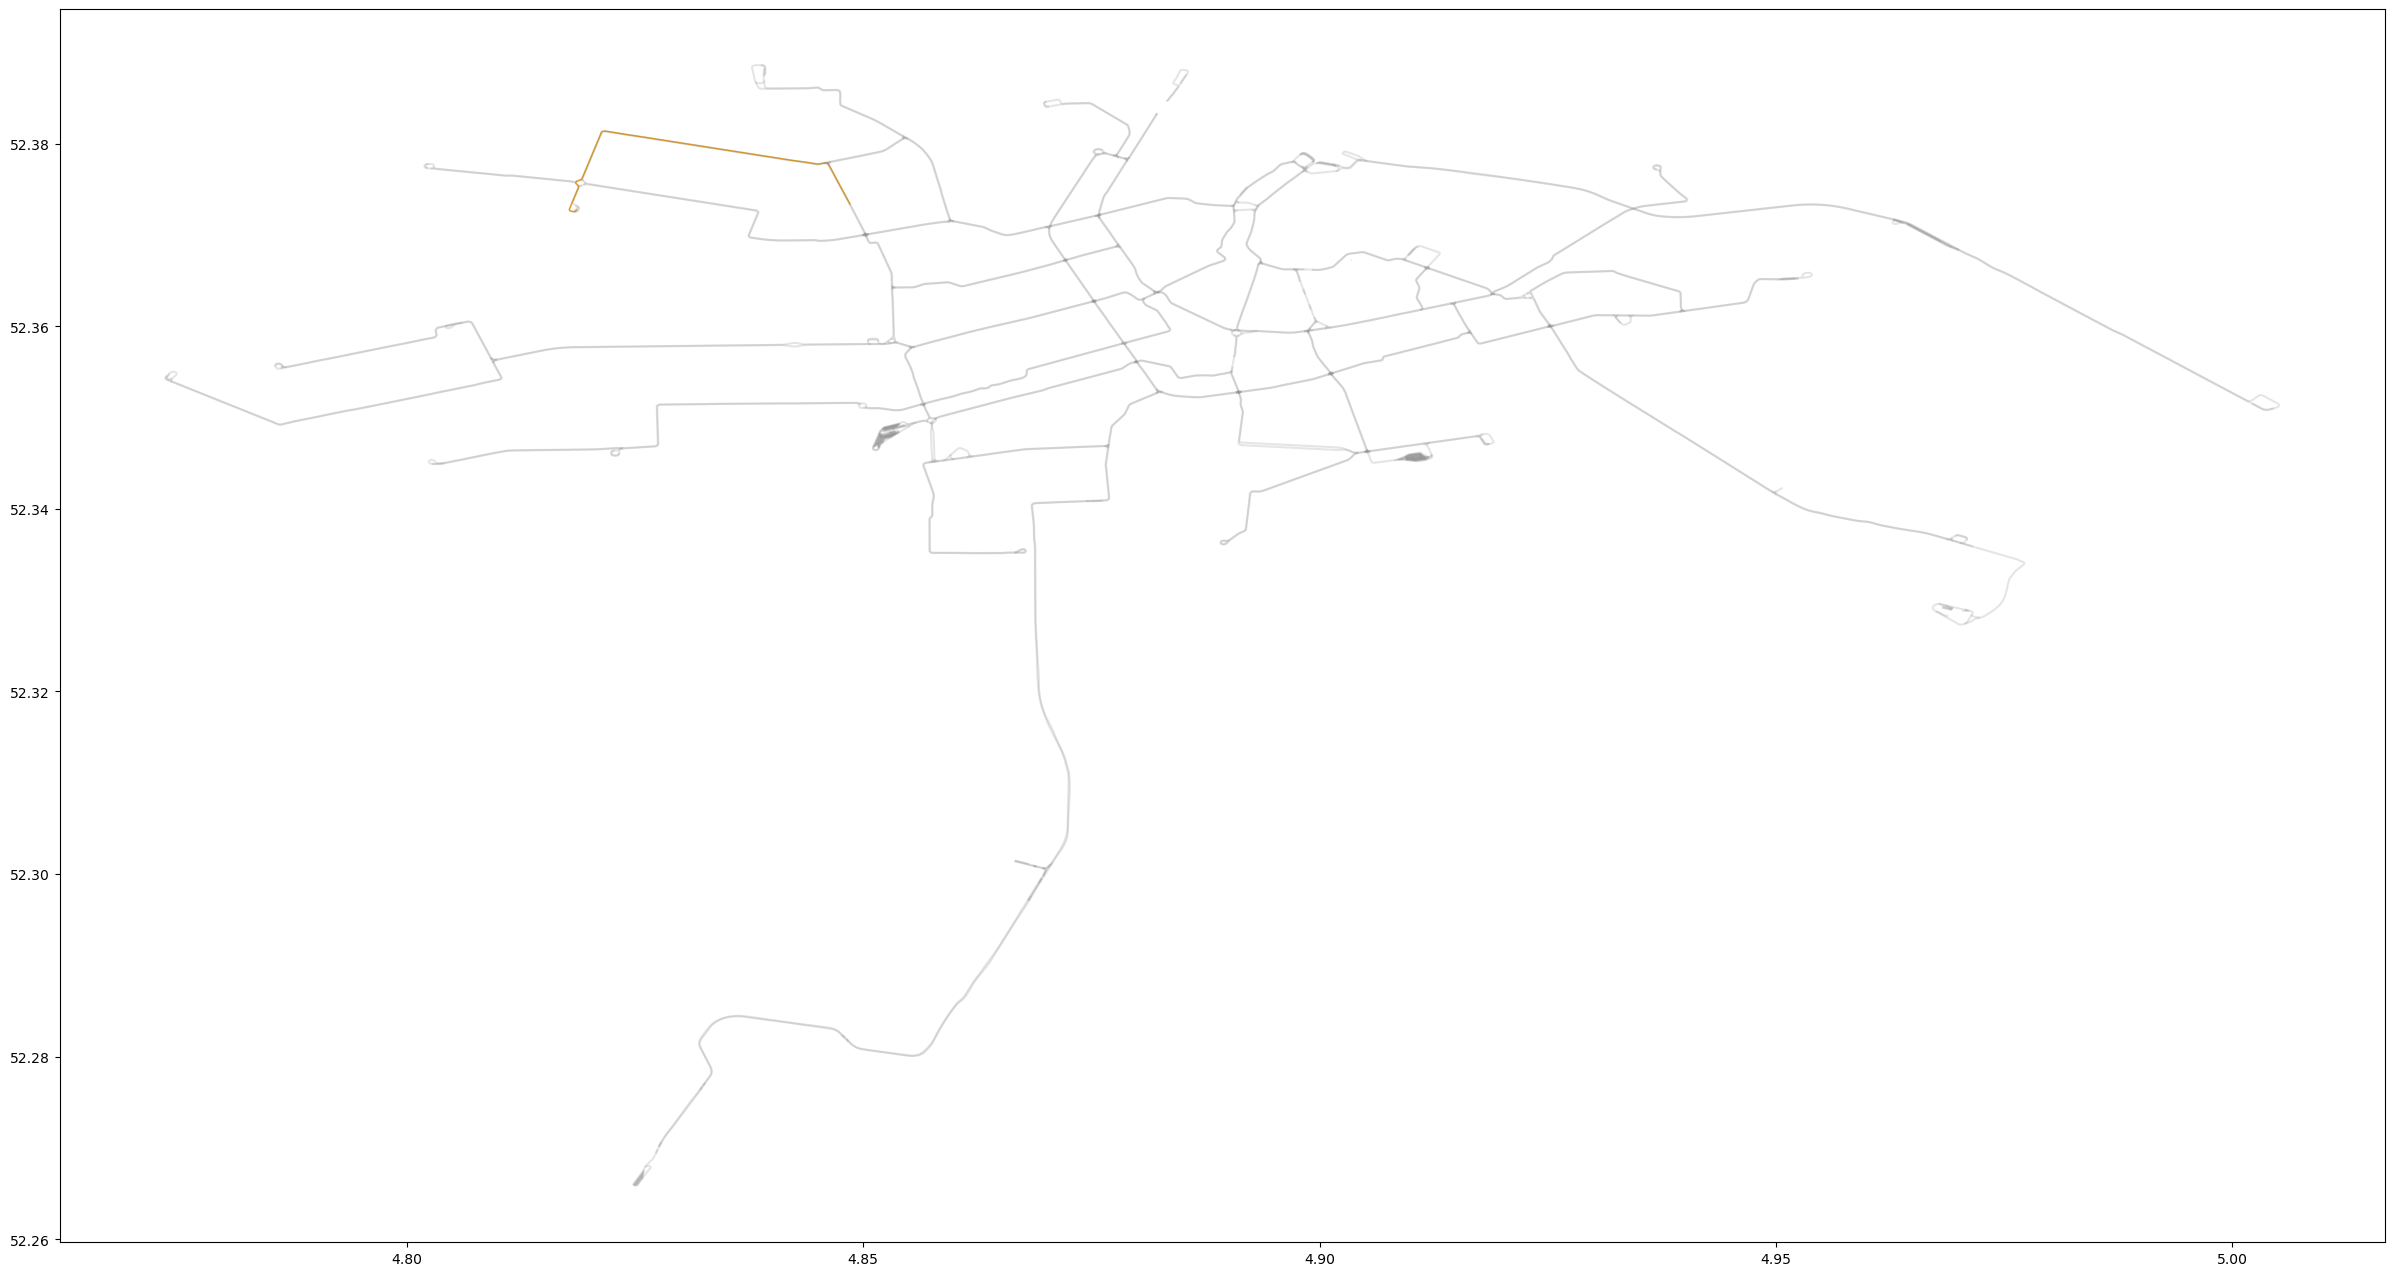

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(30, 20))

gpd.GeoDataFrame(city_tram_new_edges.copy()).plot(ax=ax, color='gray', alpha=0.2)

gpd.GeoDataFrame(shortest_path_edges_way.copy()).plot(ax=ax, zorder=1, linewidth=(shortest_path_edges_way.count_weight), color='orange')